In [19]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import random
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import pylab as p

%matplotlib inline

train = pd.read_csv("../input/train.csv").drop('id',axis=1)
# train['loss'] = np.log(train['loss']+200)

In [20]:
train['cat109'].head()

0    BU
1    BI
2    AB
3    BI
4     H
Name: cat109, dtype: object

In [21]:
def LetterRep(x,LevelList):
    if x in LevelList:
        x = '0'+x
    return x

LevelList = {'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'}
train_2 = train.applymap(lambda x: LetterRep(x,LevelList))

In [22]:
train_2['cat109'].head()

0    BU
1    BI
2    AB
3    BI
4    0H
Name: cat109, dtype: object

In [23]:
features = train.columns
cats = [feature for feature in features if feature.startswith('cat')]
for feat in cats:
    train[feat] = pd.factorize(train[feat], sort=True)[0]

In [24]:
train.head()

cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10   ...     \
0     0     1     0     1     0     0     0     0     1      0   ...      
1     0     1     0     0     0     0     0     0     1      1   ...      
2     0     1     0     0     1     0     0     0     1      1   ...      
3     1     1     0     1     0     0     0     0     1      0   ...      
4     0     1     0     1     0     0     0     0     1      1   ...      

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14     loss  
0  0.822493  0.714843  2213.18  
1  0.611431  0.304496  1283.60  
2  0.195709  0.774425  3005.09  
3  0.605077  0.602642   939.85  
4  0.246011  0.432606  2763.85  

[5 rows x 131 columns]

In [25]:
features = train_2.columns
cats = [feature for feature in features if feature.startswith('cat')]
for feat in cats:
    train_2[feat] = pd.factorize(train_2[feat], sort=True)[0]

In [26]:
train_2.head()

cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10   ...     \
0     0     1     0     1     0     0     0     0     1      0   ...      
1     0     1     0     0     0     0     0     0     1      1   ...      
2     0     1     0     0     1     0     0     0     1      1   ...      
3     1     1     0     1     0     0     0     0     1      0   ...      
4     0     1     0     1     0     0     0     0     1      1   ...      

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14     loss  
0  0.822493  0.714843  2213.18  
1  0.611431  0.304496  1283.60  
2  0.195709  0.774425  3005.09  
3  0.605077  0.602642   939.85  
4  0.246011  0.432606  2763.85  

[5 rows x 131 columns]

# Scatterplots of Features vs. Loss

In [27]:
features = train.columns[0:130]
features

Index([u'cat1', u'cat2', u'cat3', u'cat4', u'cat5', u'cat6', u'cat7', u'cat8',
       u'cat9', u'cat10',
       ...
       u'cont5', u'cont6', u'cont7', u'cont8', u'cont9', u'cont10', u'cont11',
       u'cont12', u'cont13', u'cont14'],
      dtype='object', length=130)

In [28]:
# for col in features:
#     plt.figure()
#     plt.subplot(1,1,1)
#     plt.scatter(train['loss'],train[col])
#     plt.xlabel(col)
#     plt.ylim([train[col].min()-0.05, train[col].max()+0.05])
#     plt.xlim([train['loss'].min(), train['loss'].max()])

# Compare Small and Large Observations

In [29]:
# features sensitive to 20000 loss
train_s = train[train['loss']<20000]
train_l = train[train['loss']>=20000]

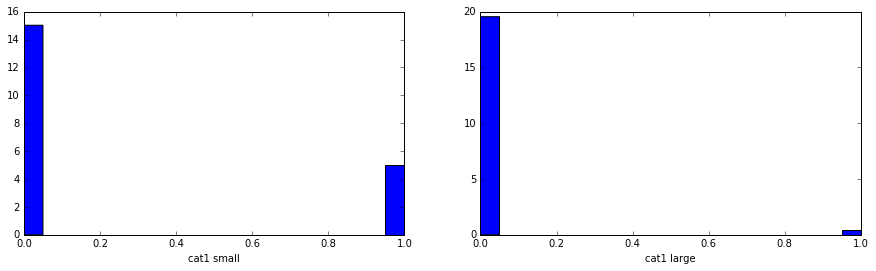

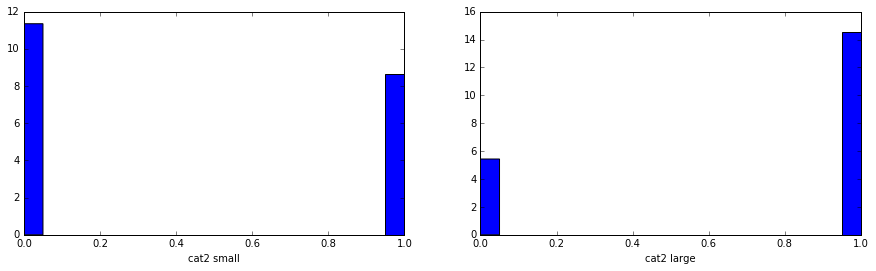

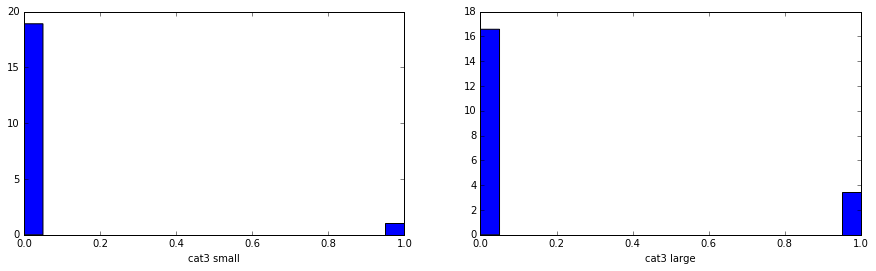

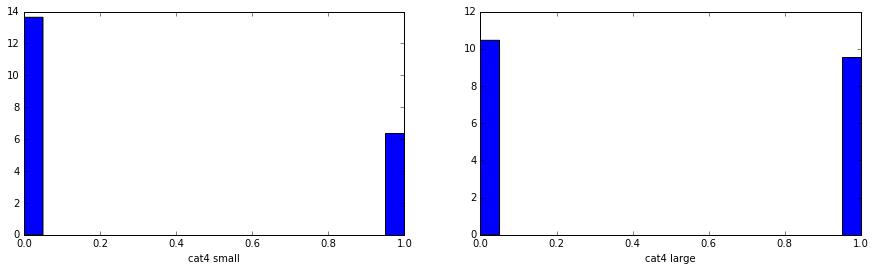

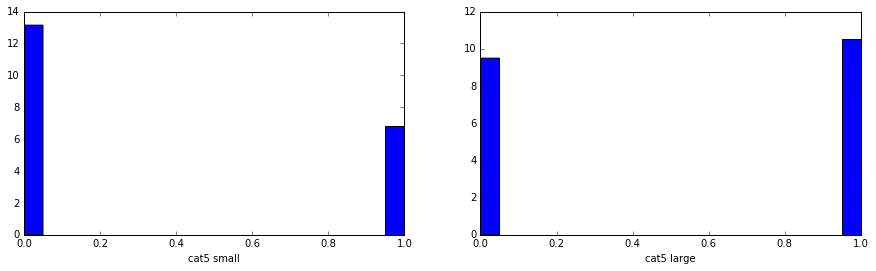

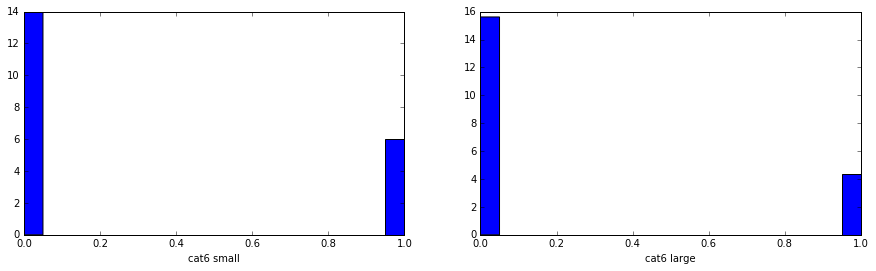

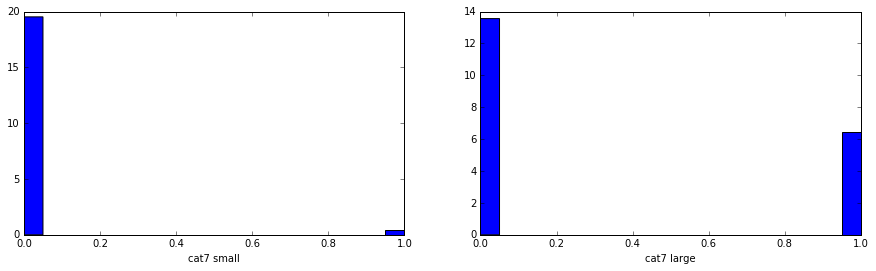

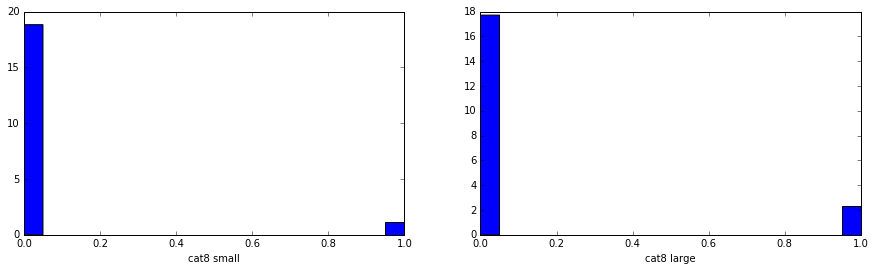

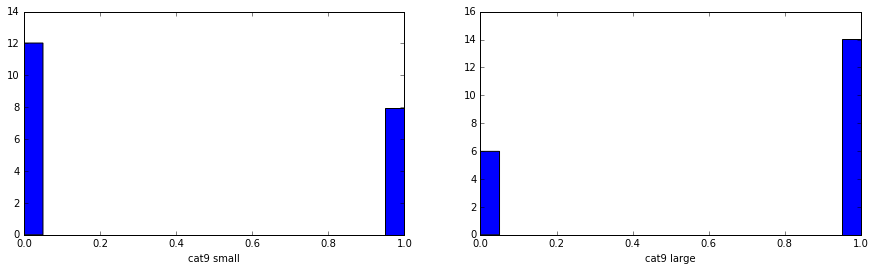

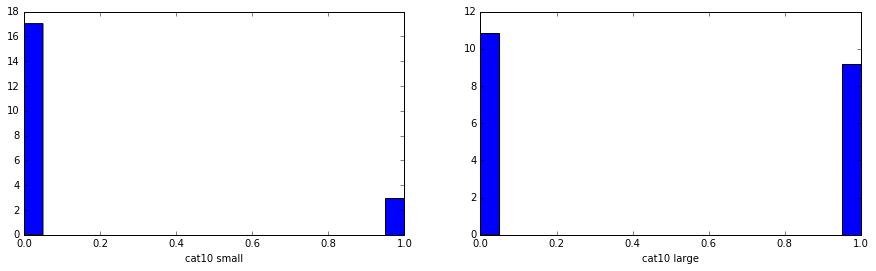

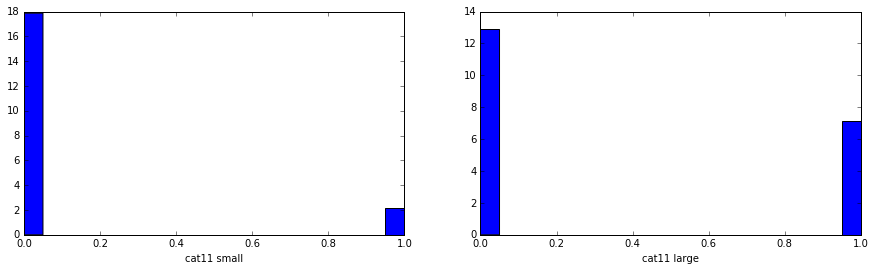

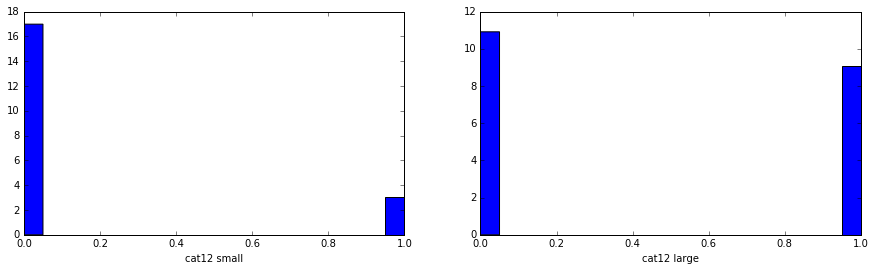

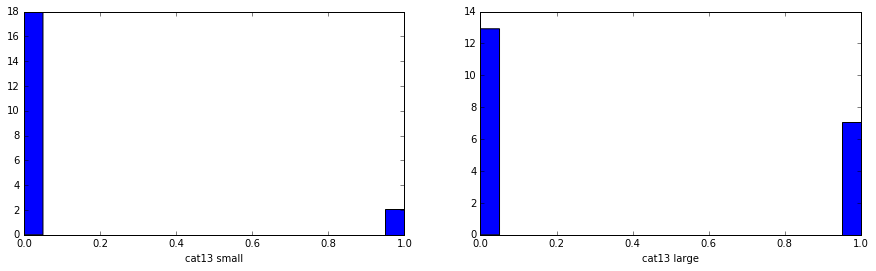

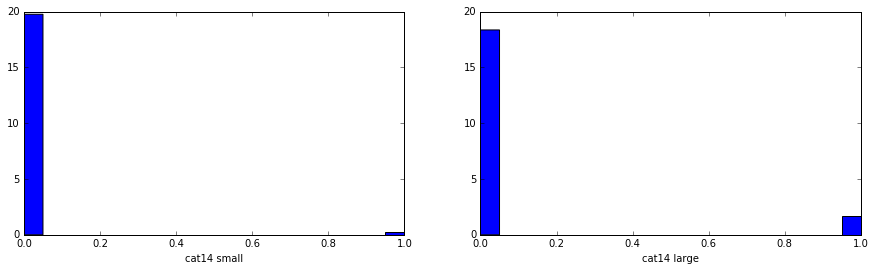

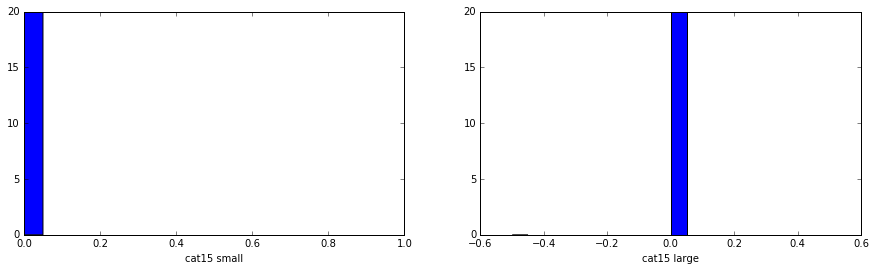

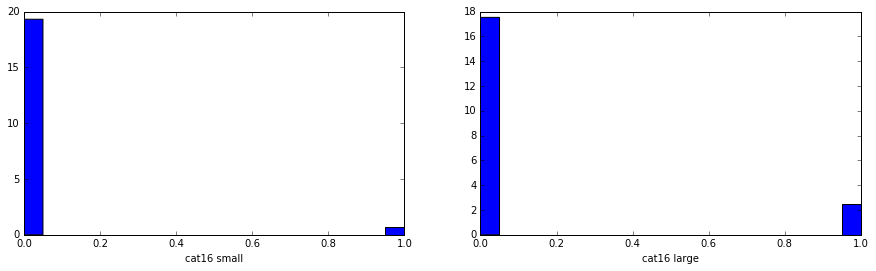

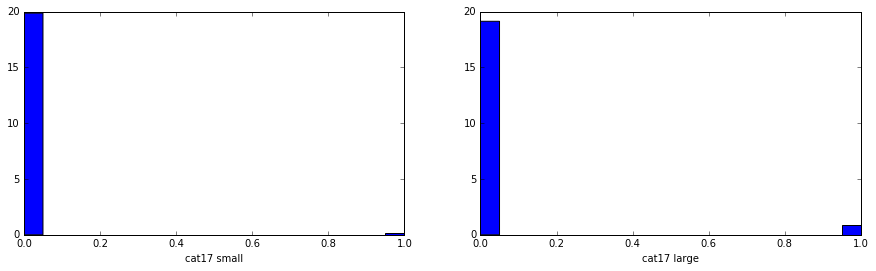

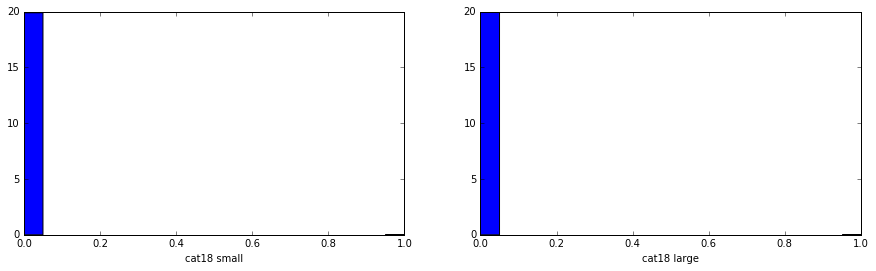

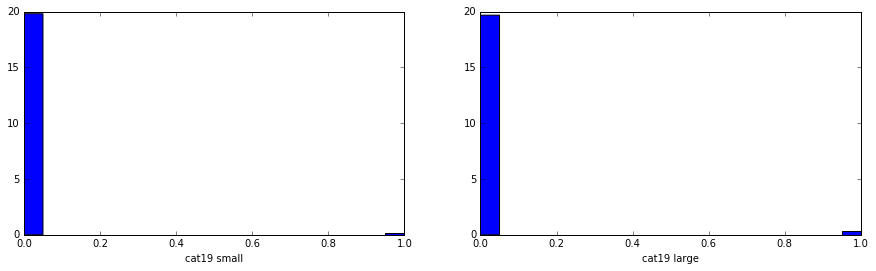

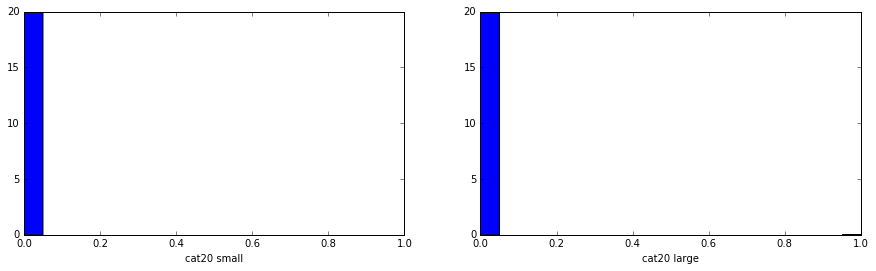

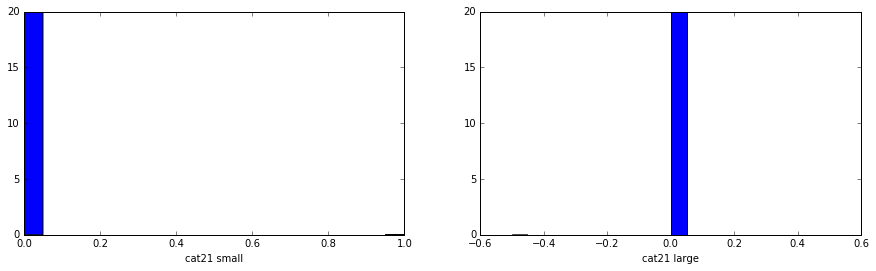

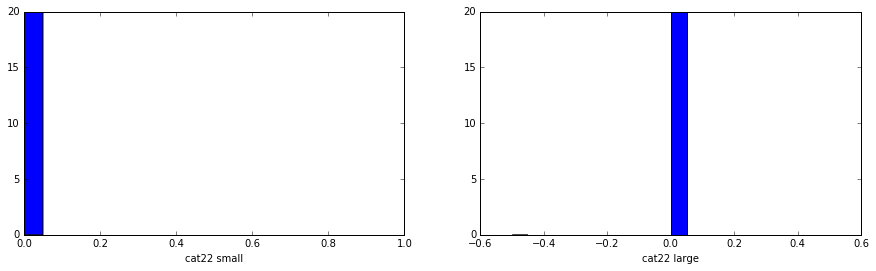

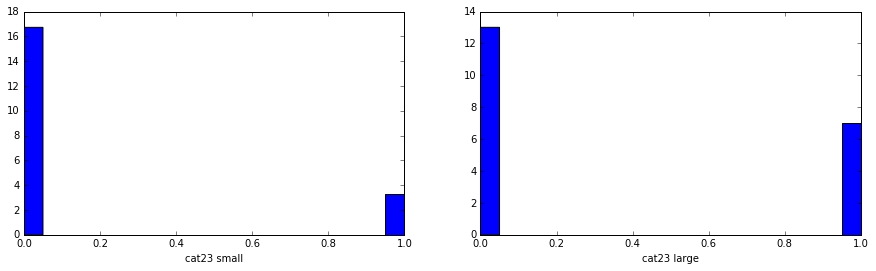

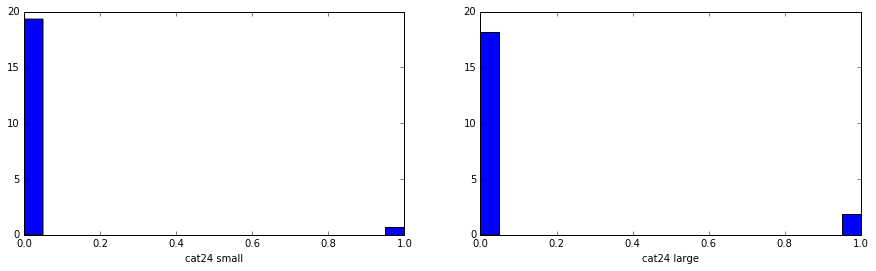

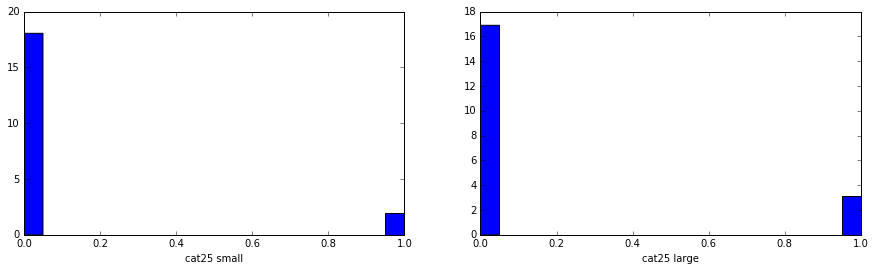

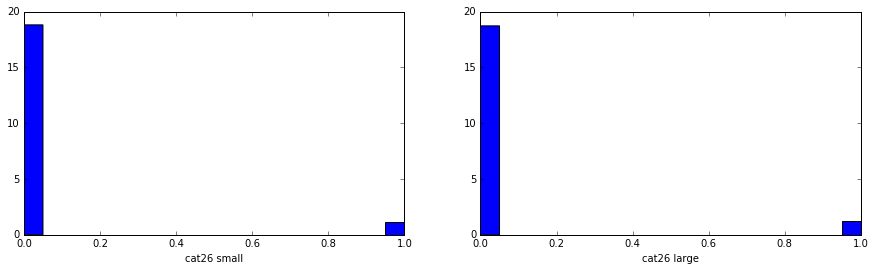

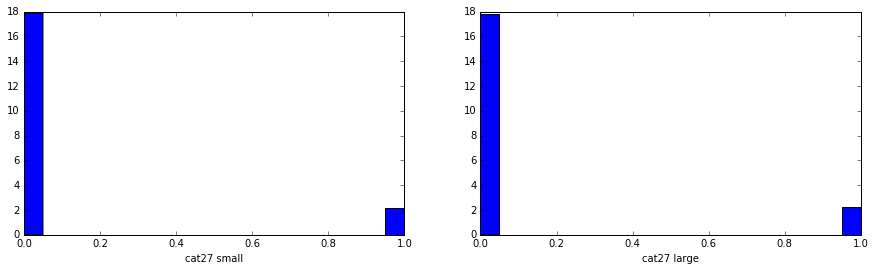

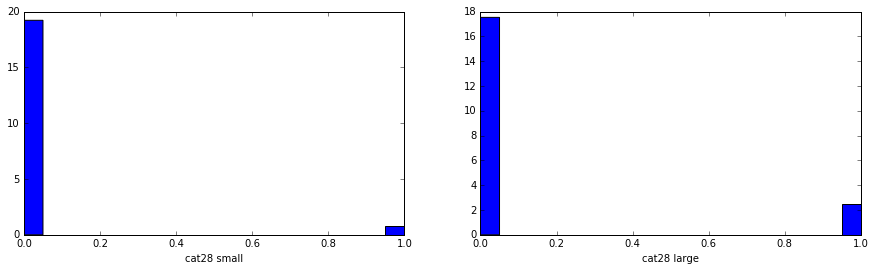

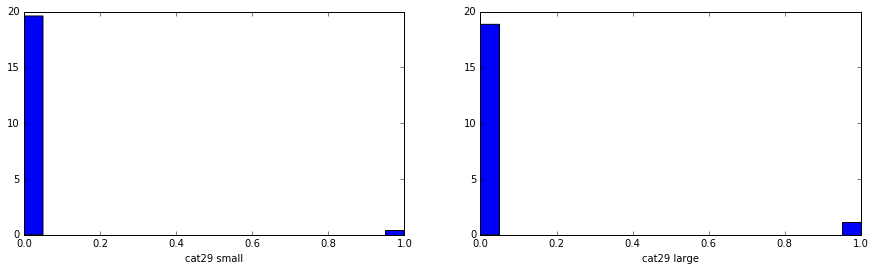

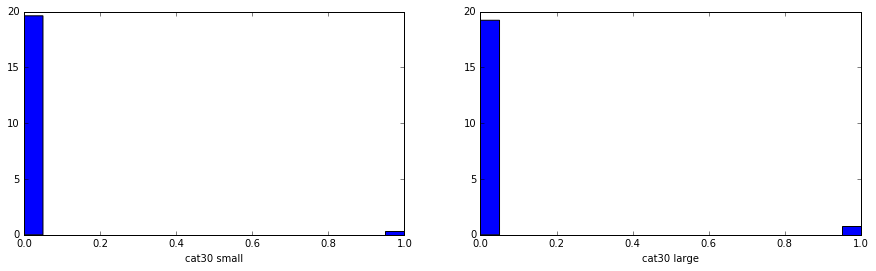

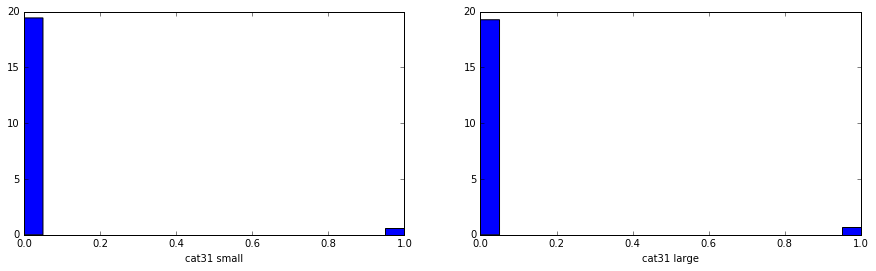

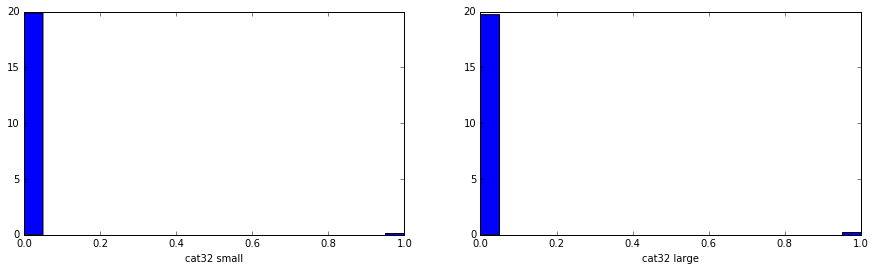

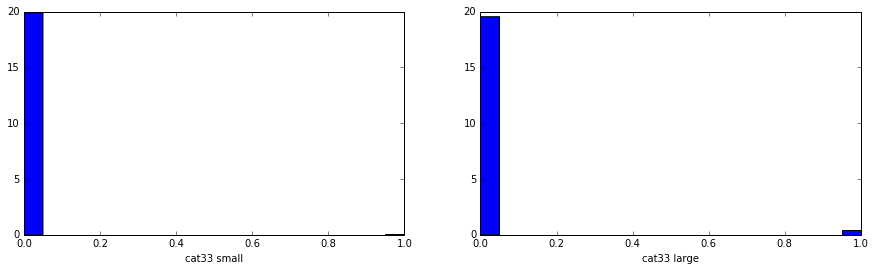

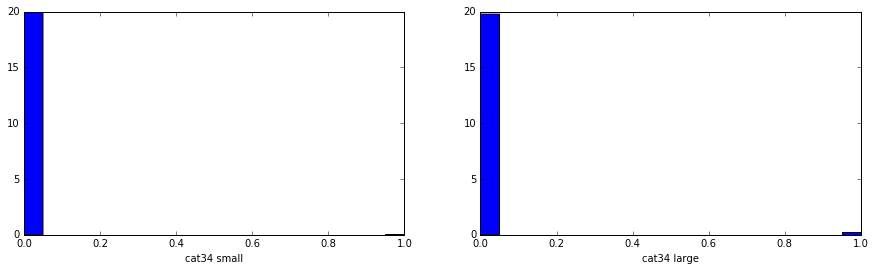

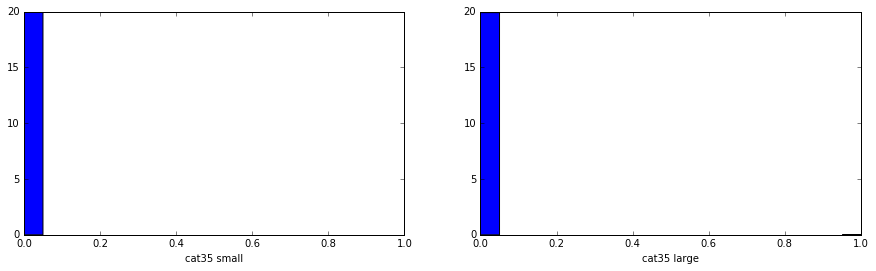

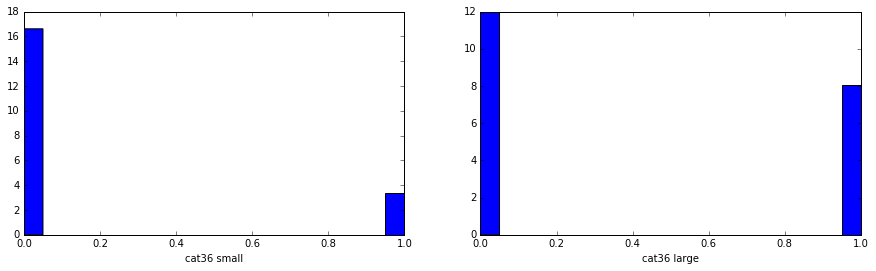

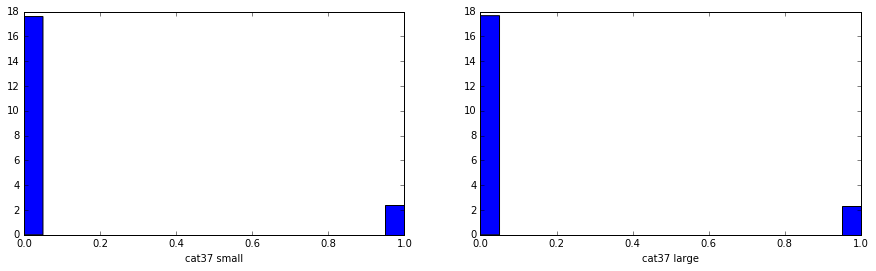

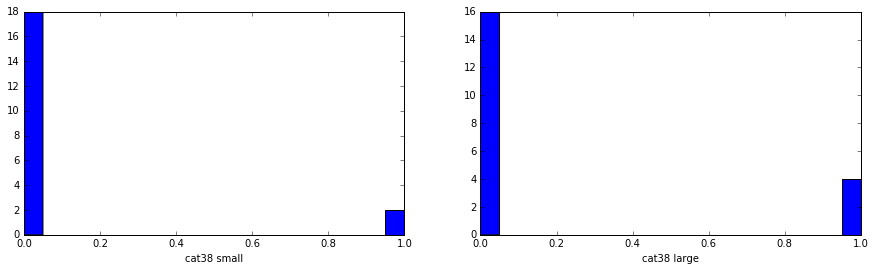

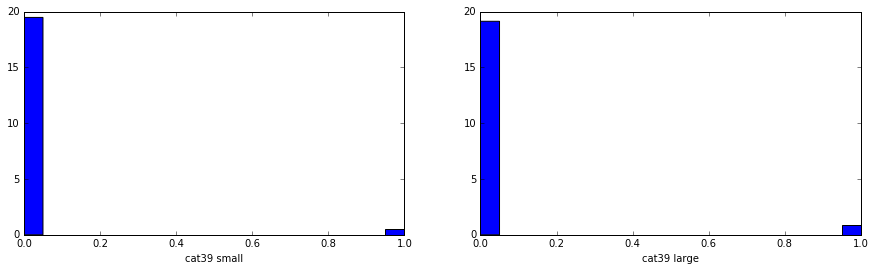

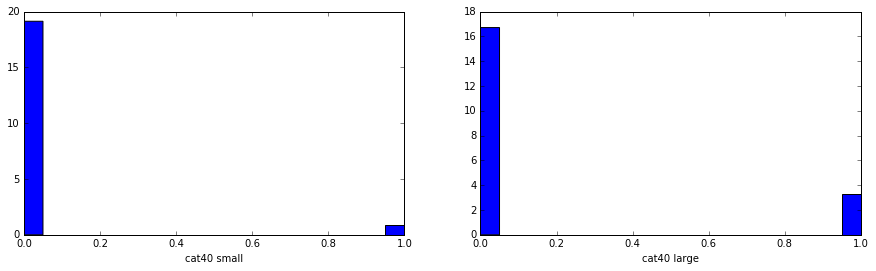

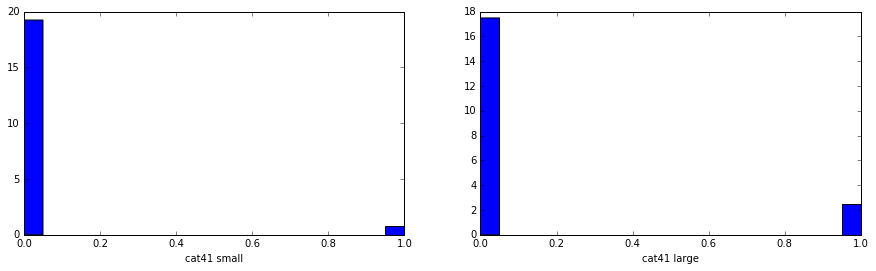

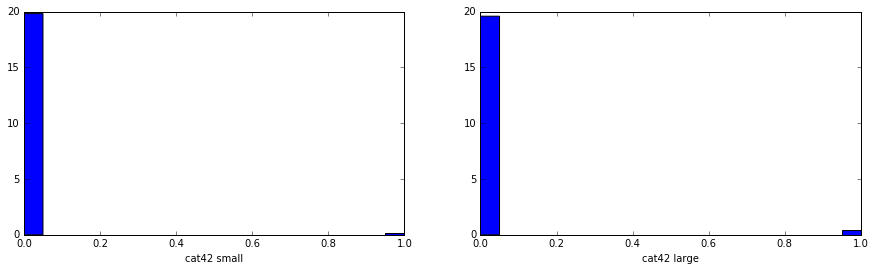

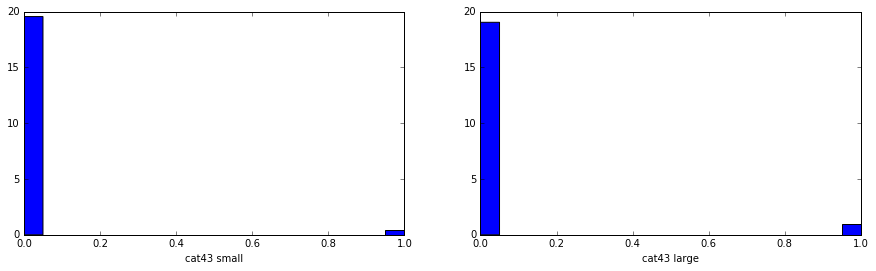

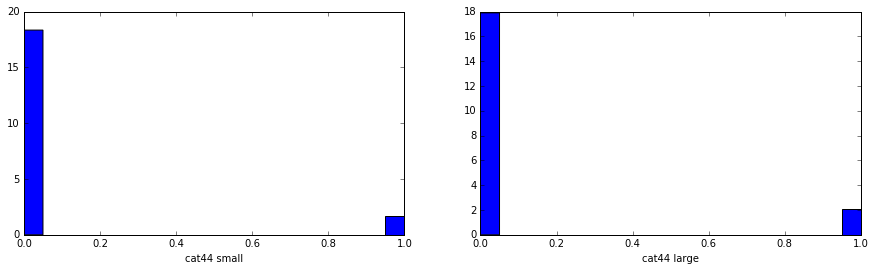

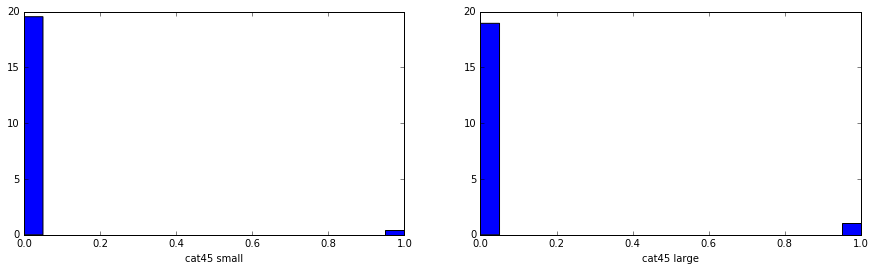

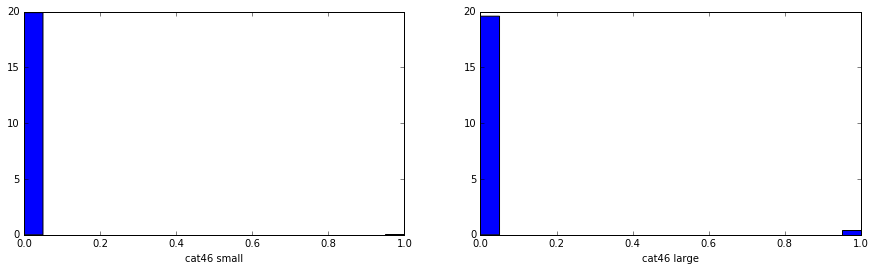

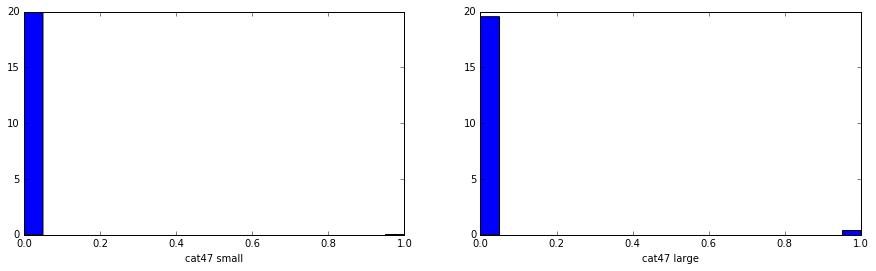

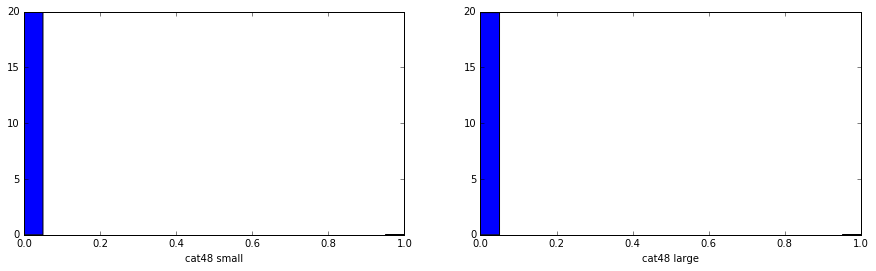

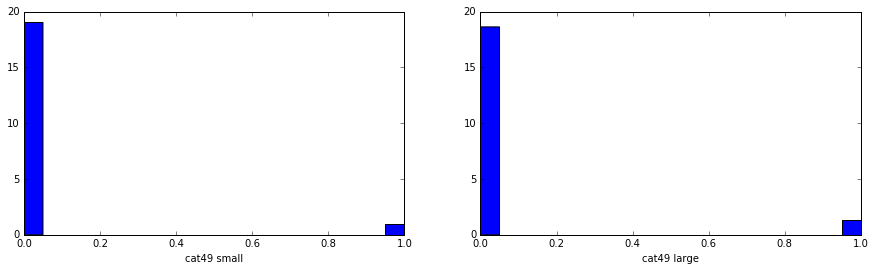

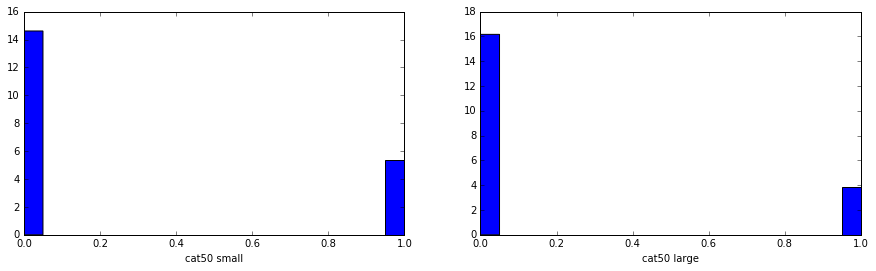

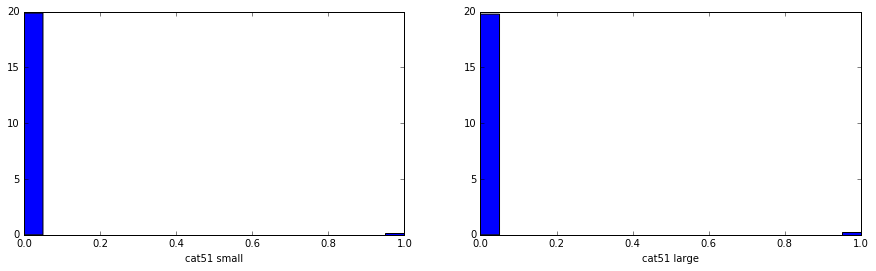

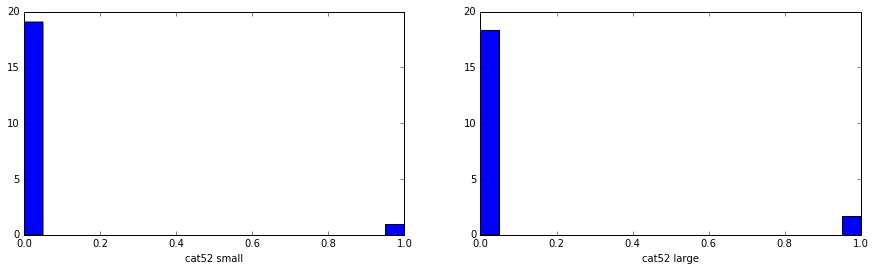

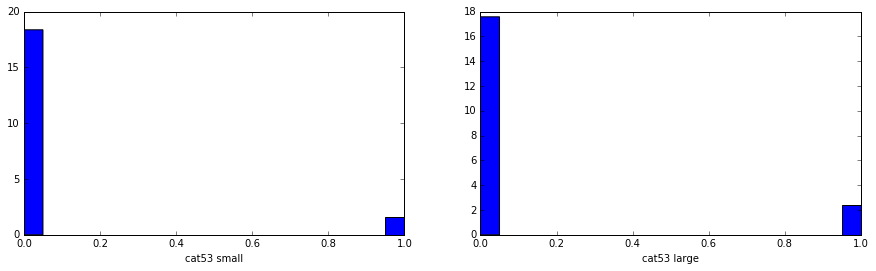

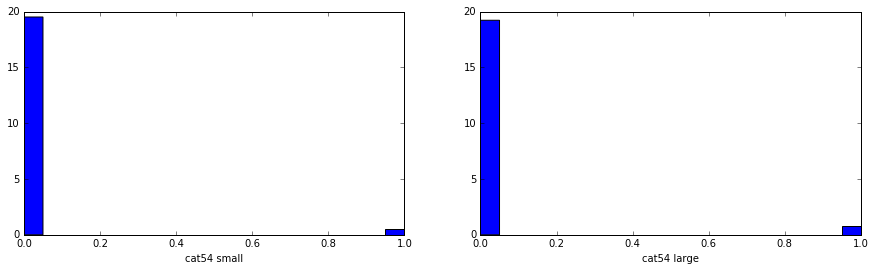

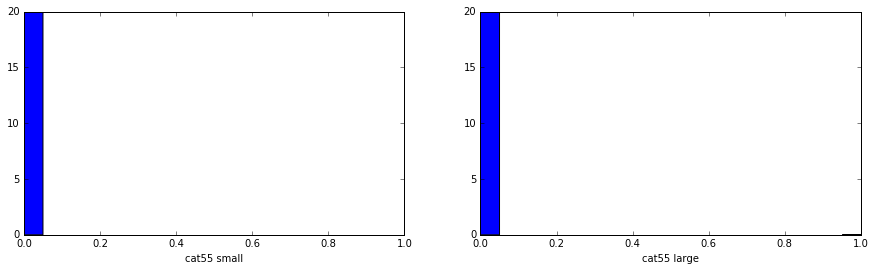

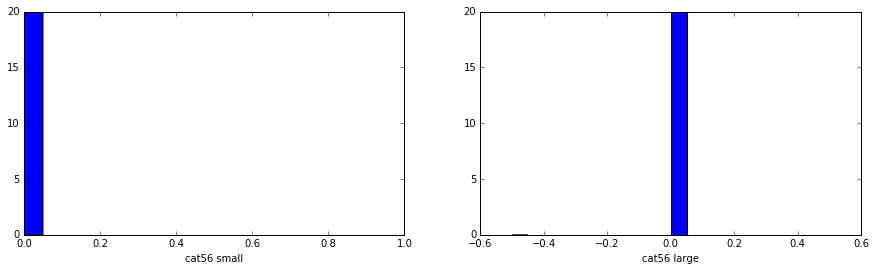

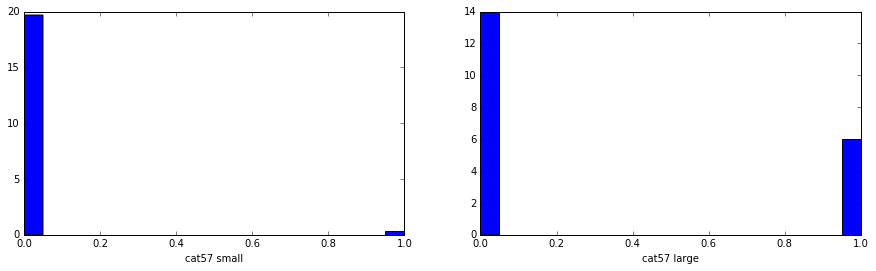

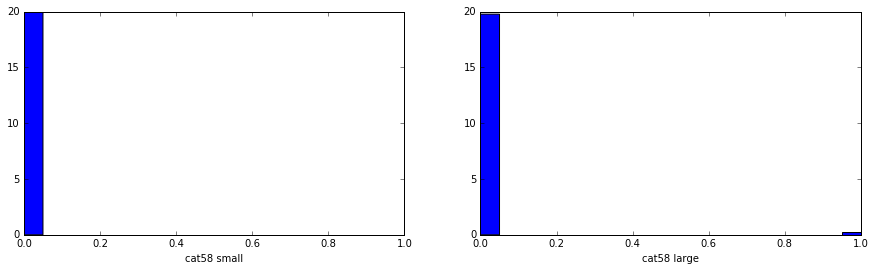

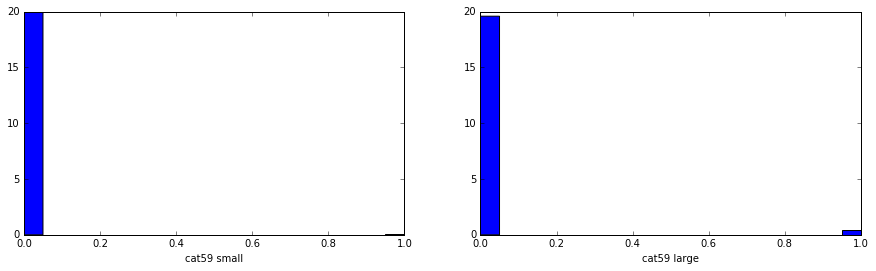

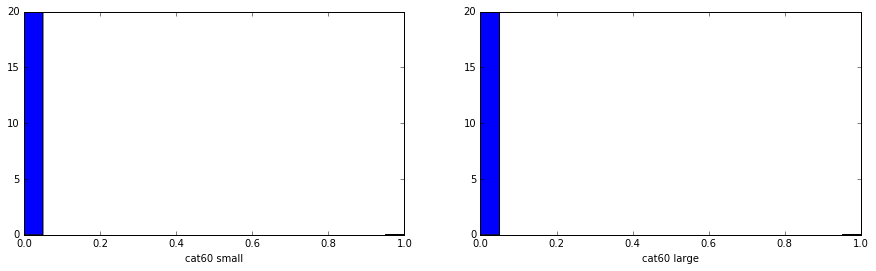

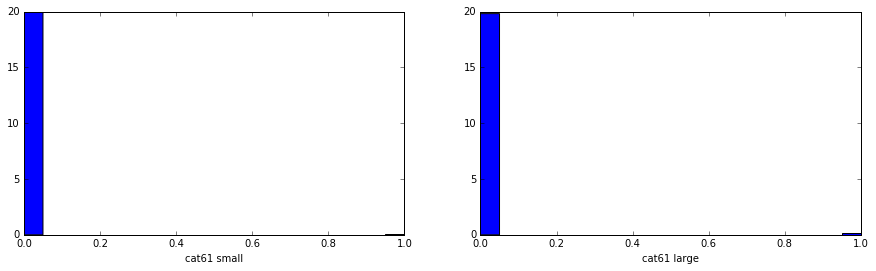

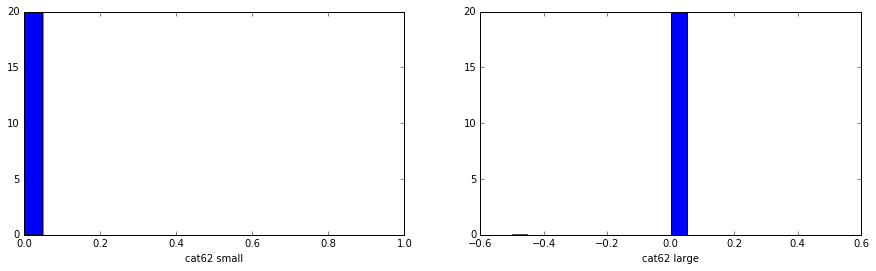

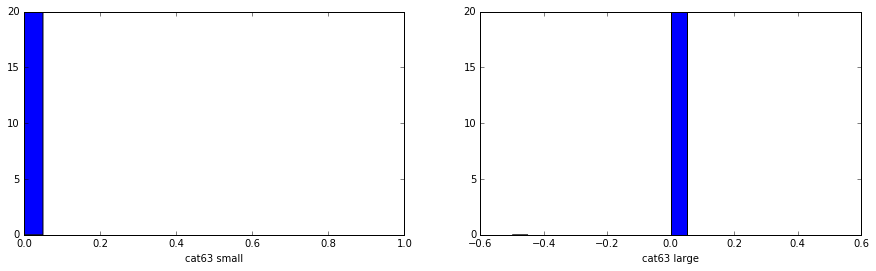

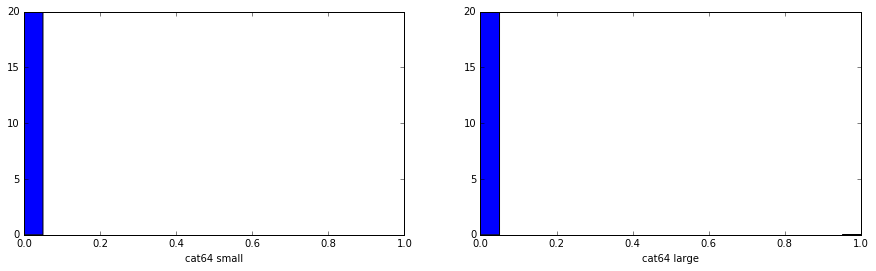

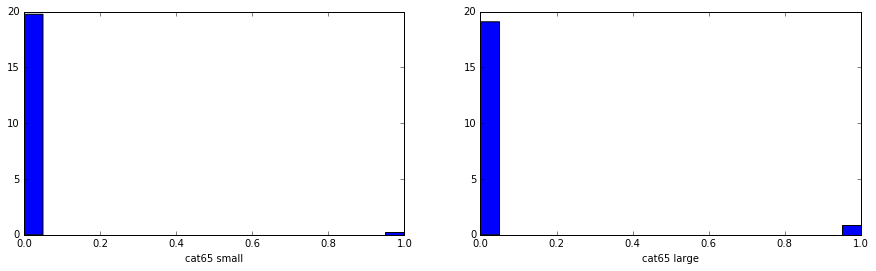

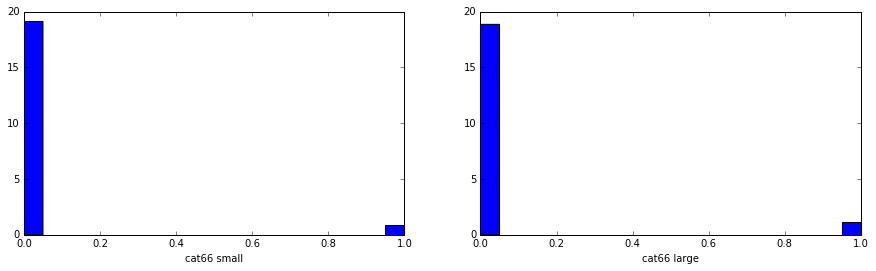

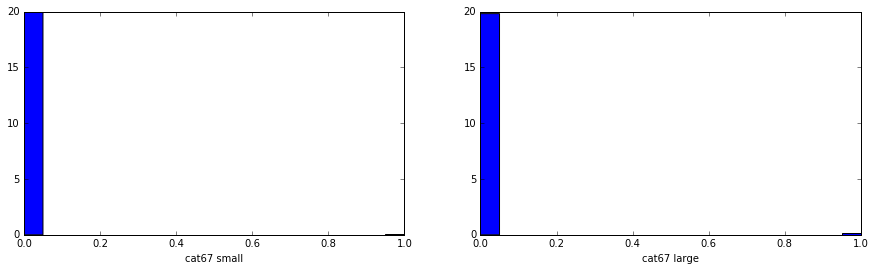

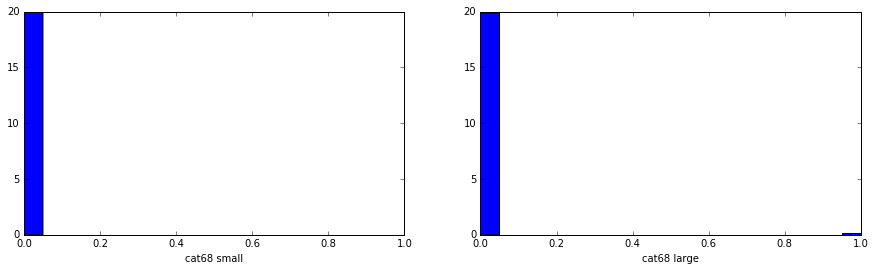

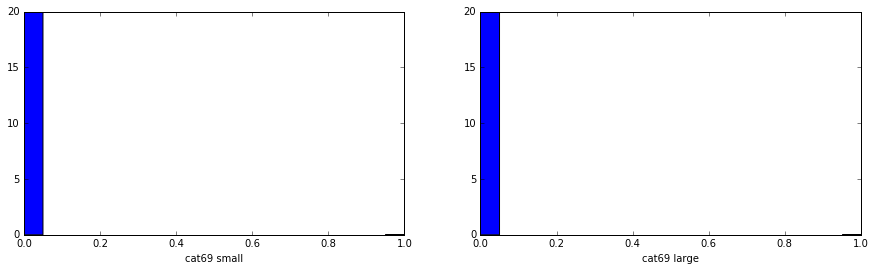

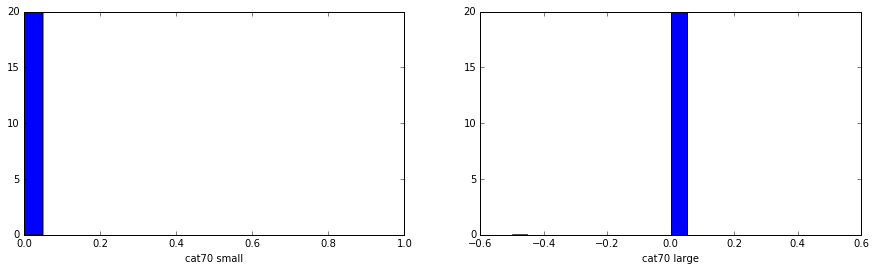

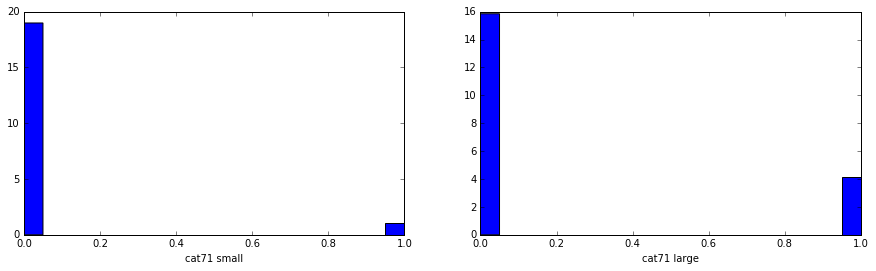

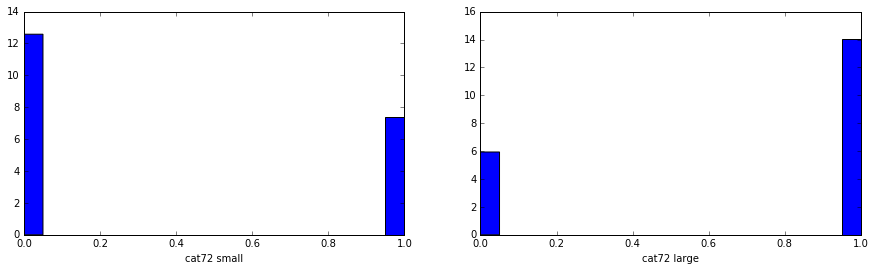

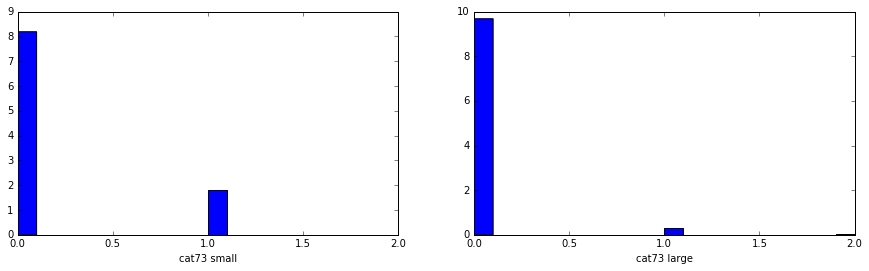

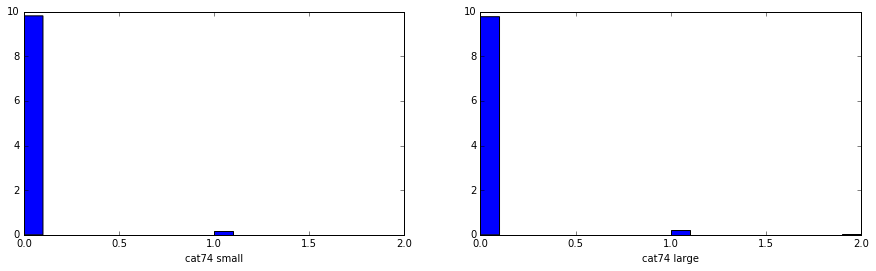

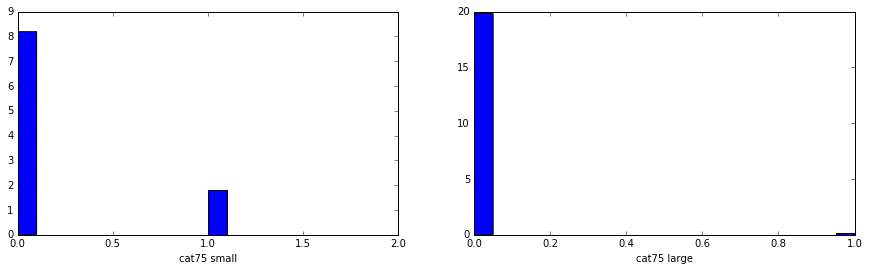

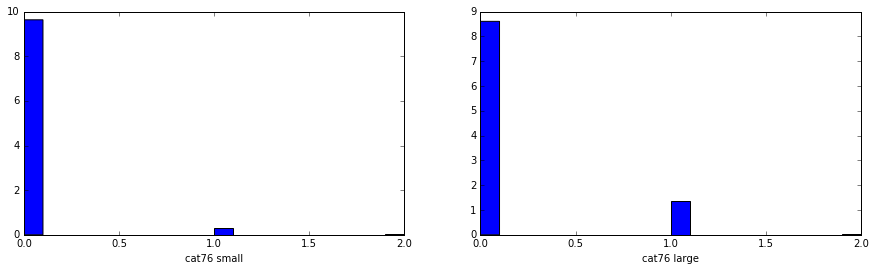

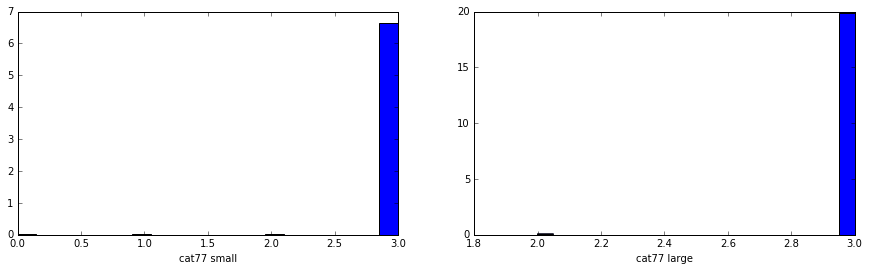

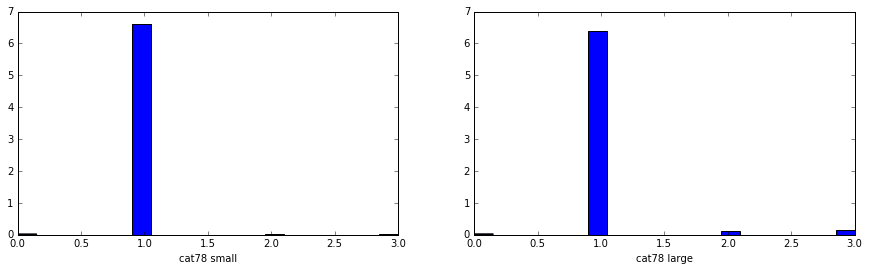

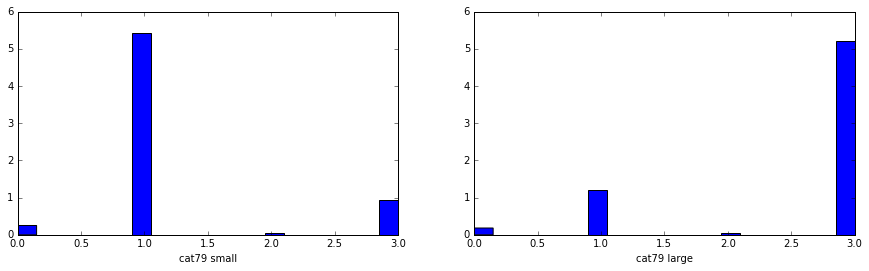

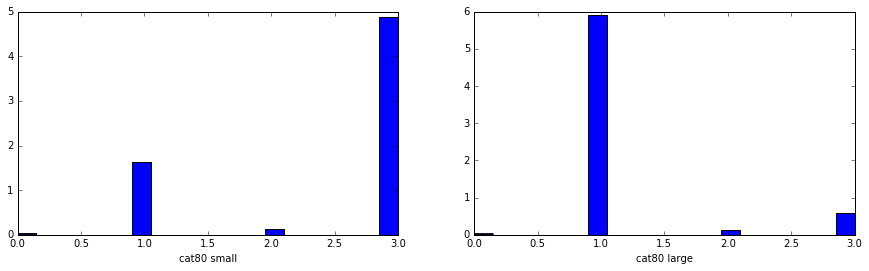

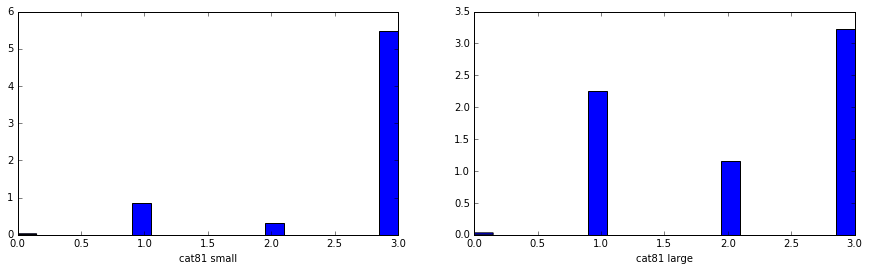

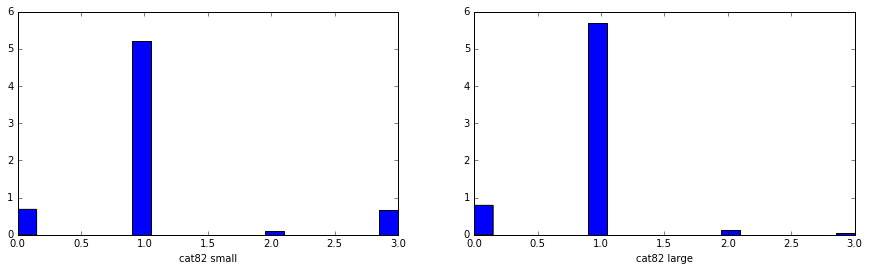

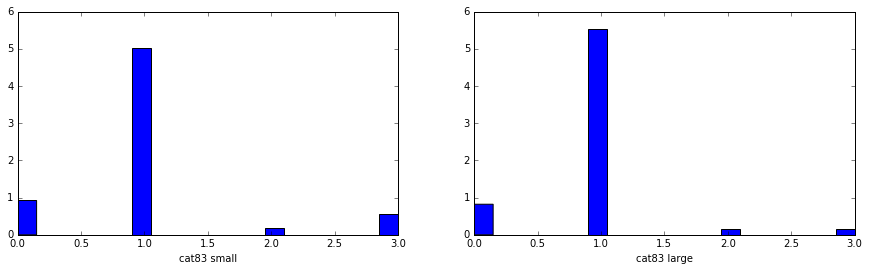

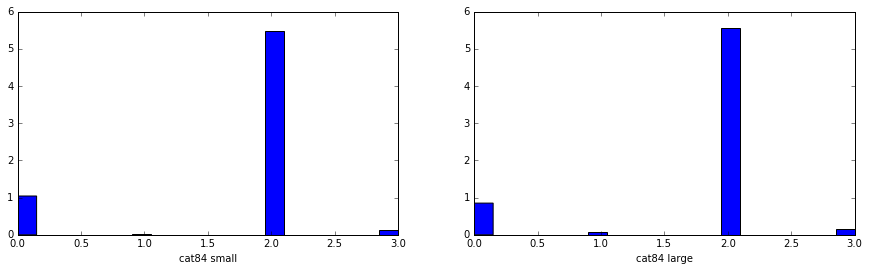

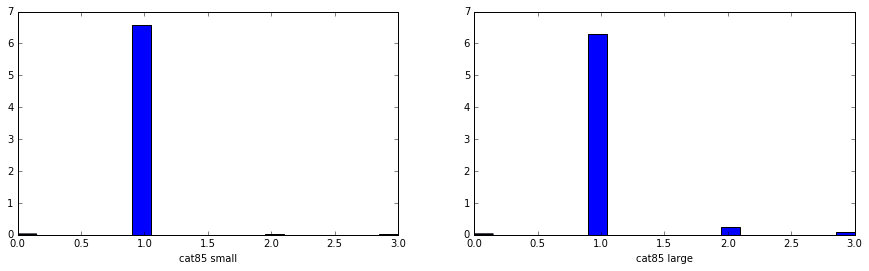

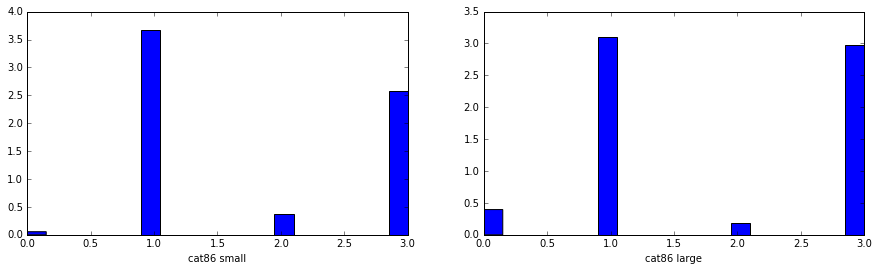

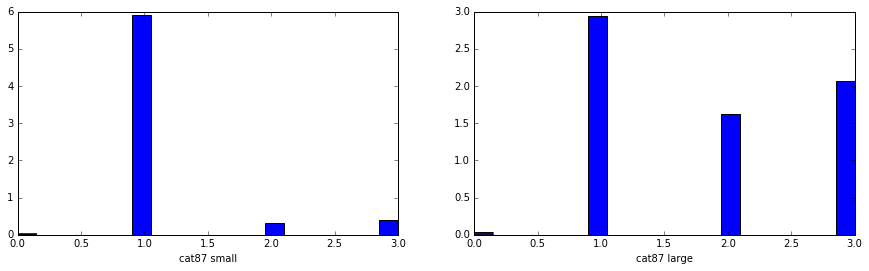

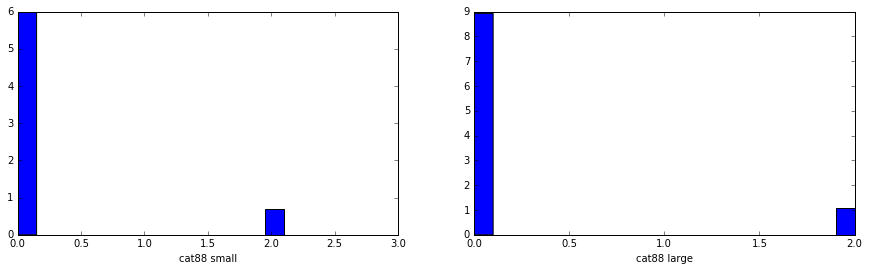

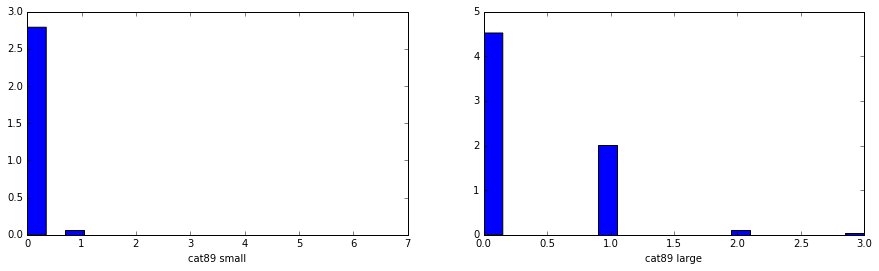

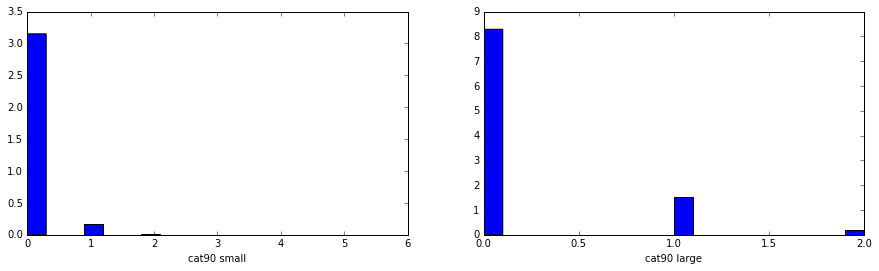

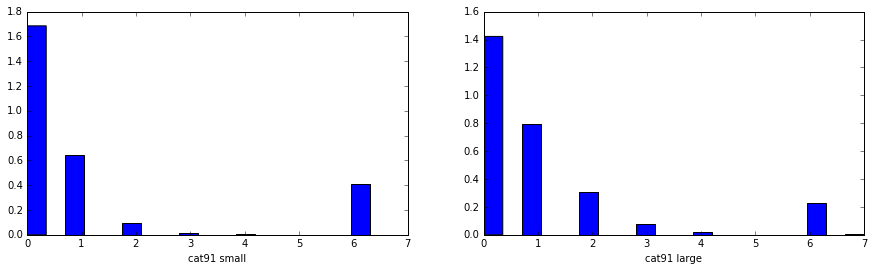

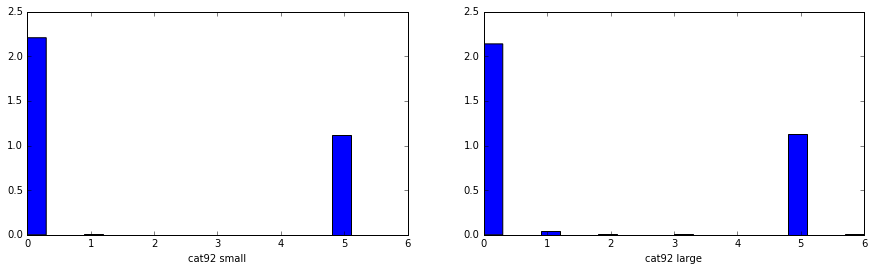

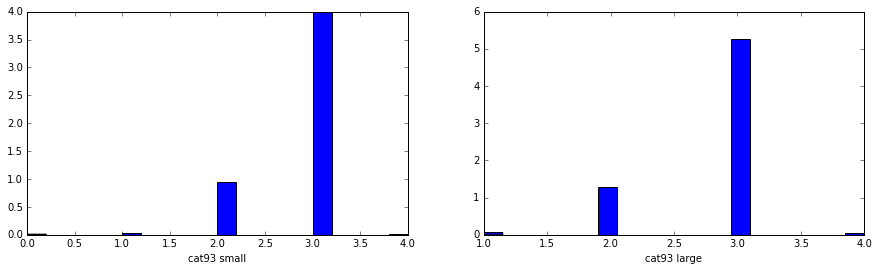

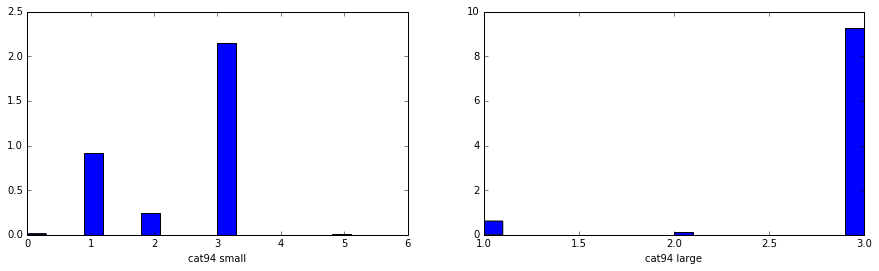

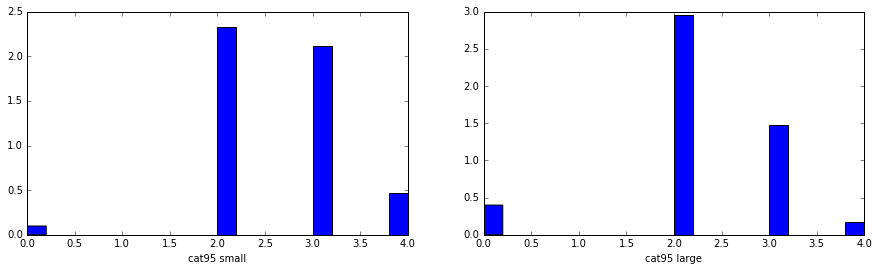

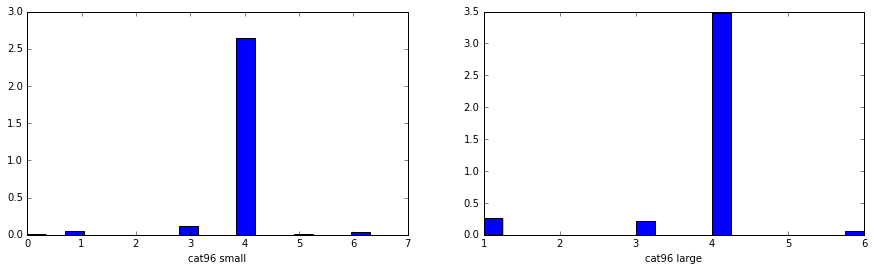

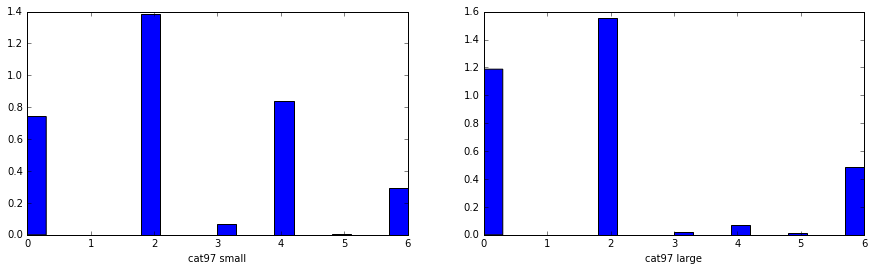

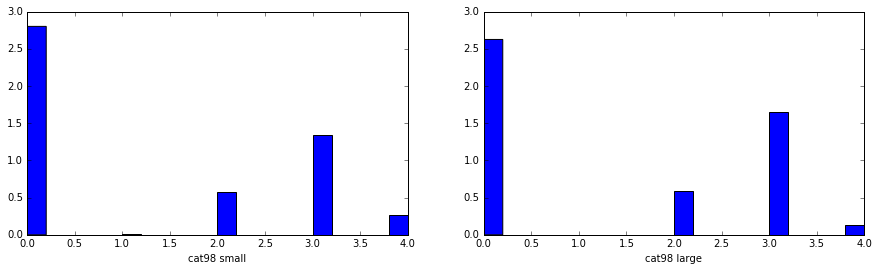

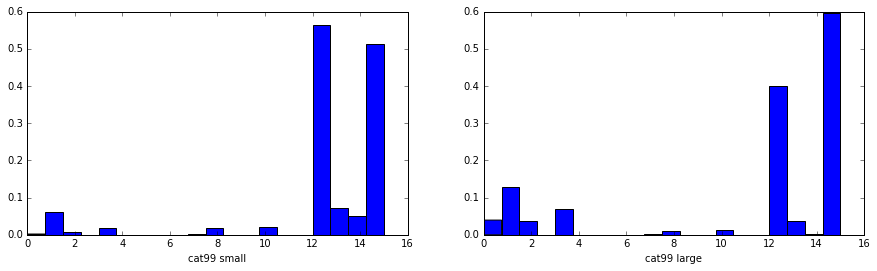

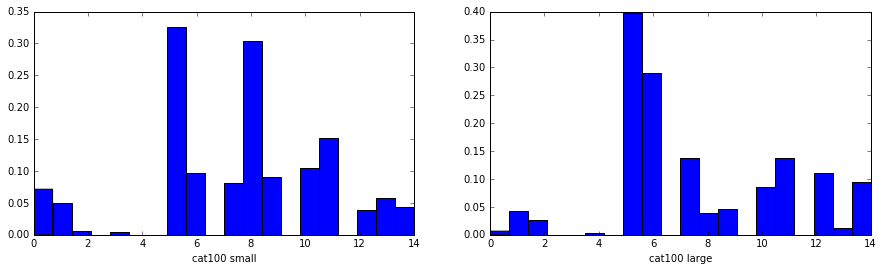

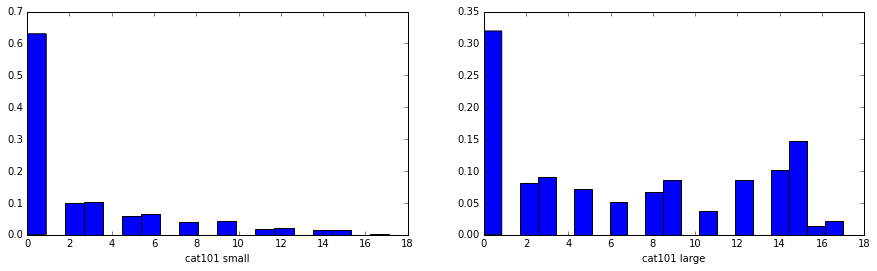

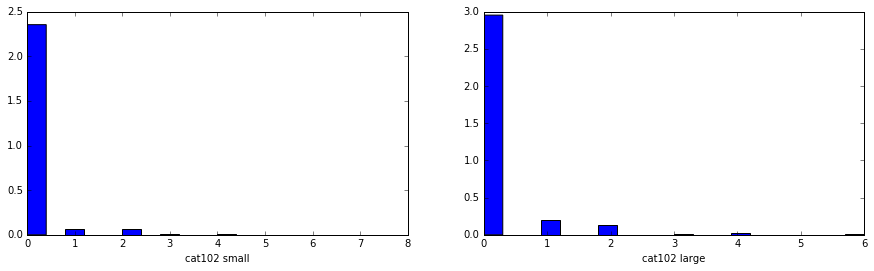

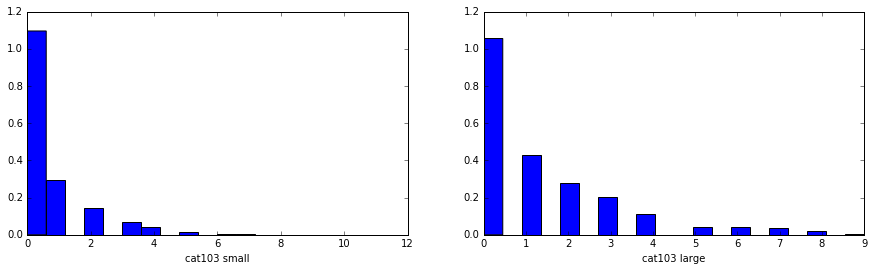

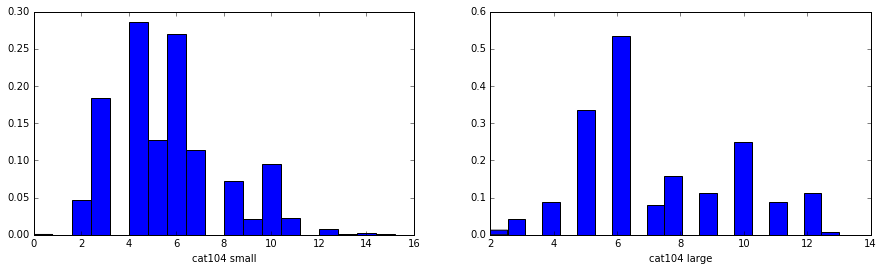

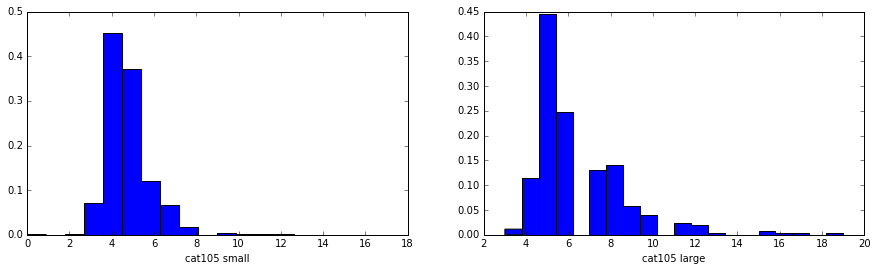

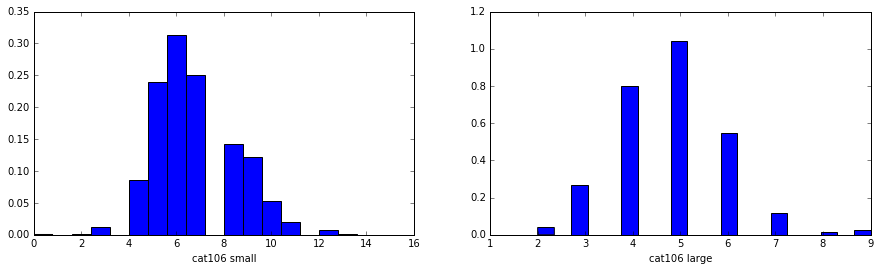

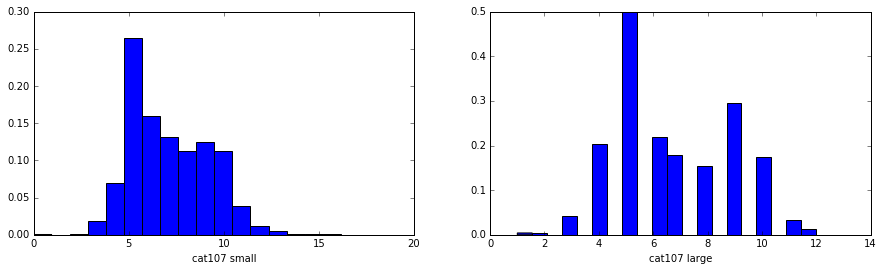

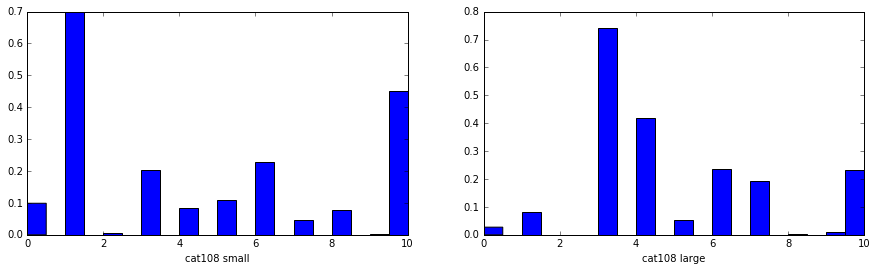

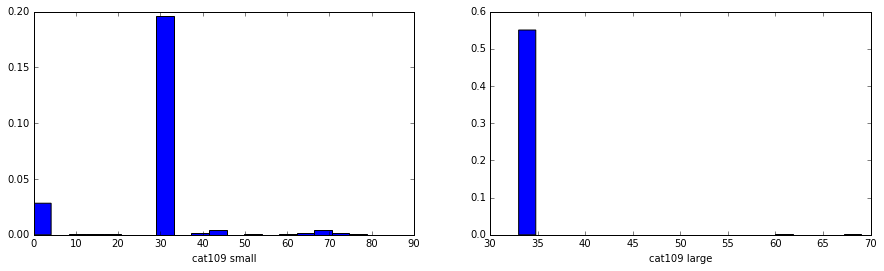

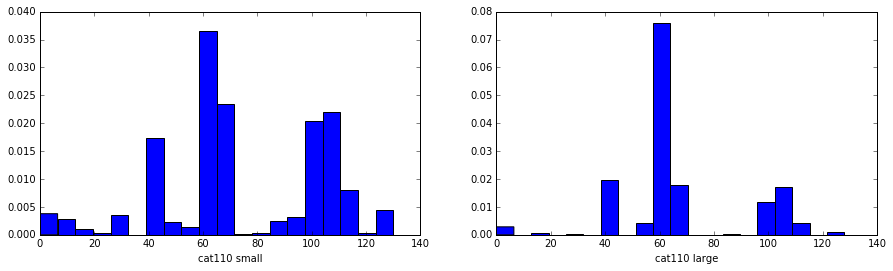

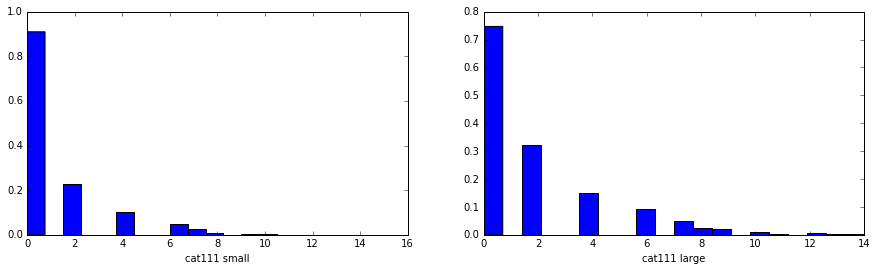

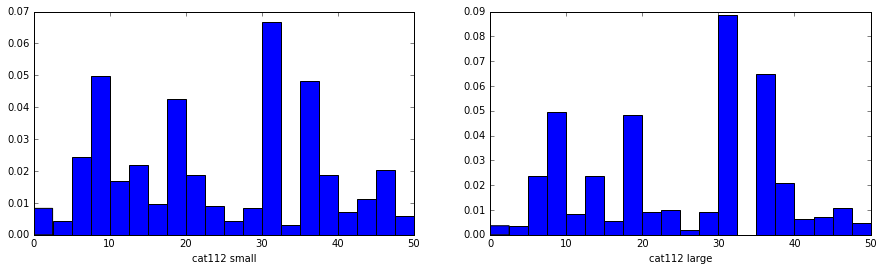

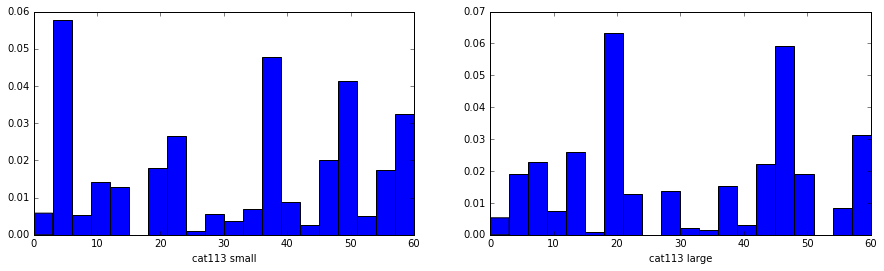

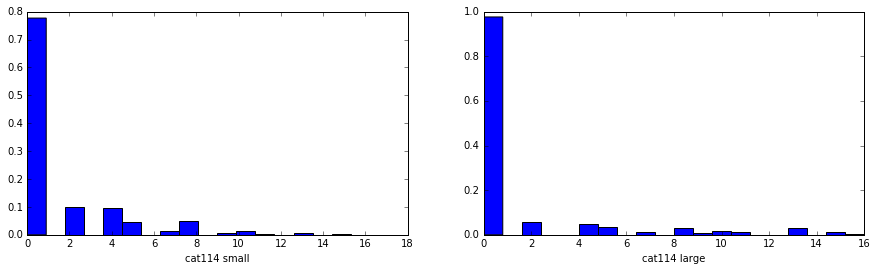

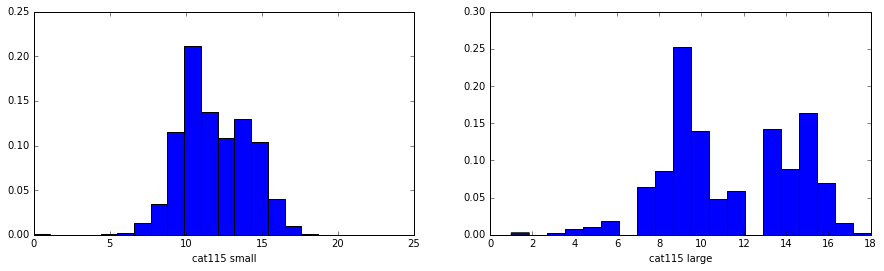

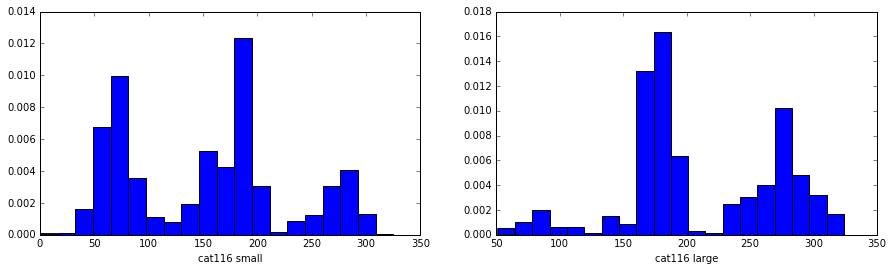

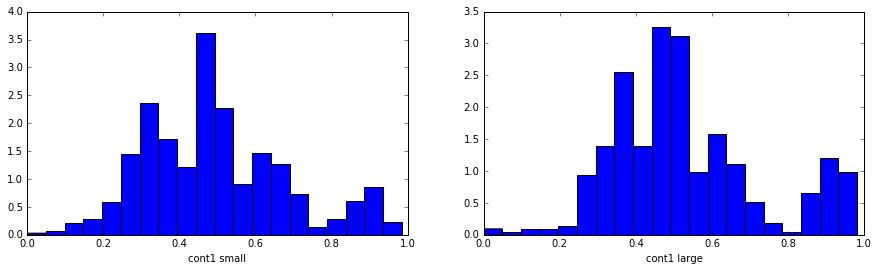

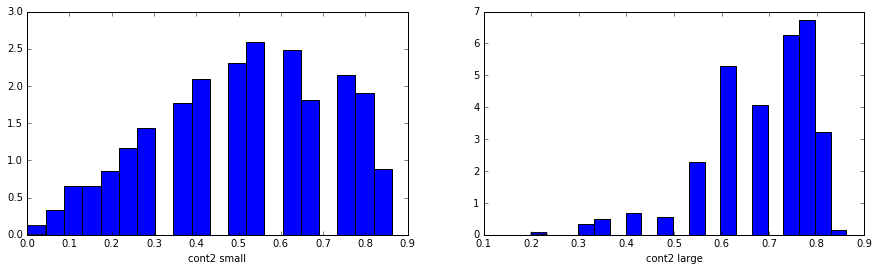

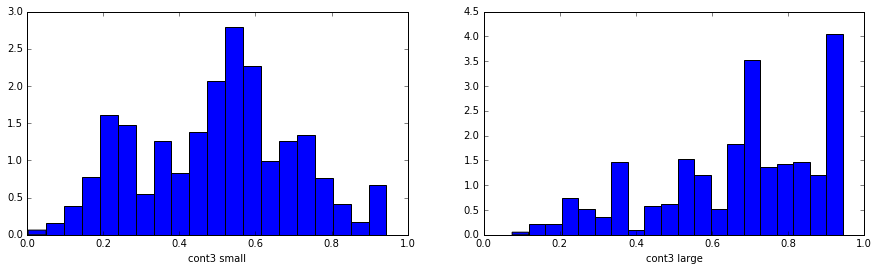

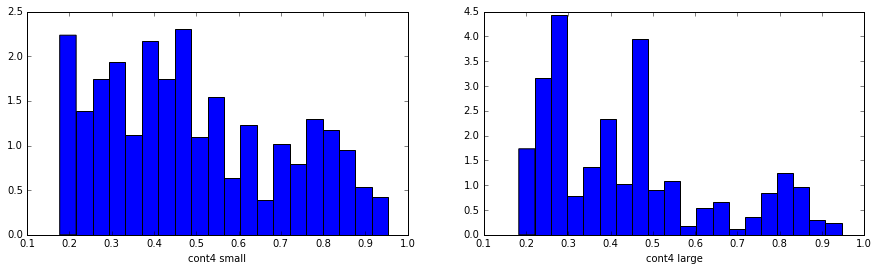

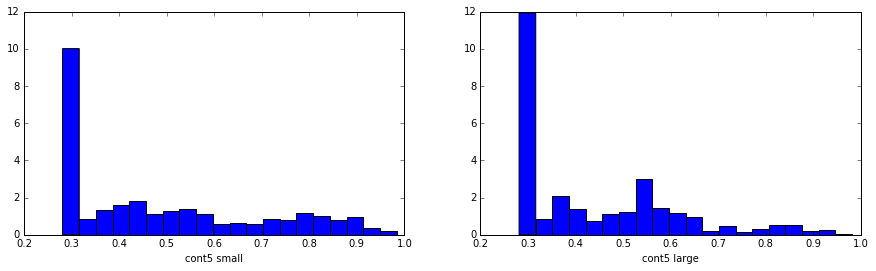

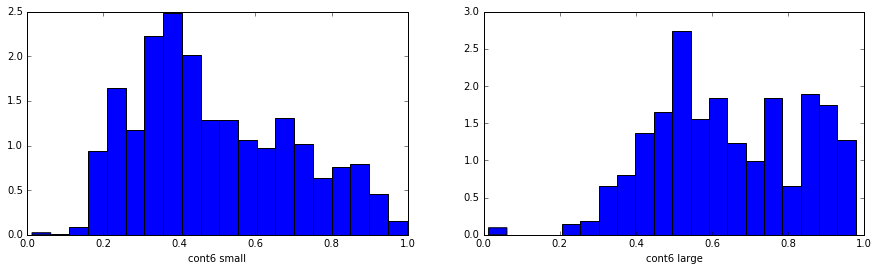

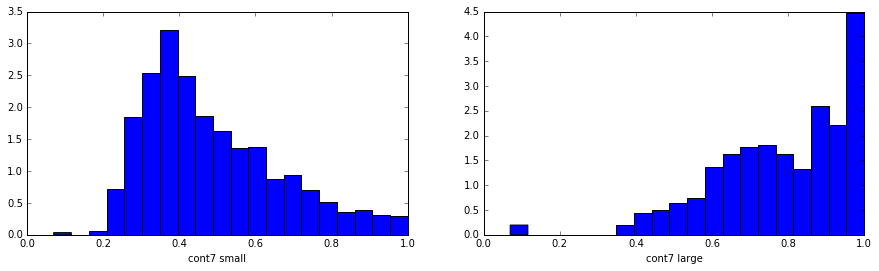

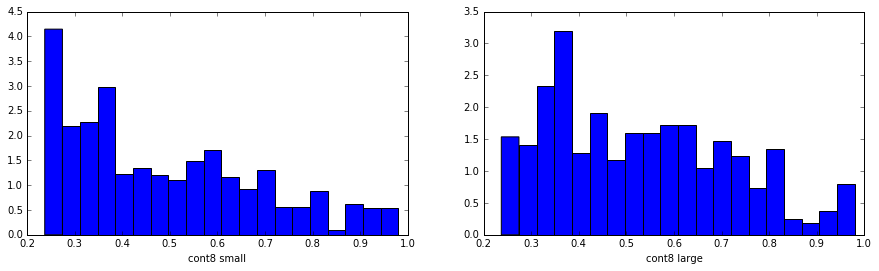

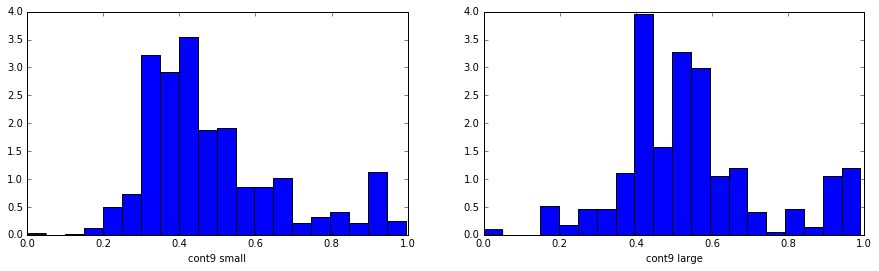

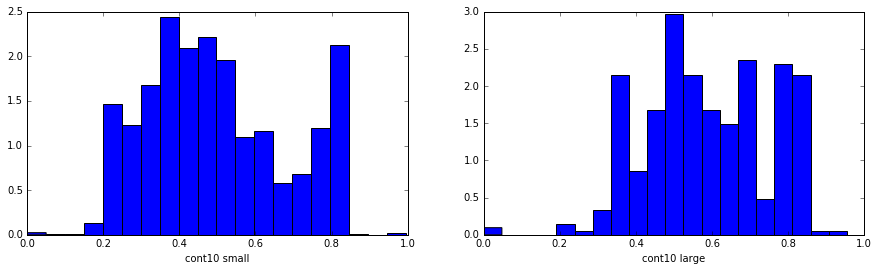

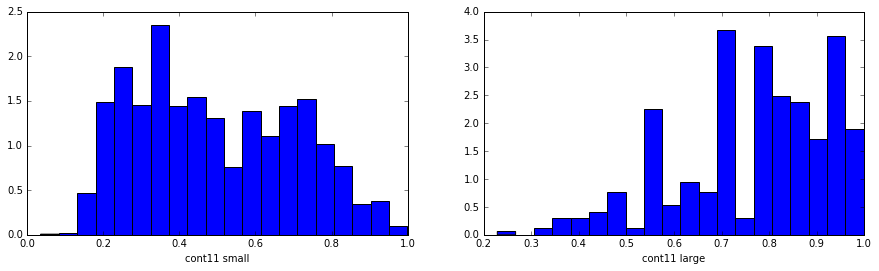

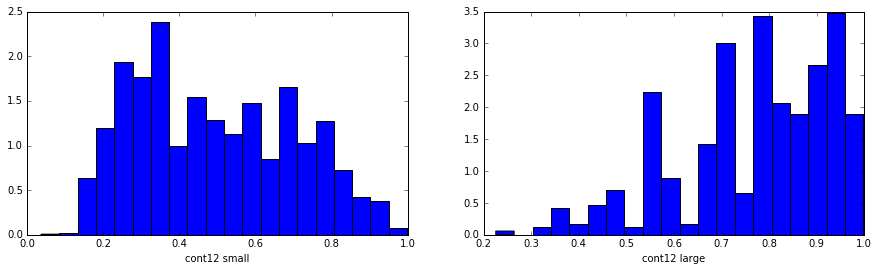

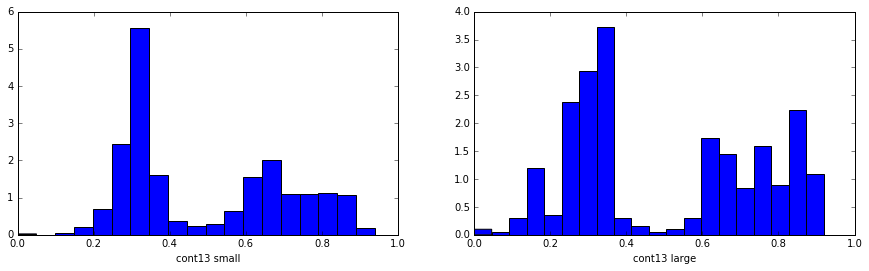

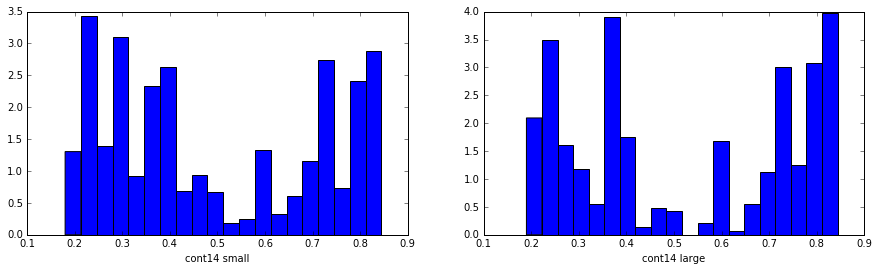

In [30]:
for col in features:
    plt.figure(figsize=(15,4));
    plt.subplot(1,2,1)
    plt.hist(train_s[col],bins=20,normed=True)
    plt.xlabel(col+' '+'small')
    plt.subplot(1,2,2)
    plt.hist(train_l[col],bins=20,normed=True)
    plt.xlabel(col+' '+'large')
# cont12, cont11, cont7

In [31]:
# def cramers_corrected_stat(confusion_matrix):
#     """ calculate Cramers V statistic for categorial-categorial association.
#         uses correction from Bergsma and Wicher, 
#         Journal of the Korean Statistical Society 42 (2013): 323-328
#     """
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

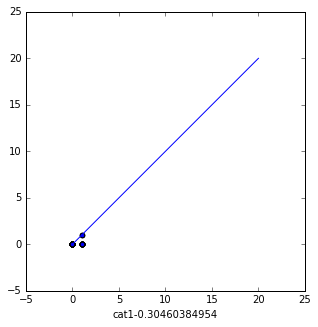

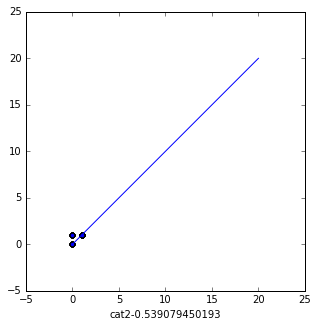

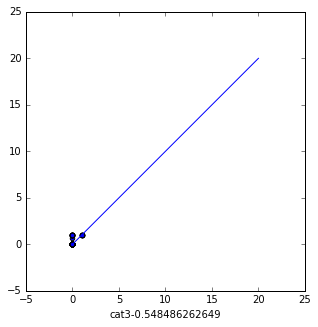

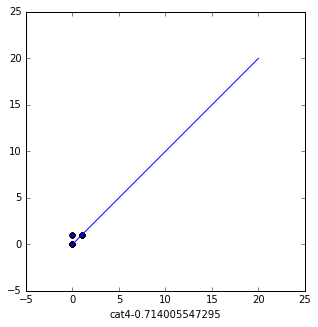

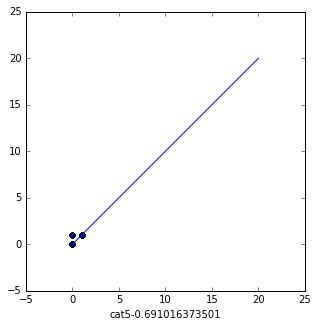

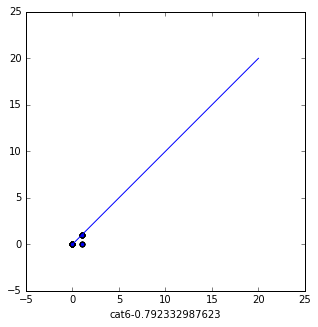

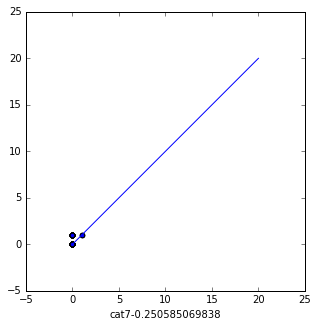

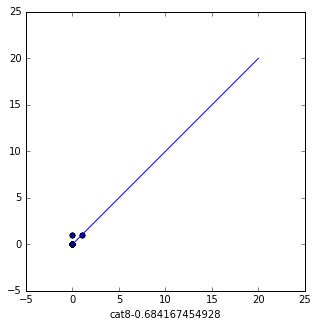

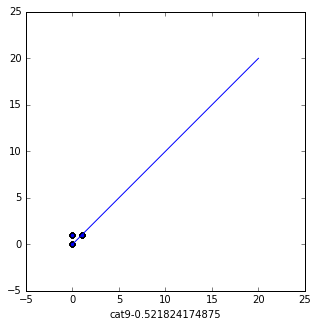

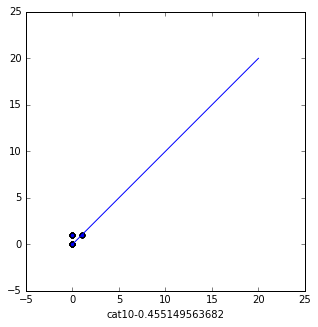

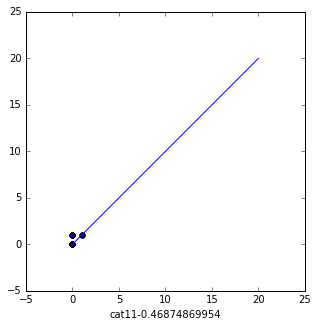

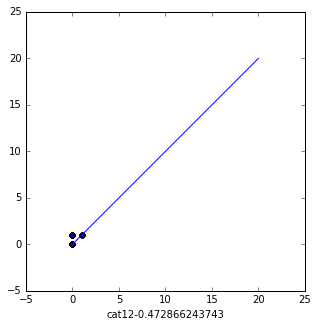

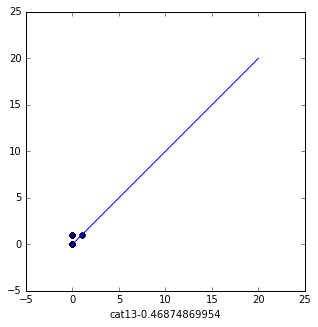

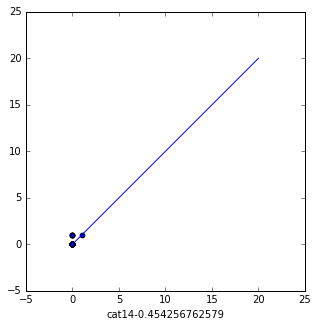

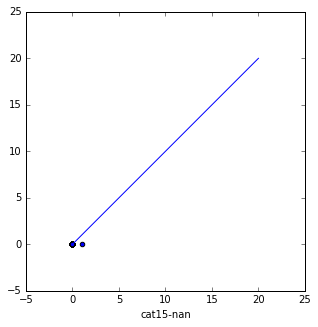

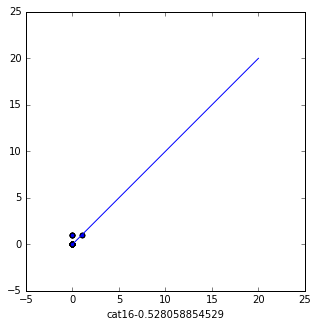

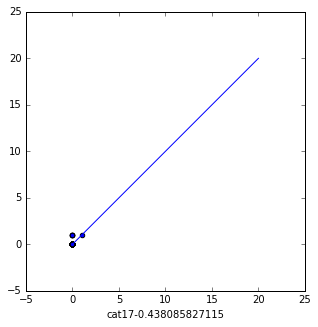

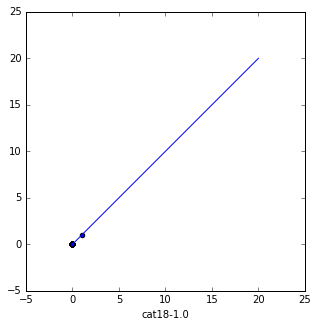

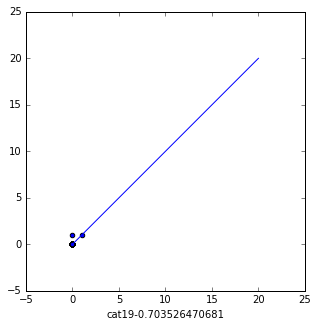

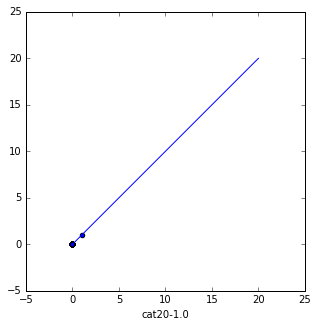

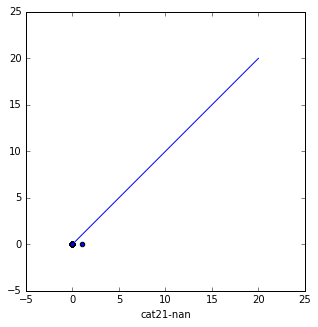

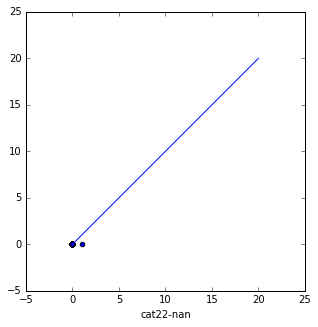

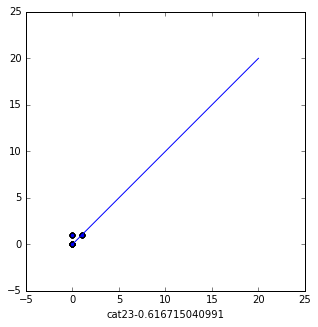

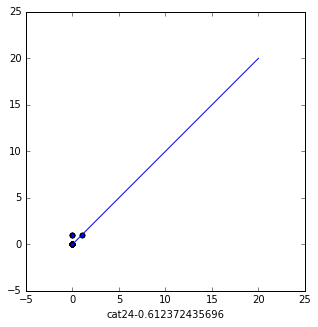

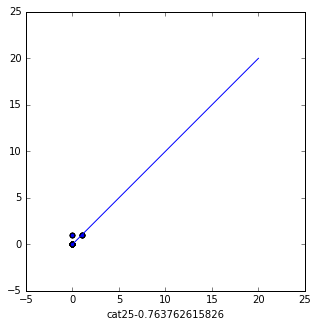

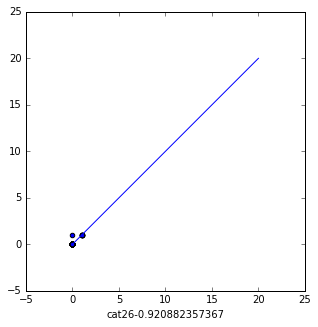

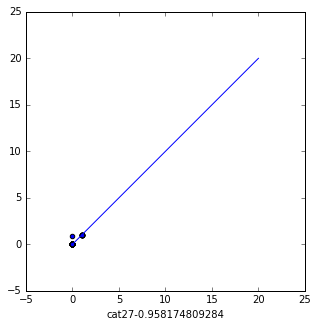

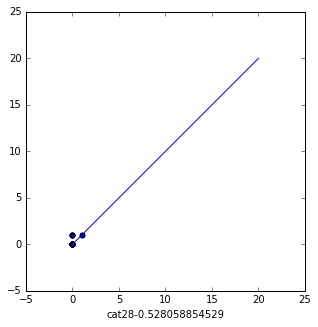

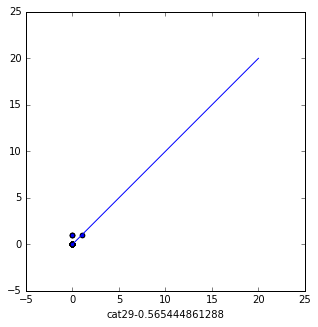

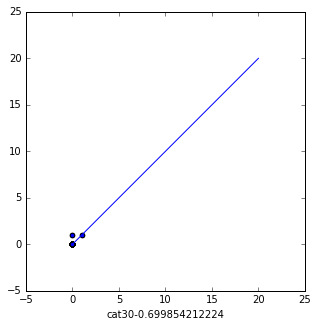

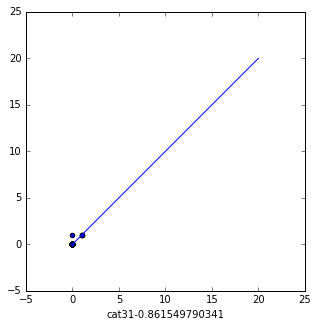

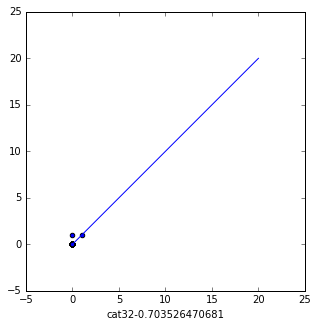

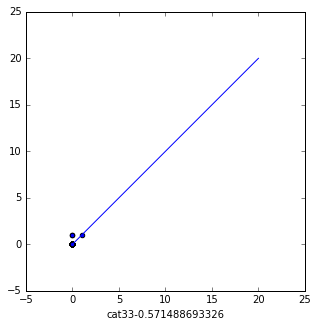

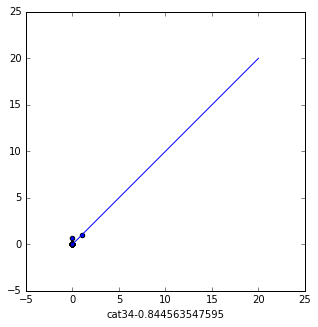

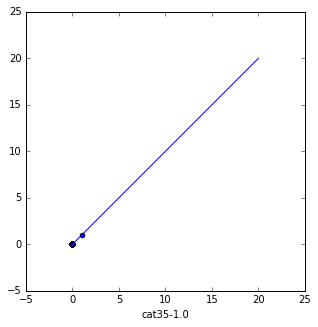

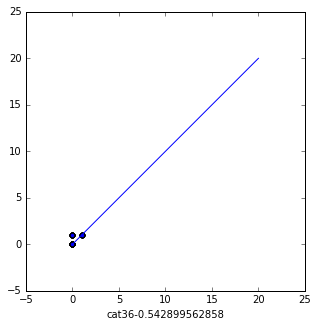

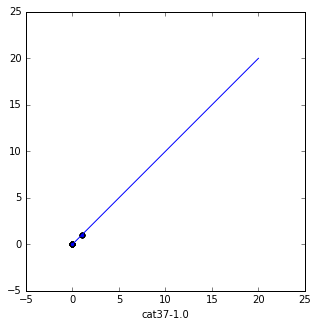

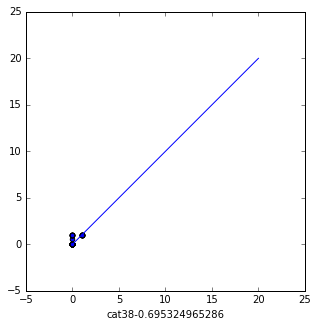

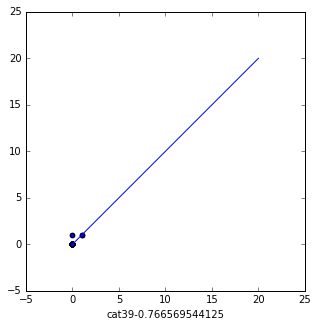

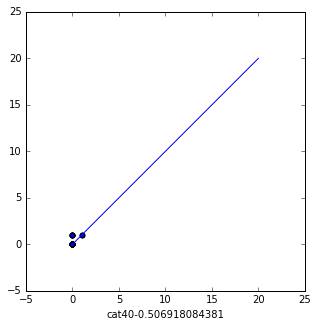

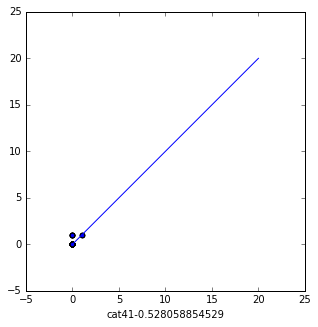

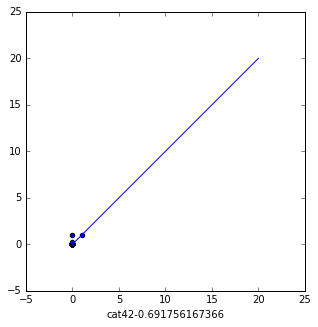

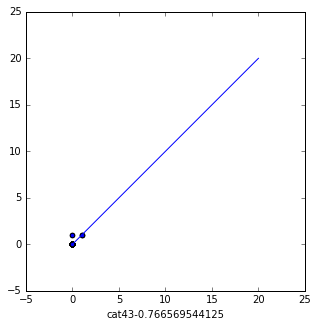

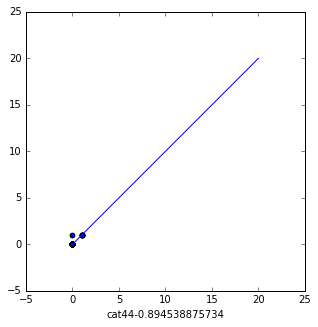

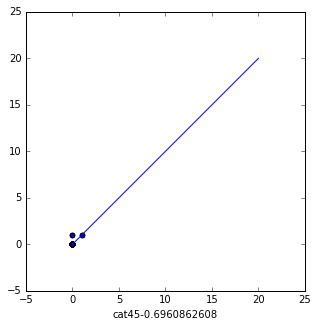

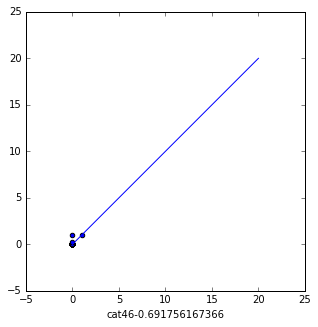

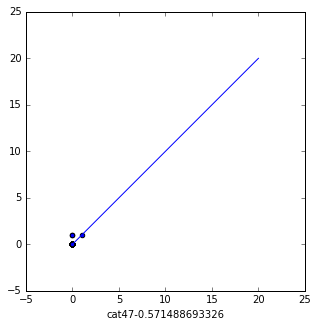

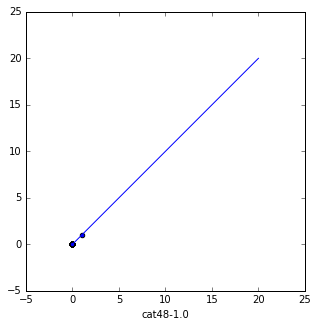

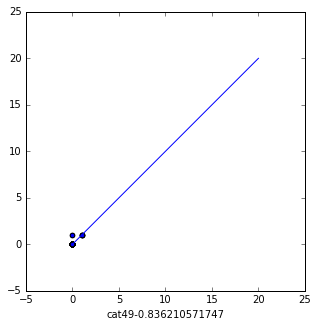

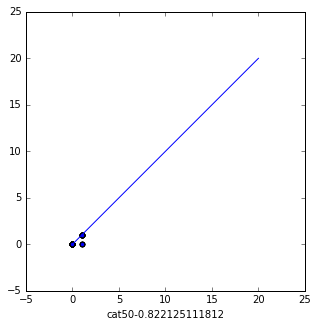

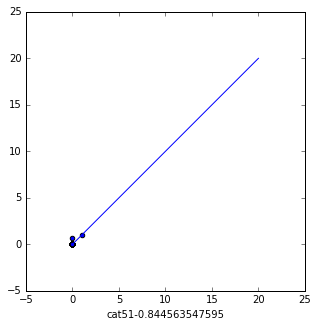

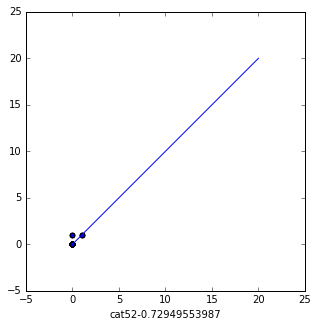

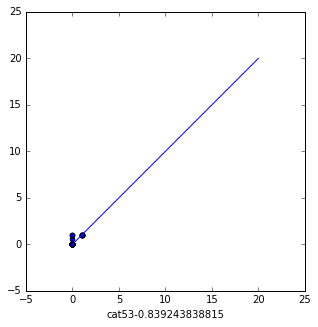

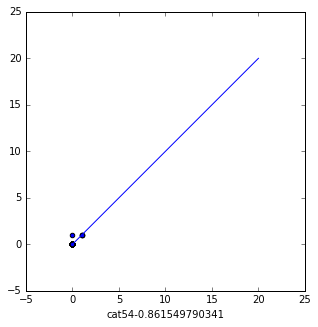

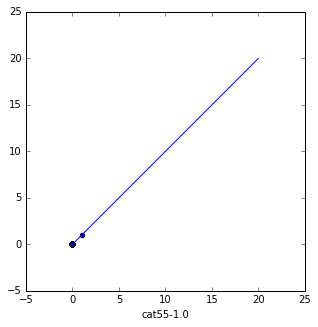

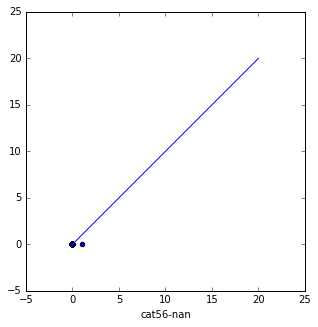

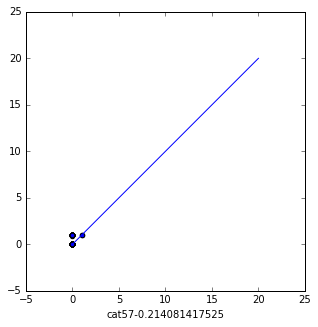

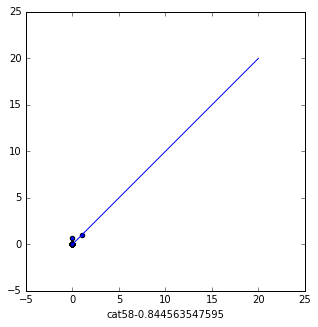

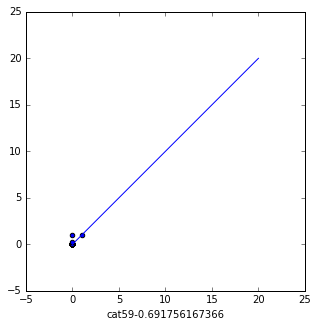

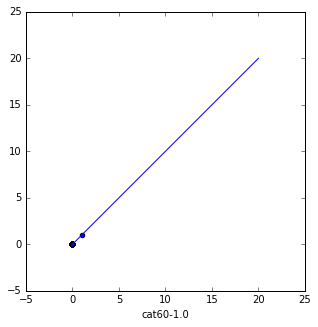

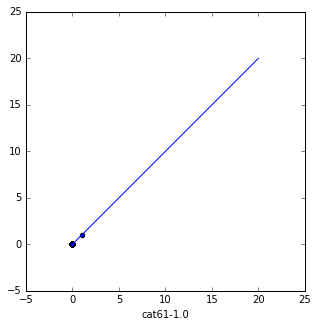

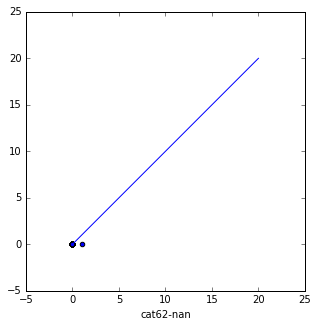

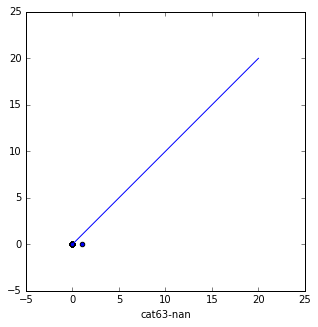

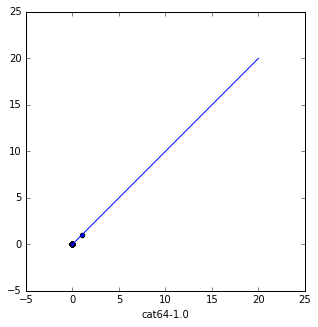

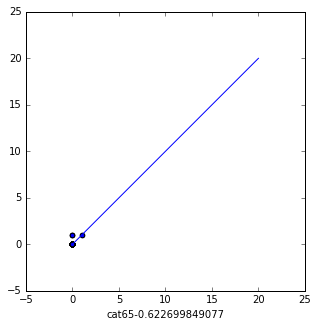

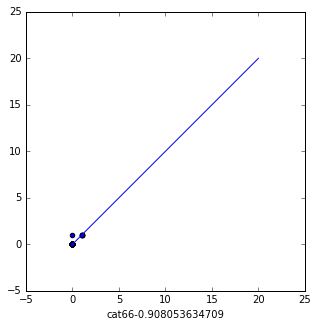

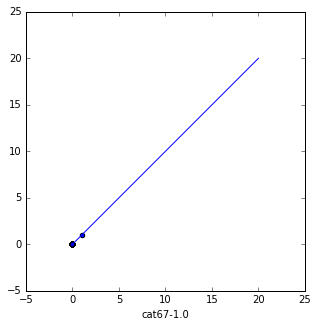

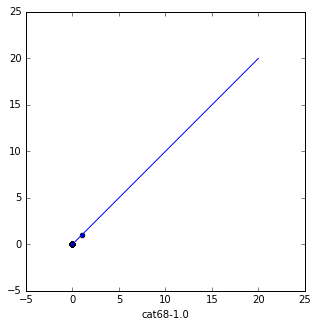

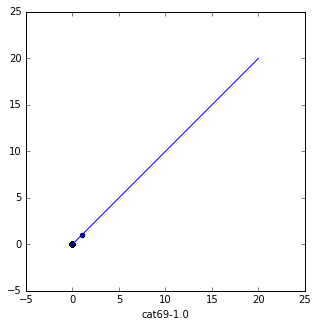

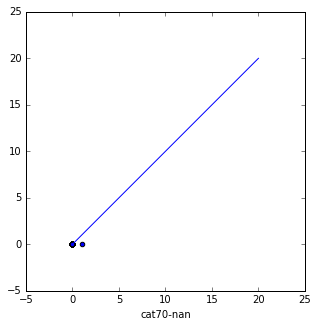

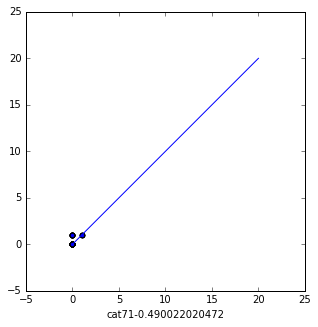

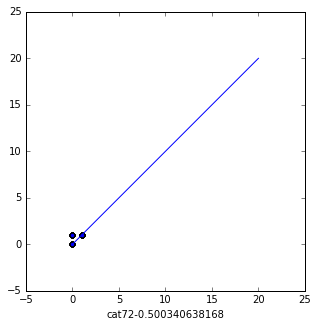

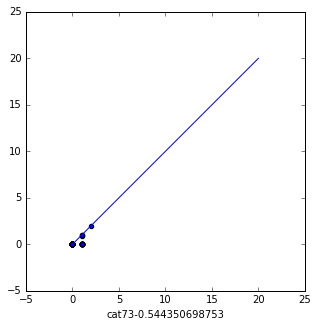

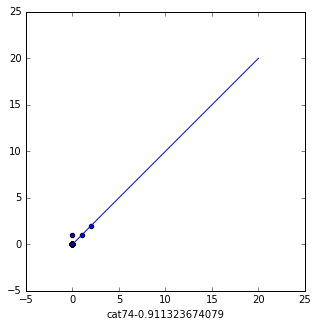

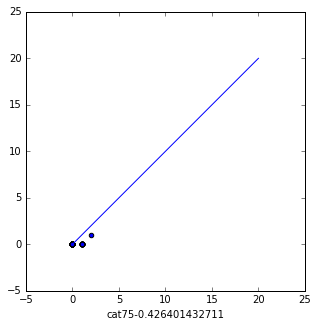

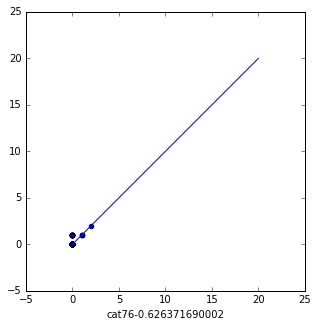

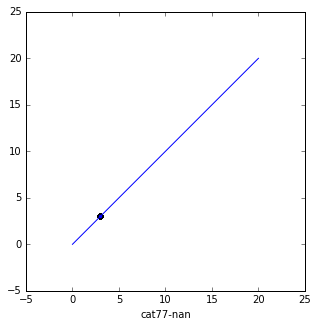

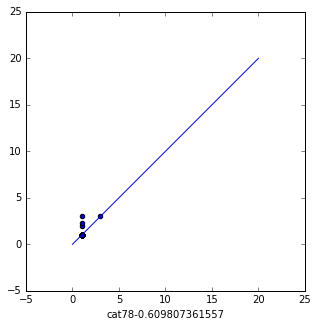

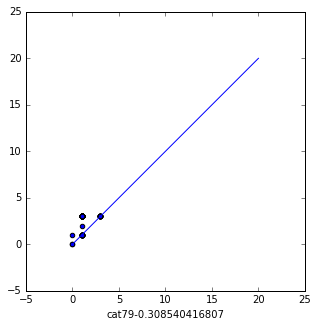

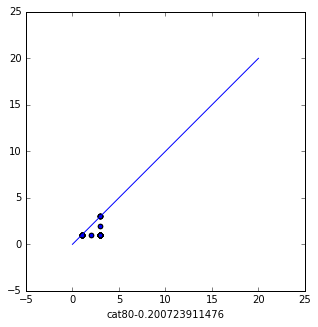

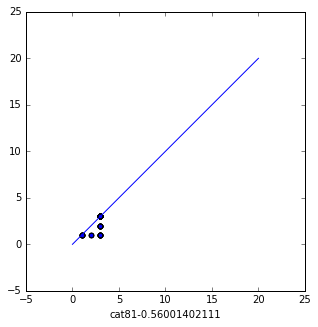

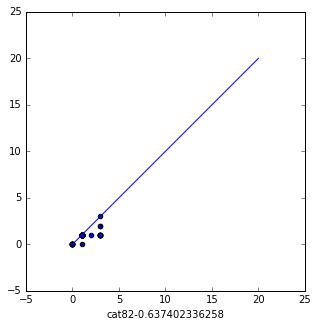

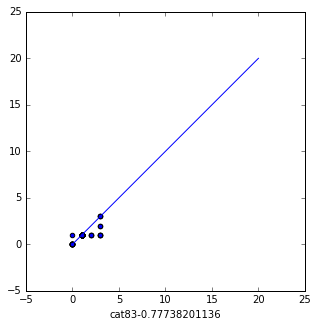

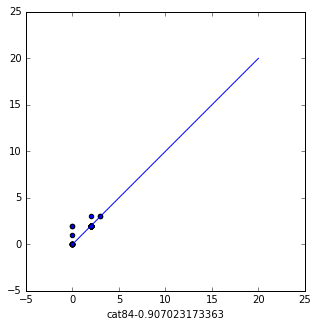

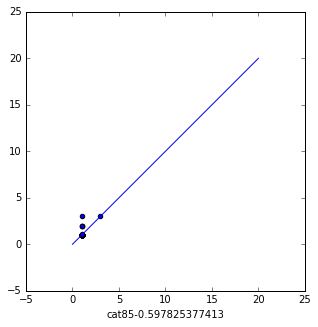

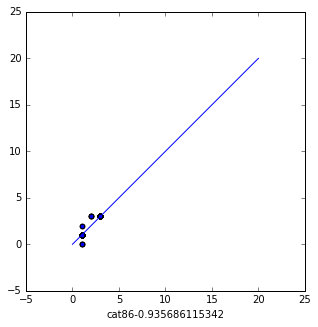

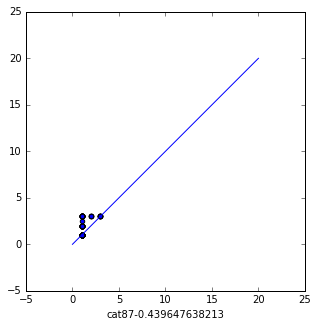

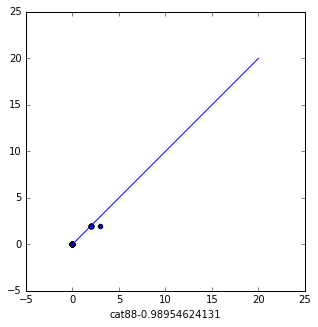

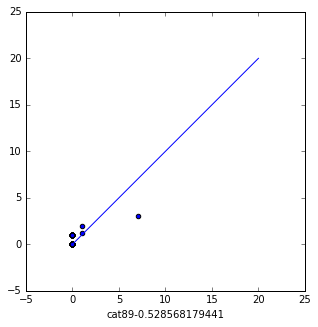

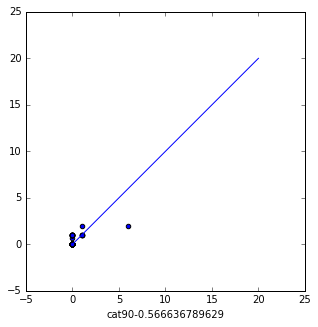

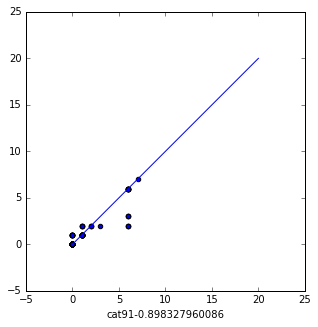

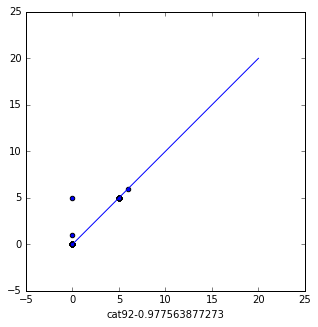

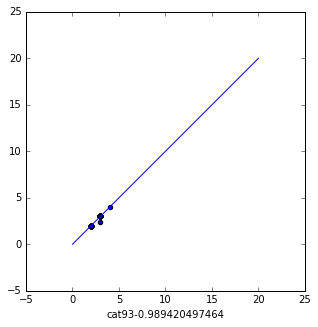

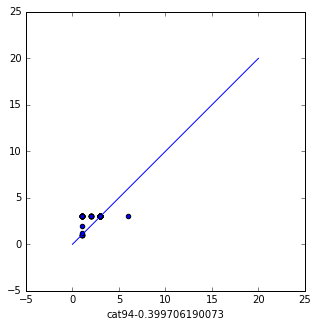

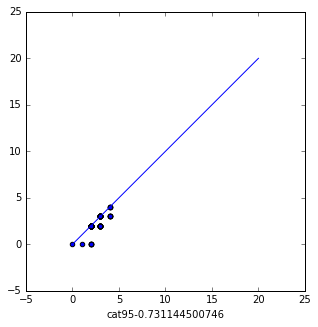

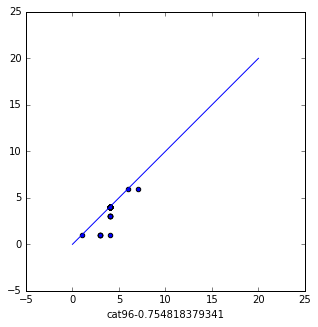

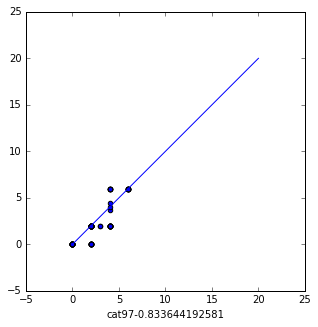

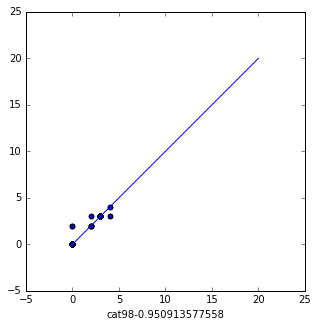

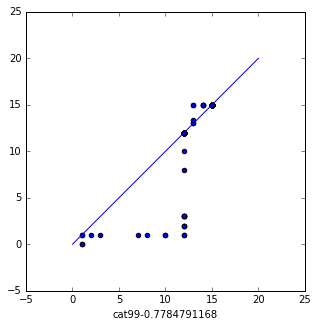

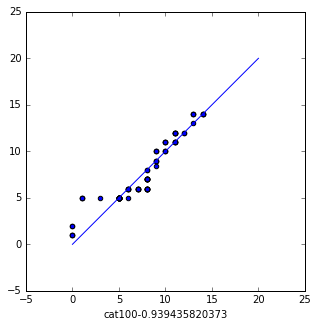

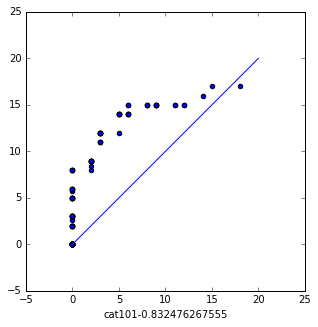

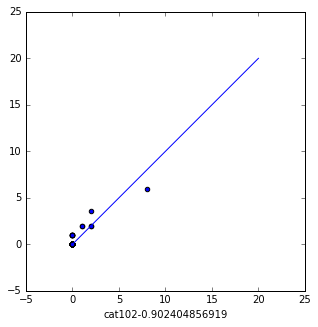

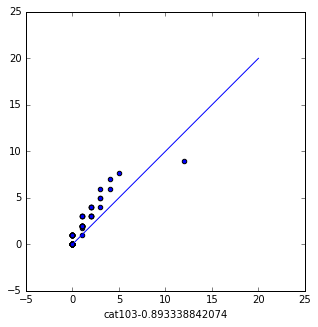

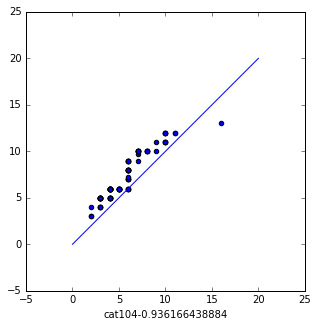

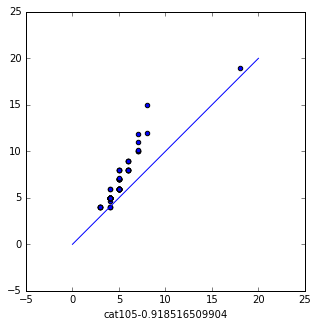

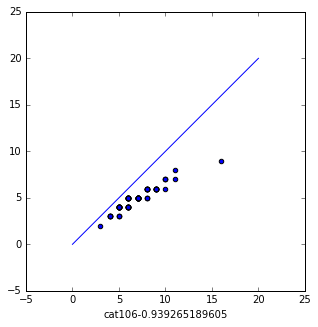

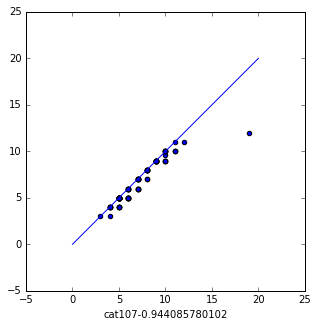

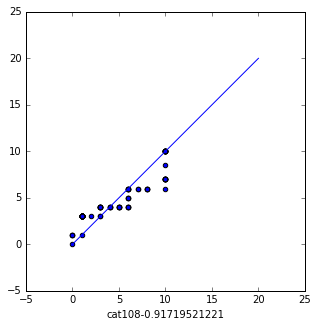

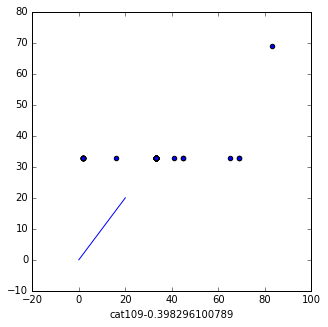

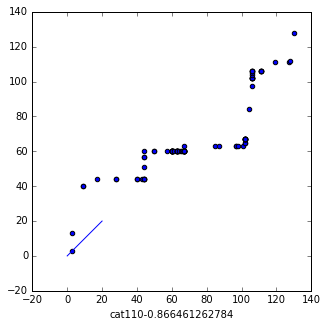

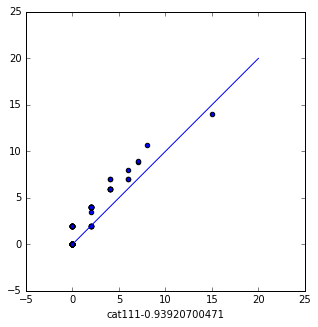

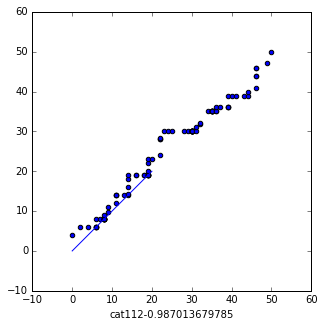

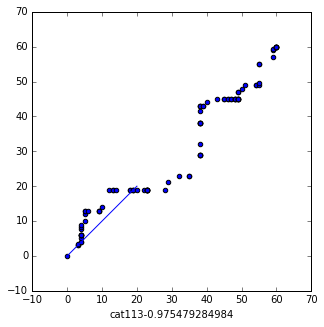

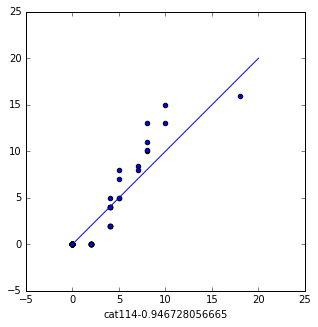

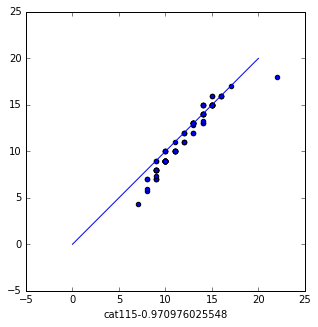

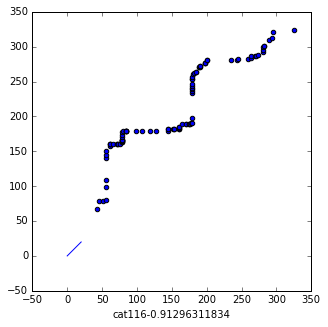

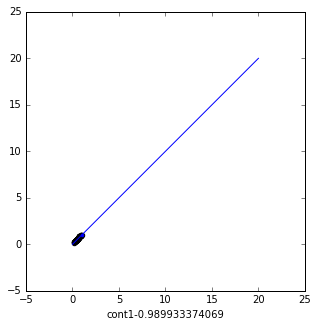

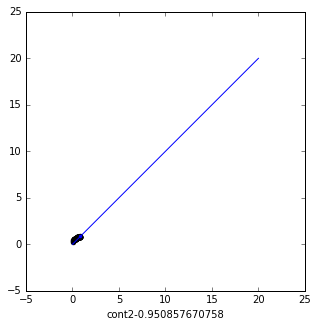

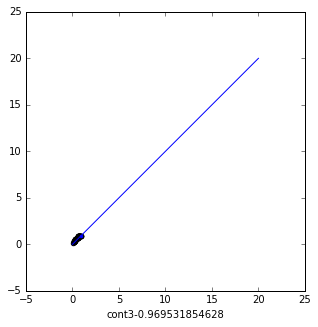

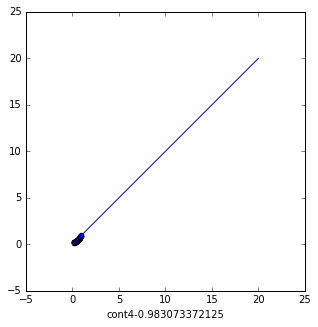

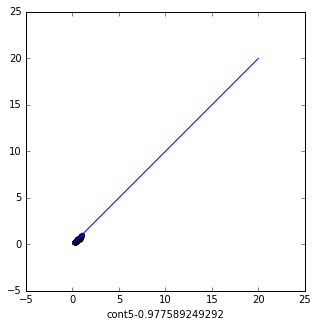

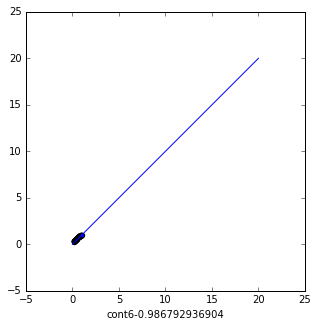

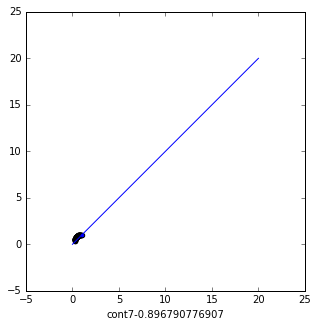

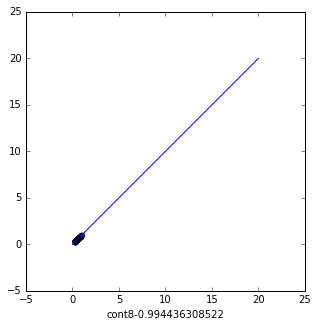

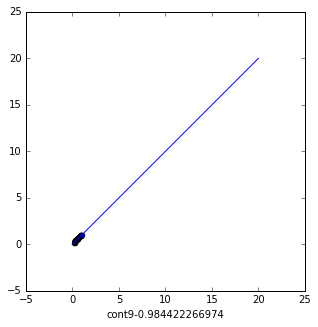

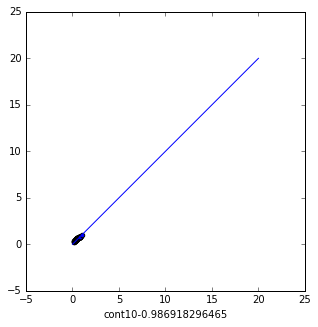

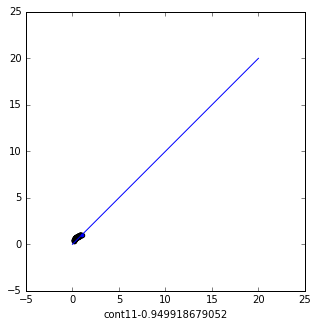

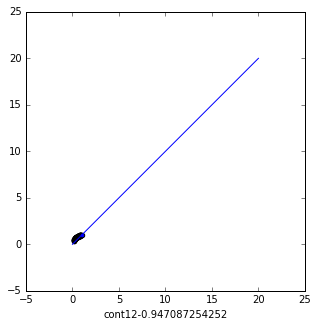

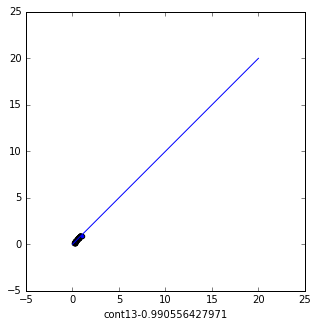

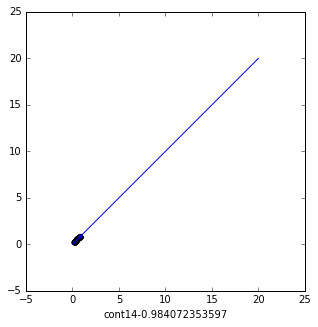

In [32]:
# Q-Q plots for each feature: small vs large
q_ticks = [k/100.0 for k in range(1,101)]
ind_features = []
rest_features = []
for col in features:
    plt.figure(figsize=(5,5))
    plt.subplot(1,1,1)
    plt.scatter(train_s[col].quantile(q=q_ticks),train_l[col].quantile(q=q_ticks))
    plt.plot([0,20],[0,20])
    r_corr = pearsonr(train_s[col].quantile(q=q_ticks),train_l[col].quantile(q=q_ticks))
    plt.xlabel(col+'-'+str(r_corr[0]))
    if r_corr[0]<0.8:
        ind_features.append(col)
    else:
        rest_features.append(col)

In [33]:
print(ind_features)
print(rest_features)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17', 'cat19', 'cat23', 'cat24', 'cat25', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33', 'cat36', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat45', 'cat46', 'cat47', 'cat52', 'cat57', 'cat59', 'cat65', 'cat71', 'cat72', 'cat73', 'cat75', 'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat85', 'cat87', 'cat89', 'cat90', 'cat94', 'cat95', 'cat96', 'cat99', 'cat109']
['cat15', 'cat18', 'cat20', 'cat21', 'cat22', 'cat26', 'cat27', 'cat31', 'cat34', 'cat35', 'cat37', 'cat44', 'cat48', 'cat49', 'cat50', 'cat51', 'cat53', 'cat54', 'cat55', 'cat56', 'cat58', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat74', 'cat77', 'cat84', 'cat86', 'cat88', 'cat91', 'cat92', 'cat93', 'cat97', 'cat98', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat110', 'cat11

In [42]:
# features sensitive to [15000,20000] loss
# idx = (train['loss']<20000) & (train['loss']>=15000)
# train_s = train[idx]
# train_l = train[not idx]
# features sensitive to 20000 loss
cutoff = 18000
train_s = train[train['loss']<cutoff]
train_l = train[train['loss']>=cutoff]

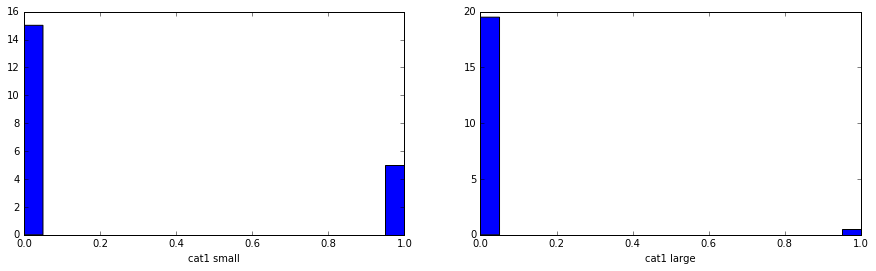

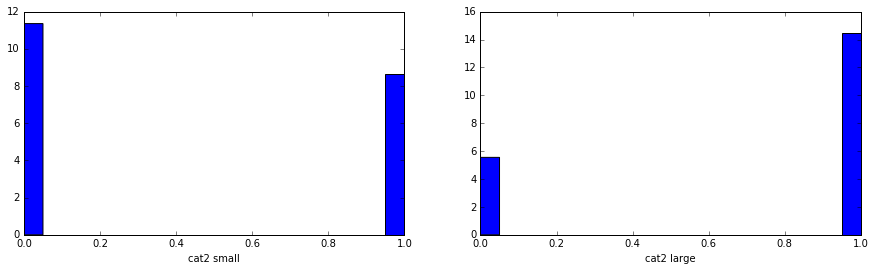

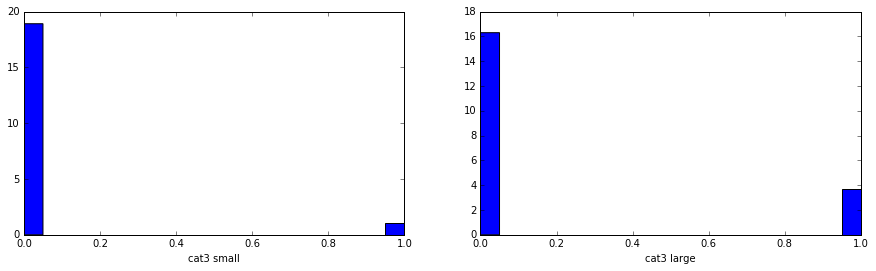

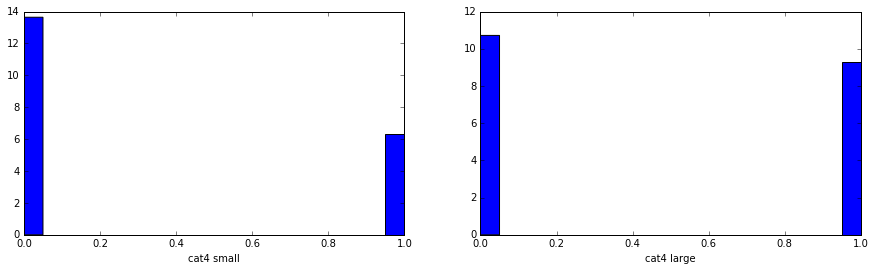

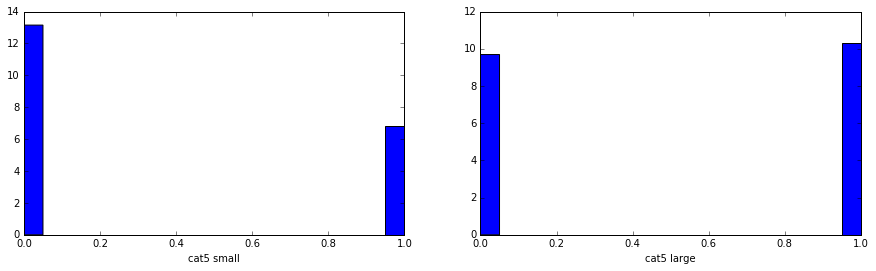

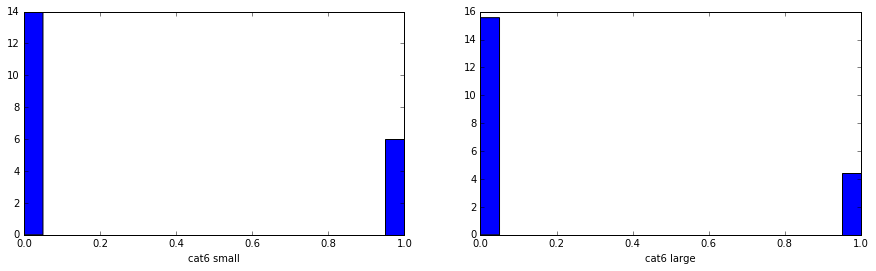

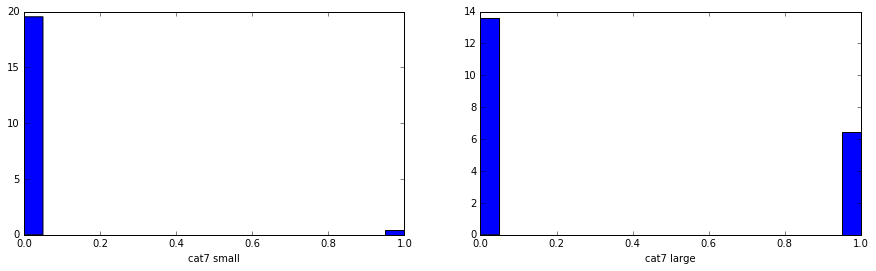

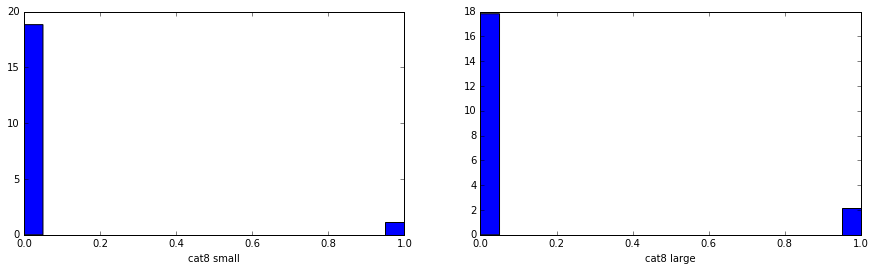

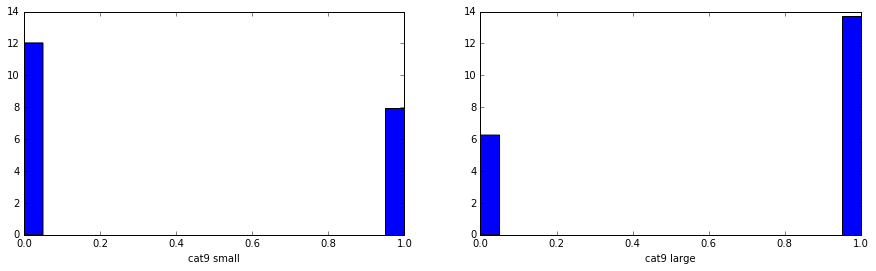

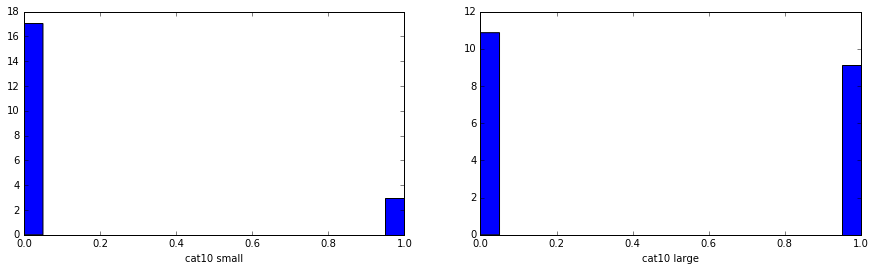

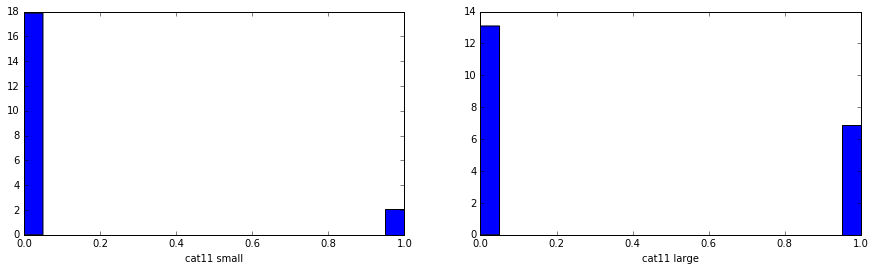

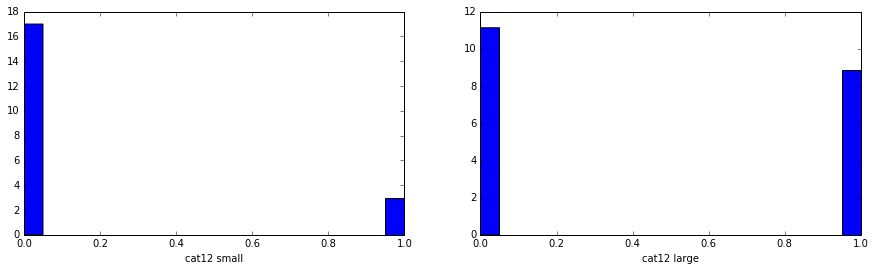

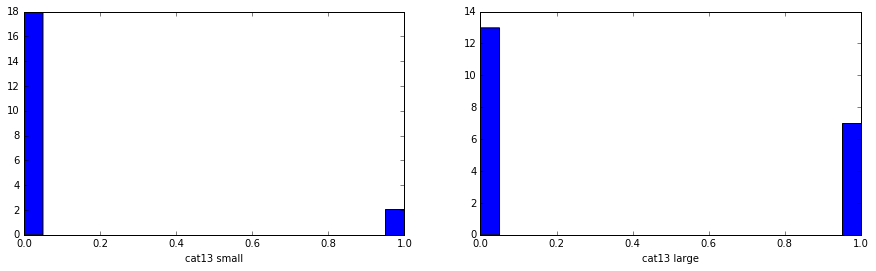

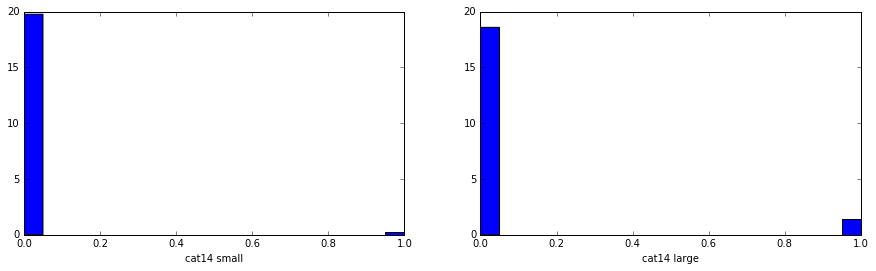

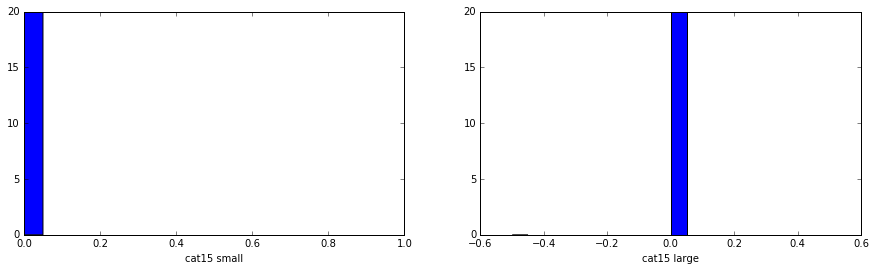

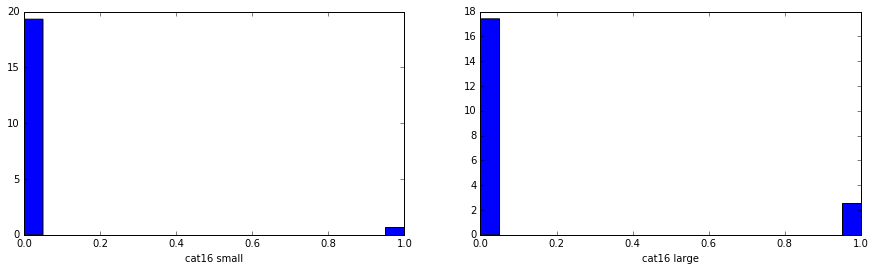

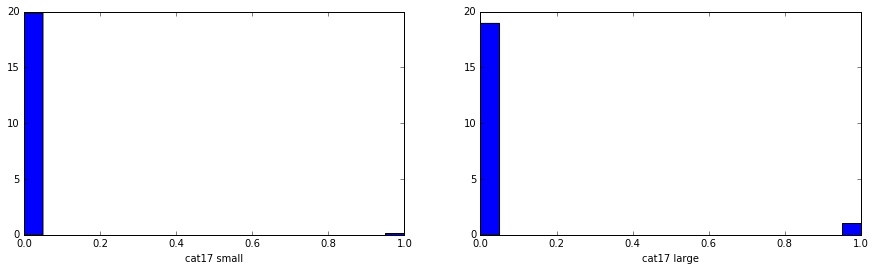

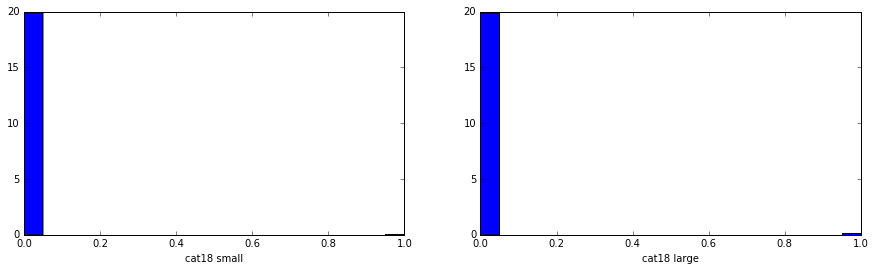

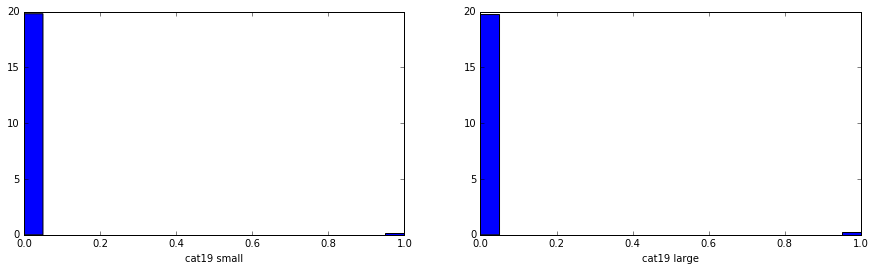

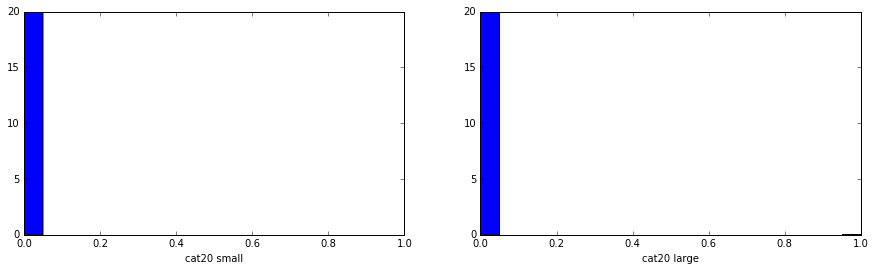

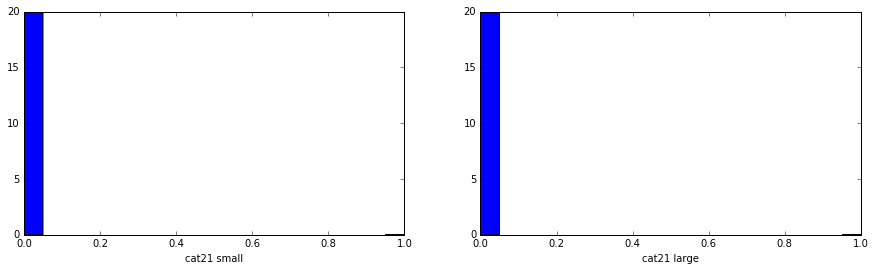

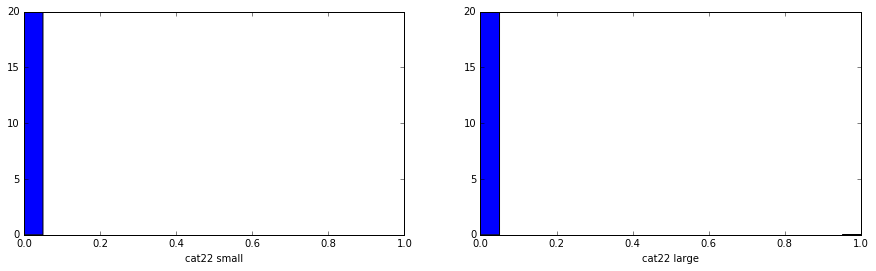

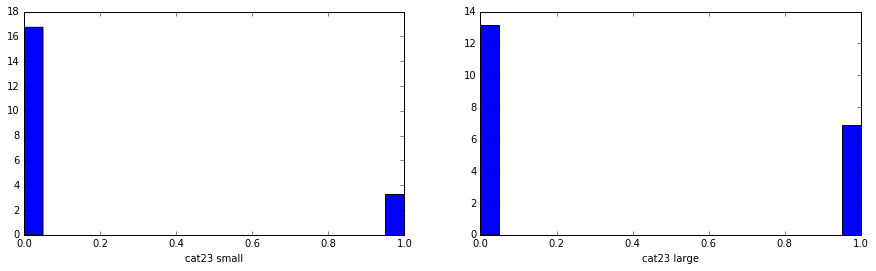

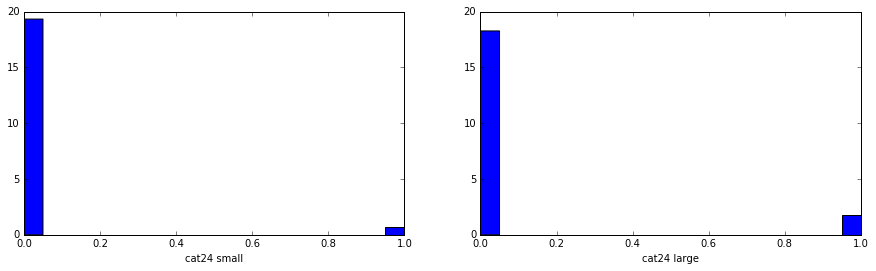

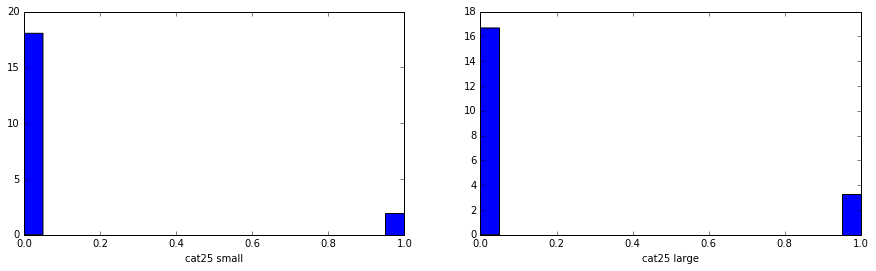

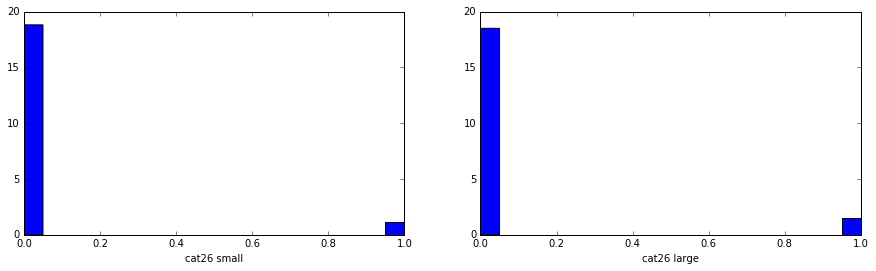

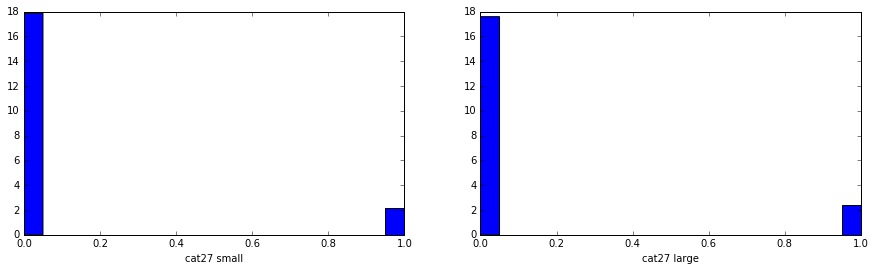

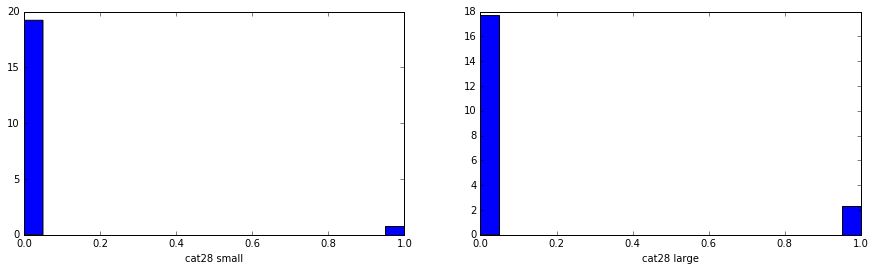

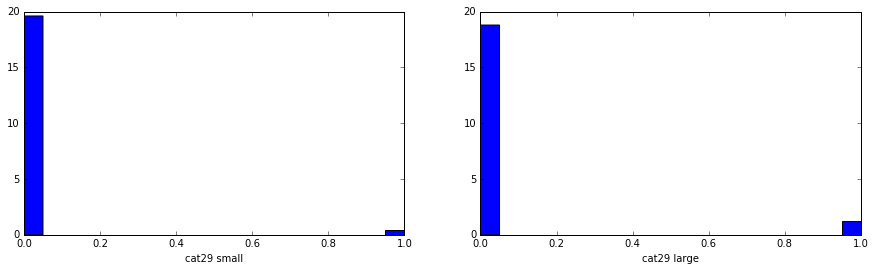

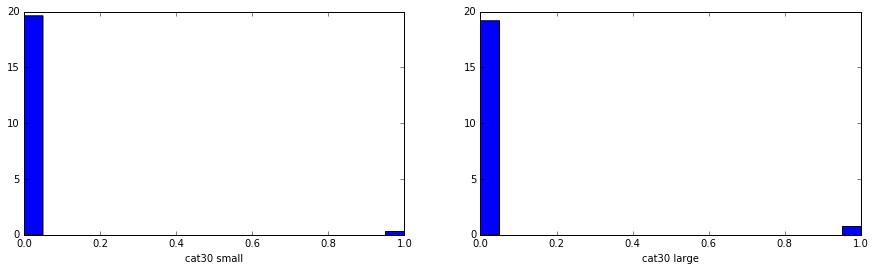

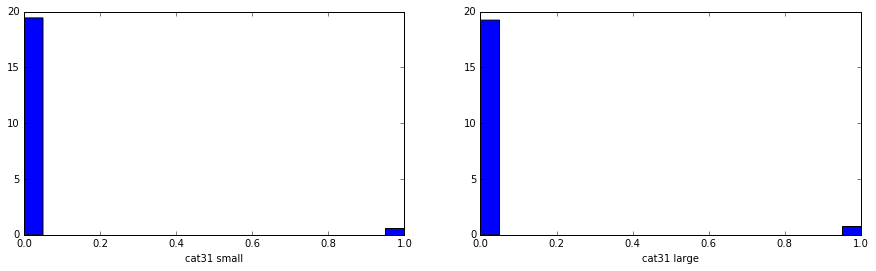

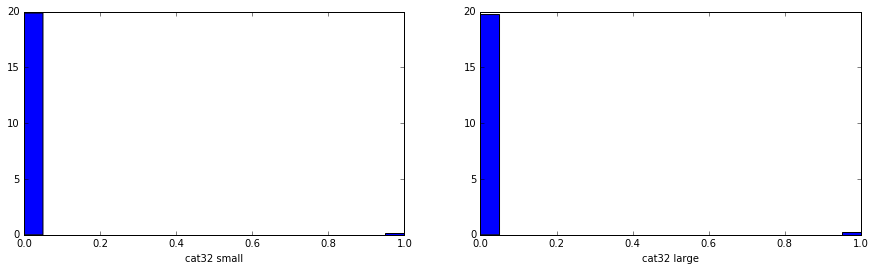

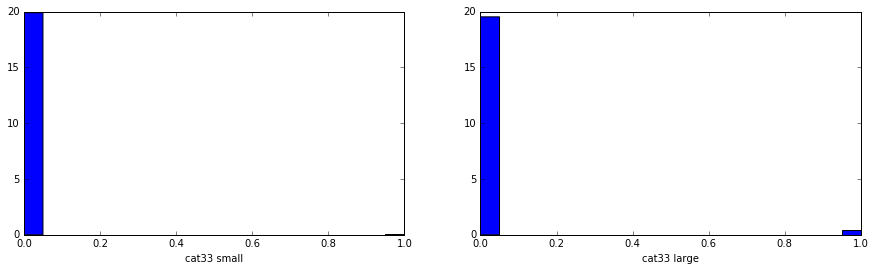

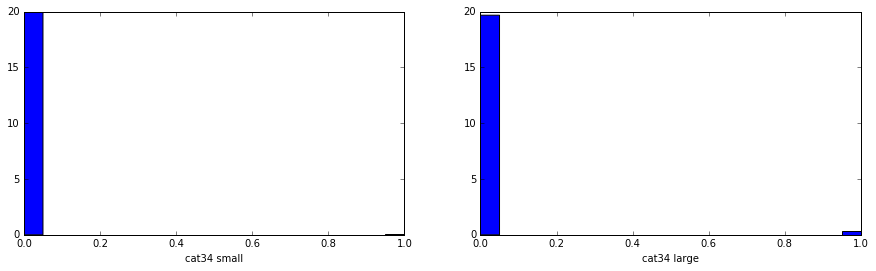

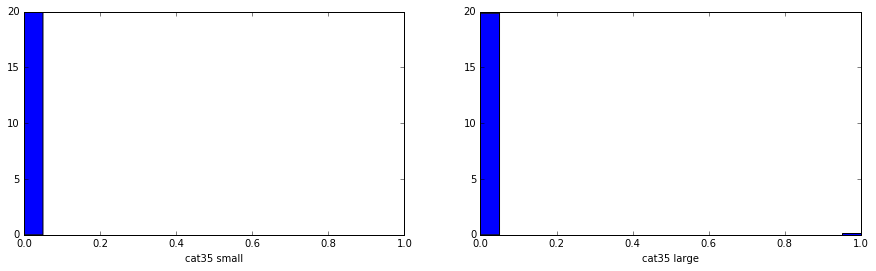

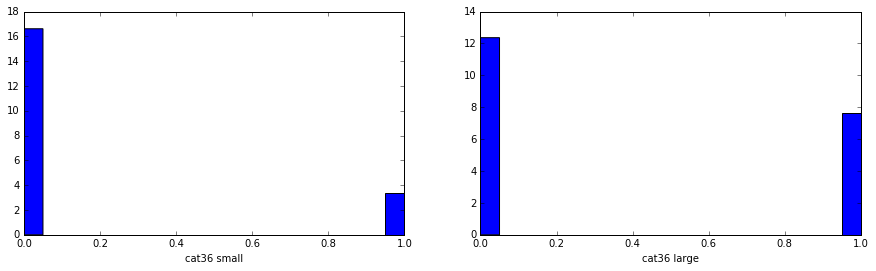

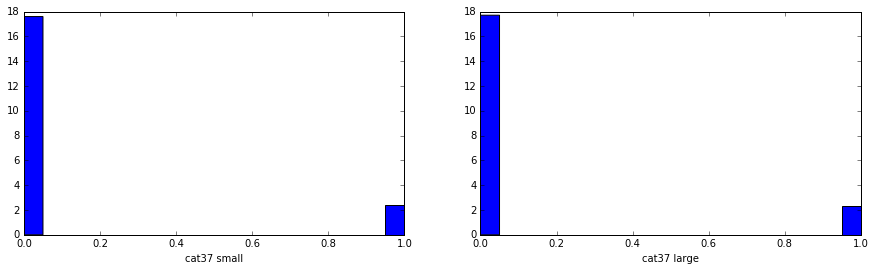

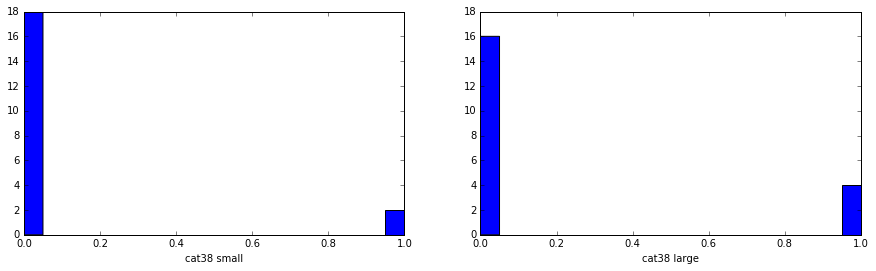

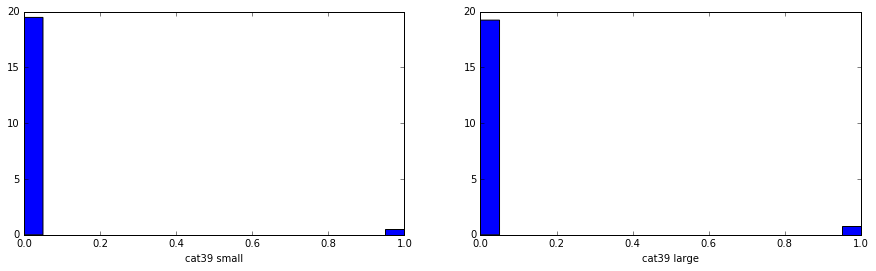

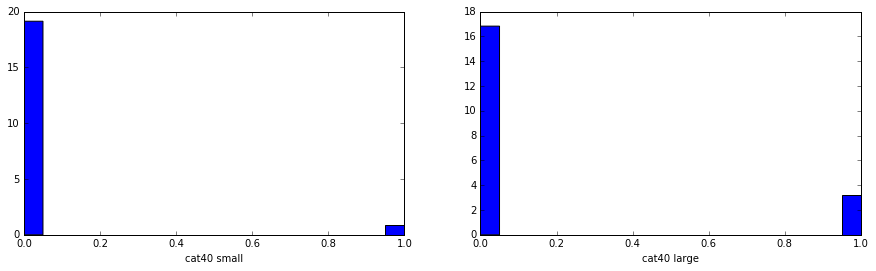

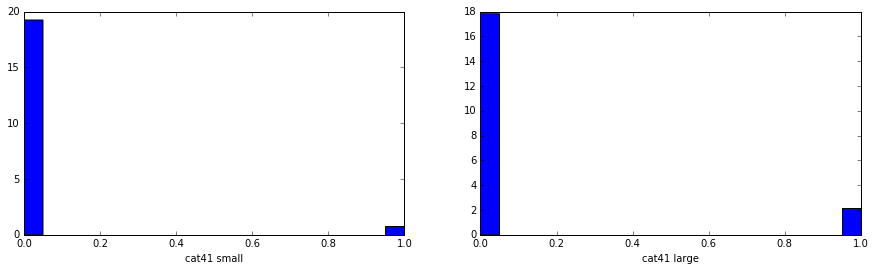

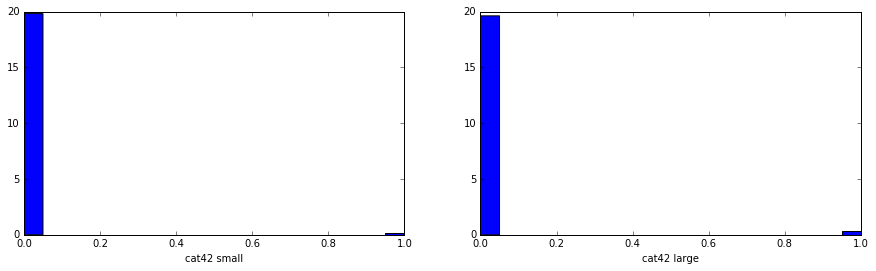

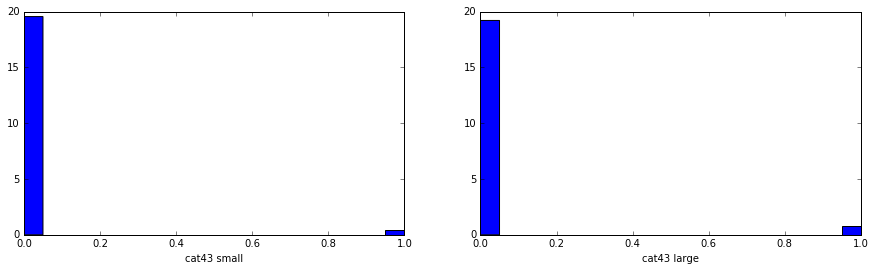

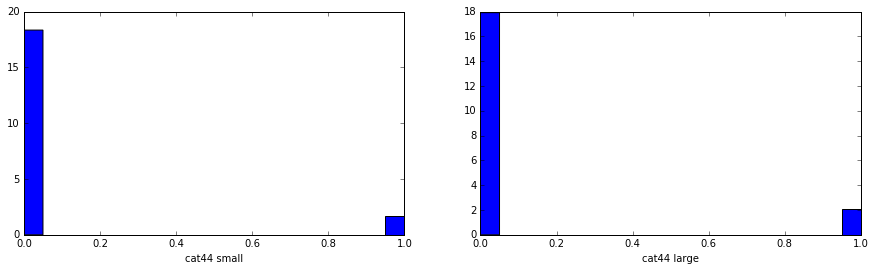

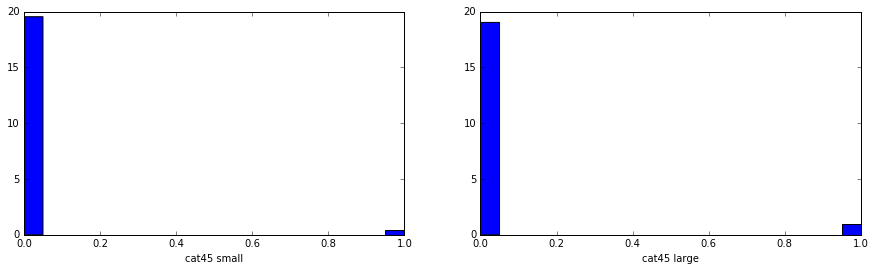

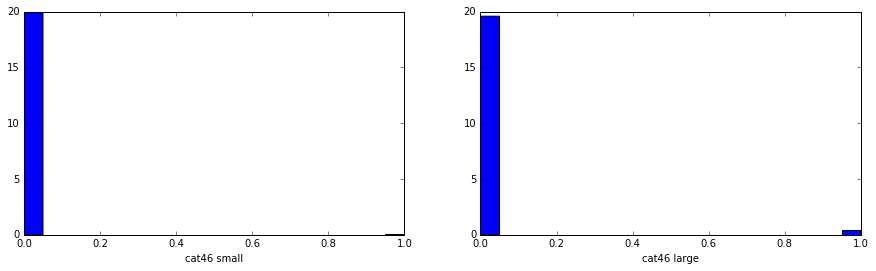

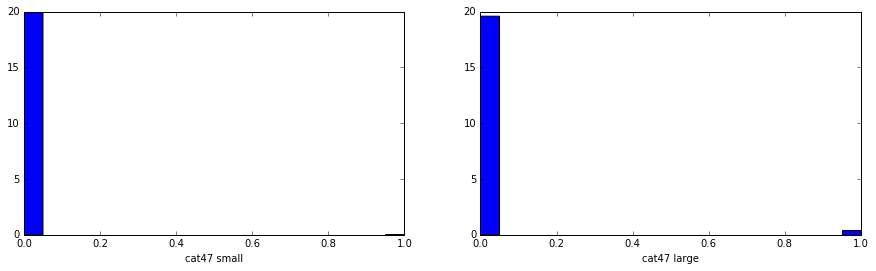

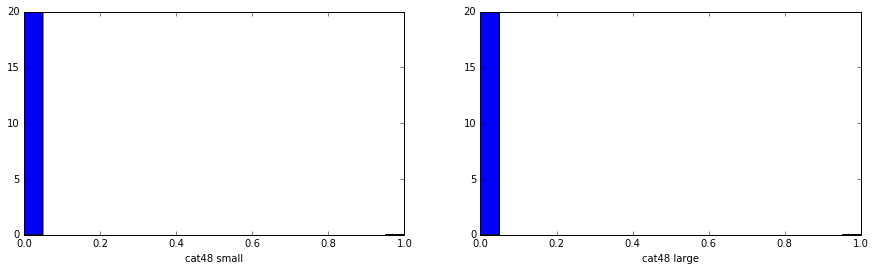

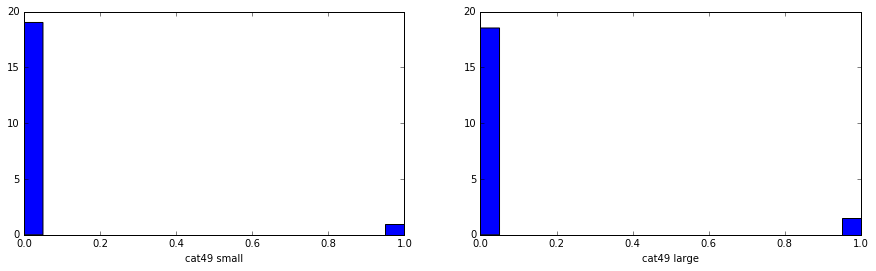

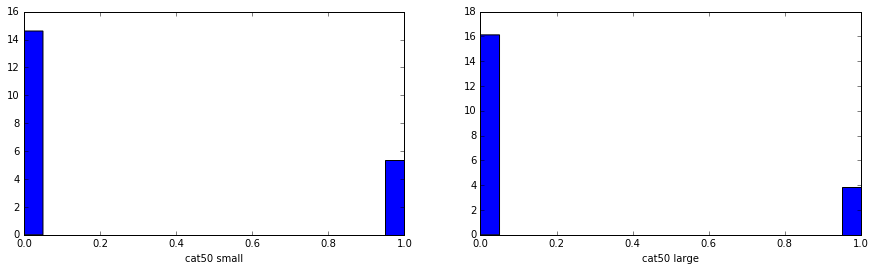

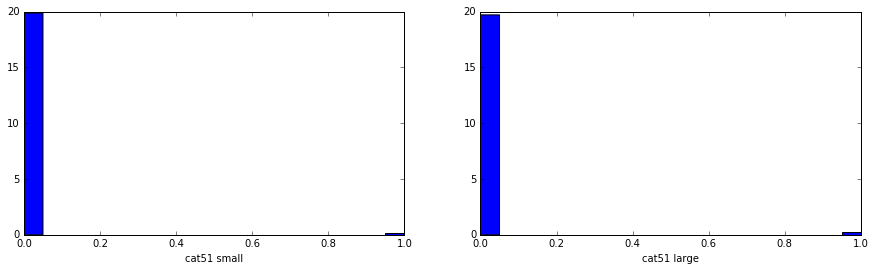

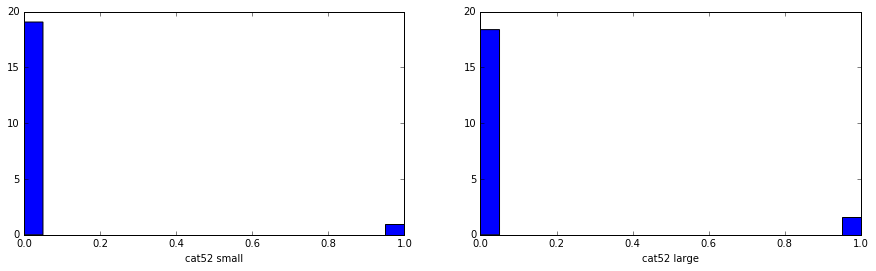

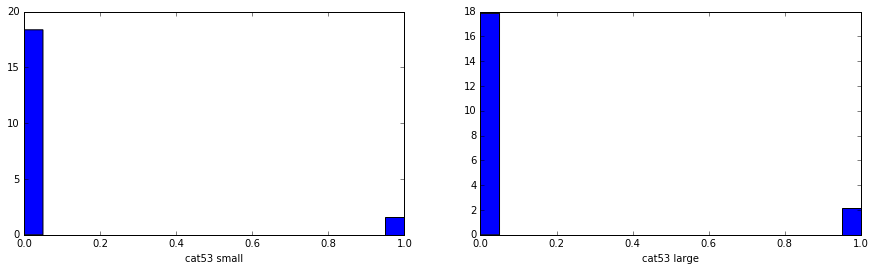

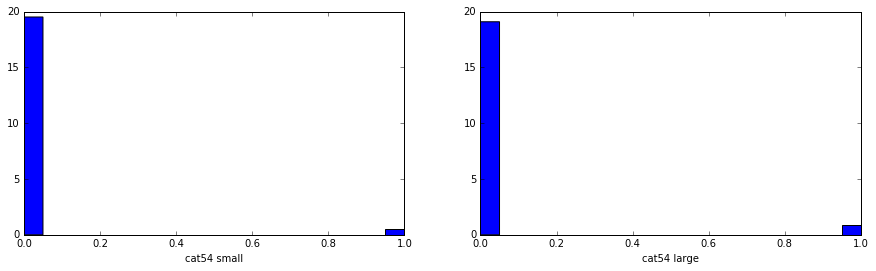

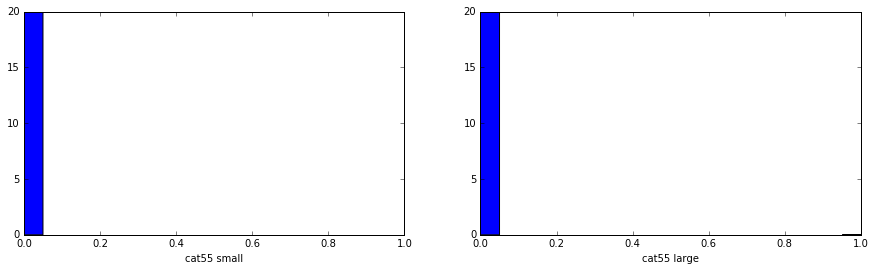

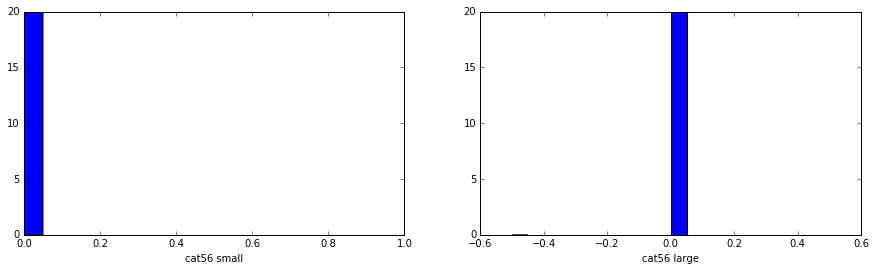

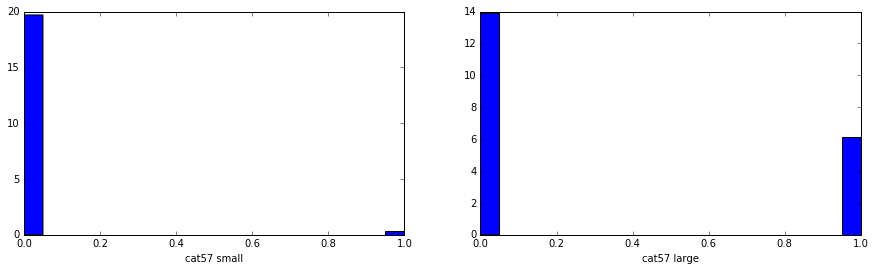

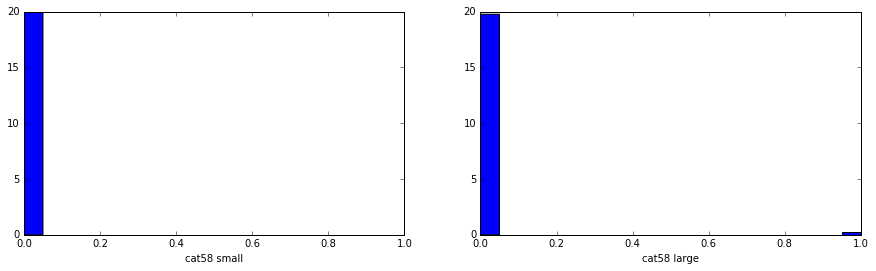

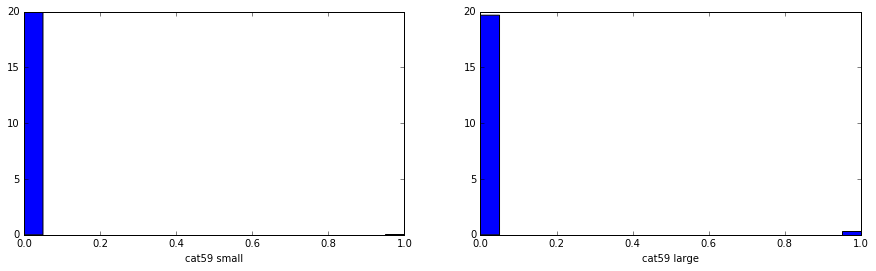

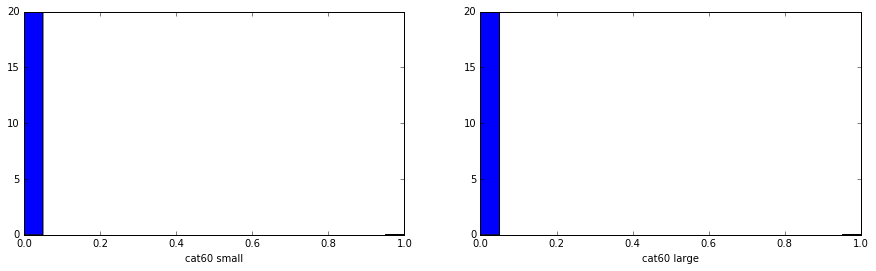

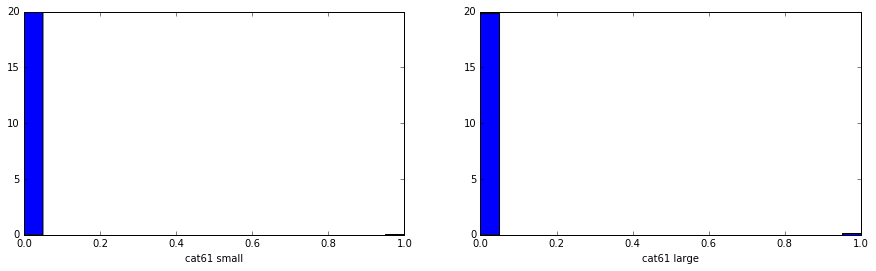

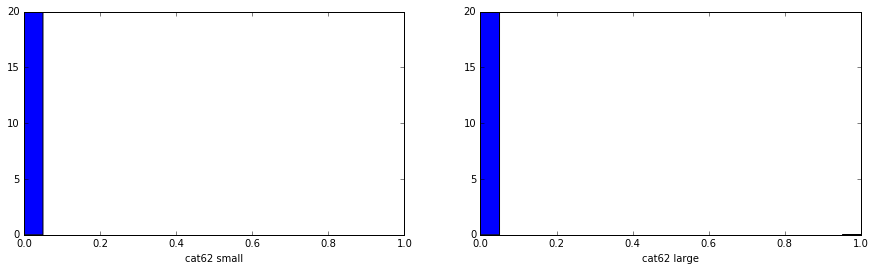

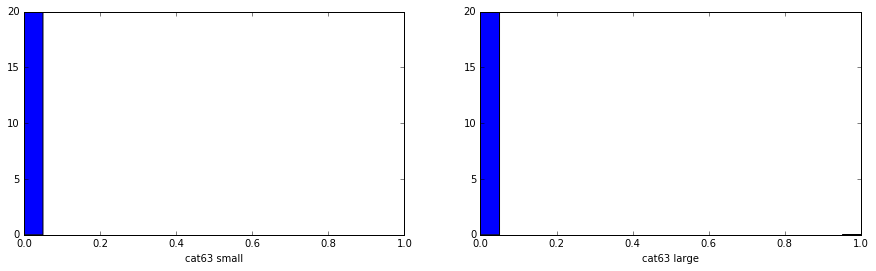

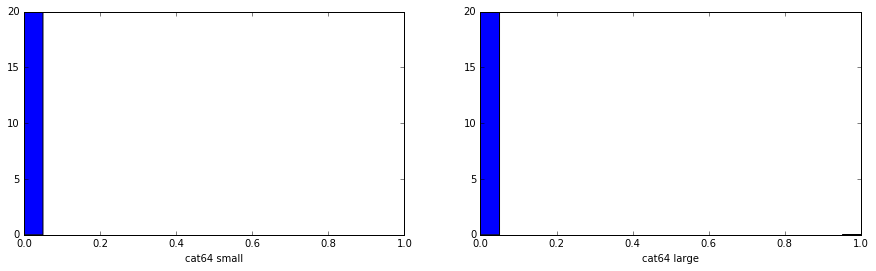

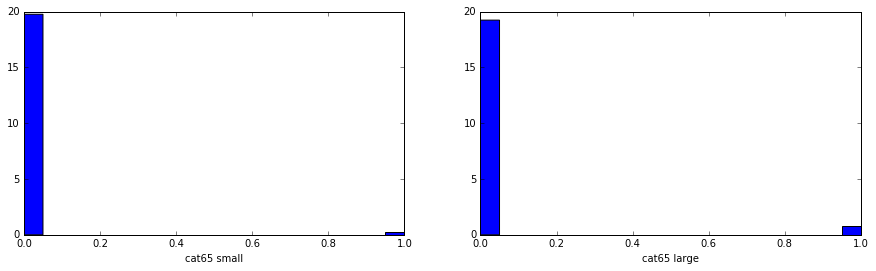

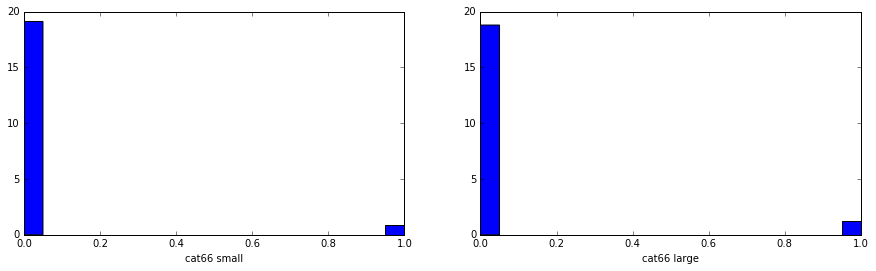

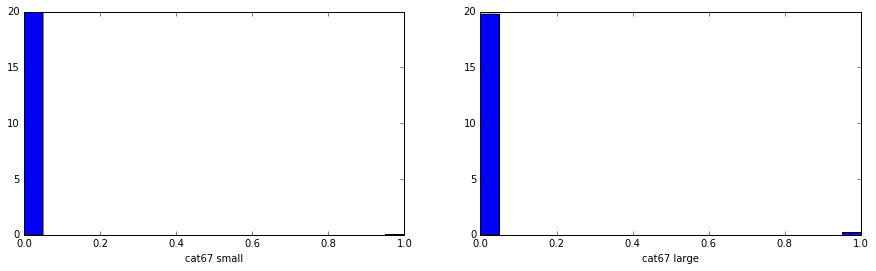

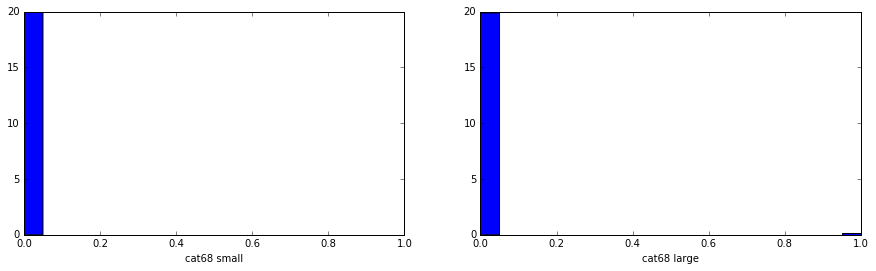

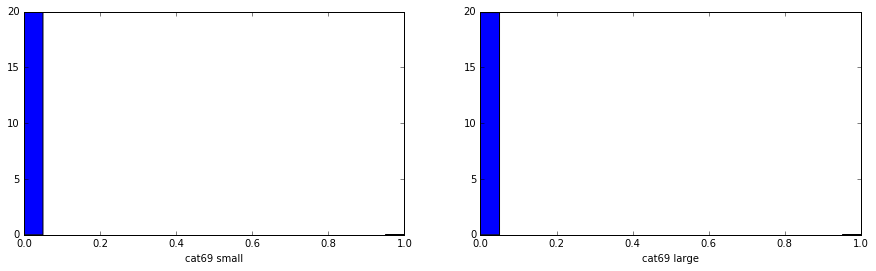

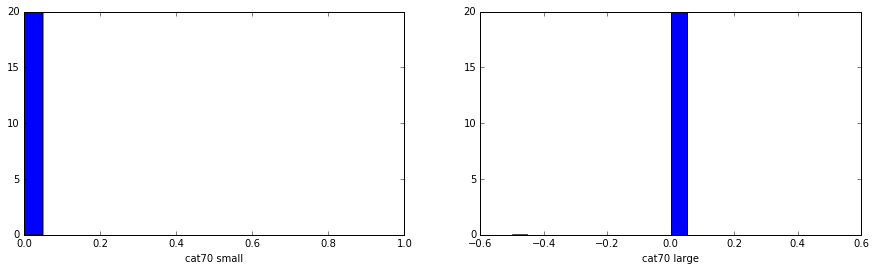

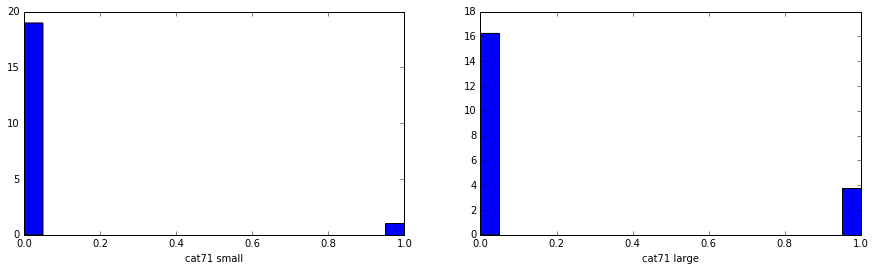

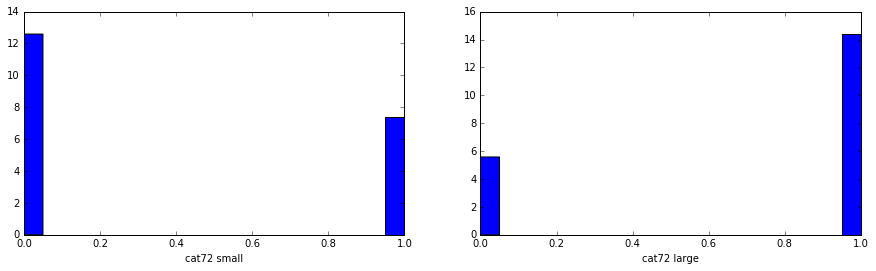

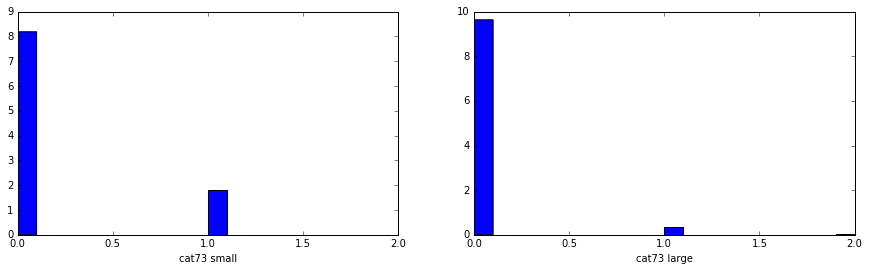

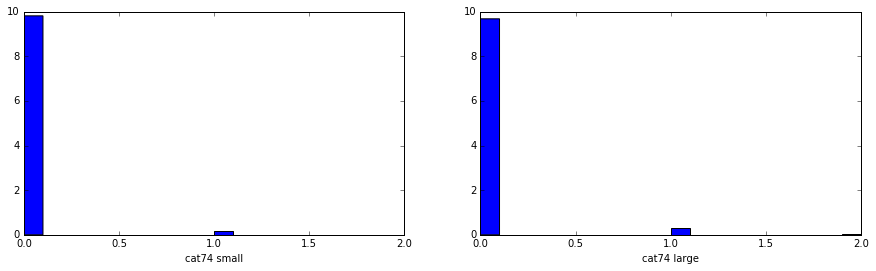

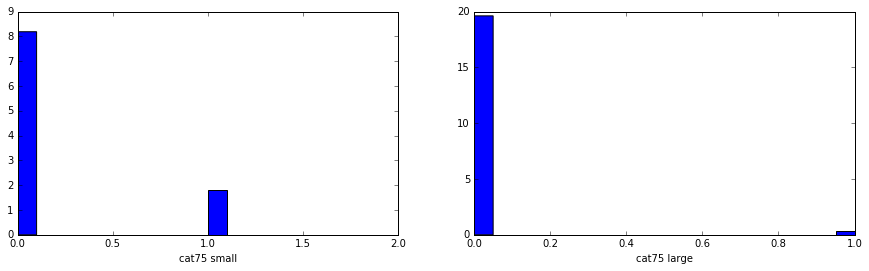

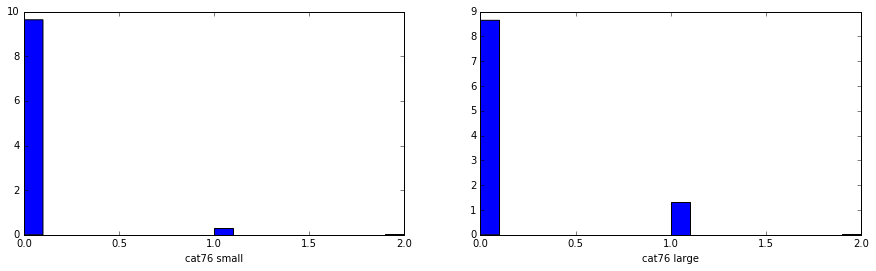

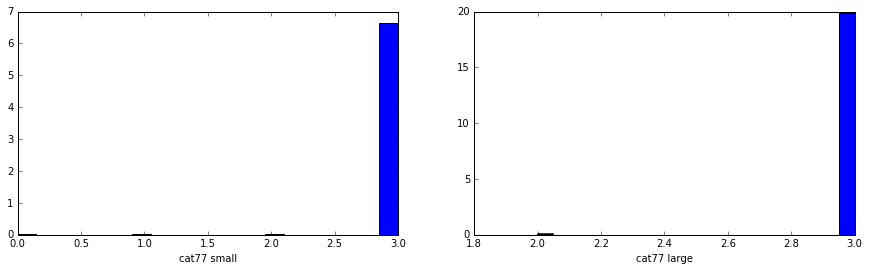

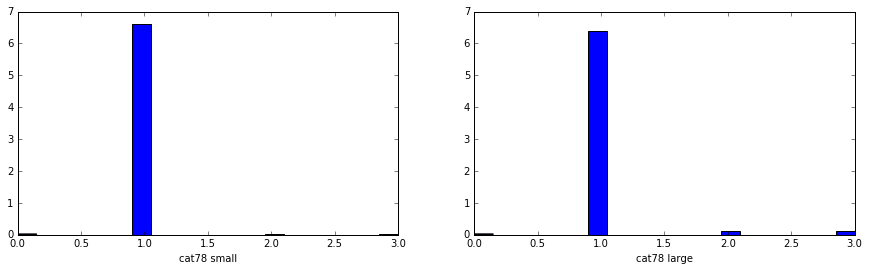

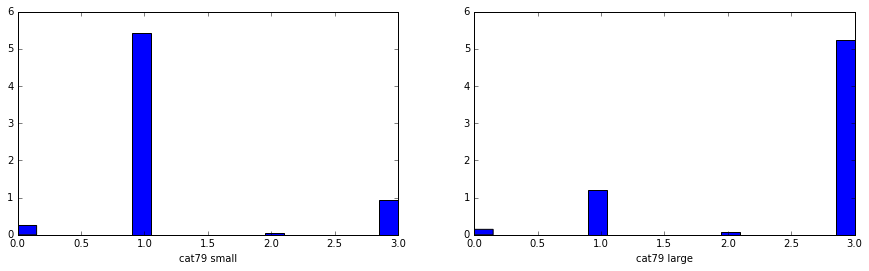

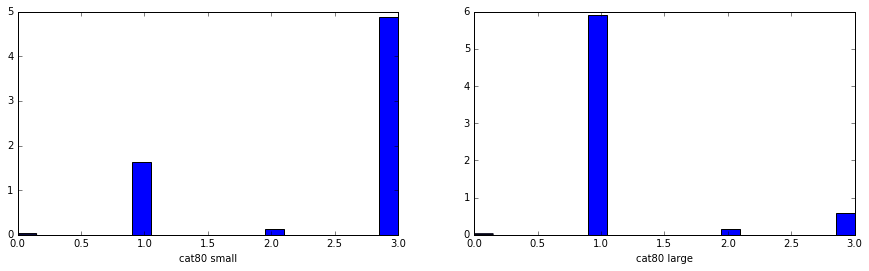

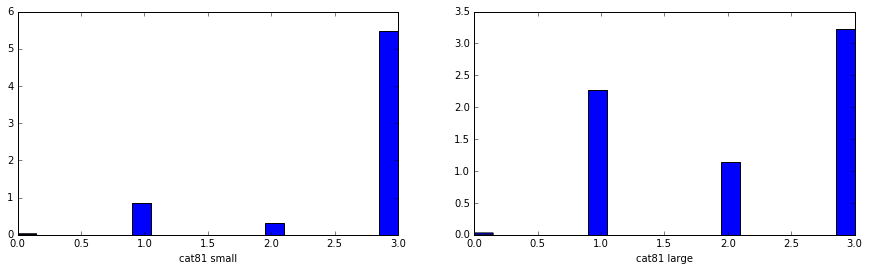

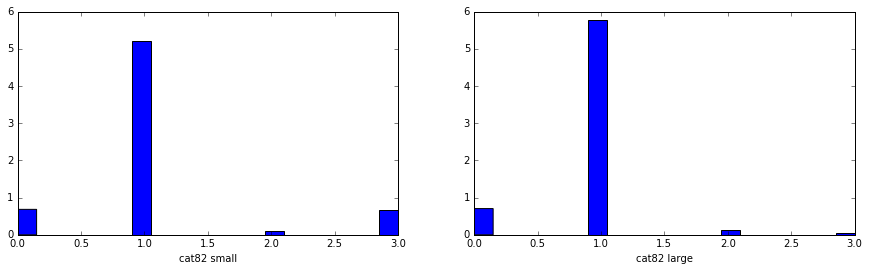

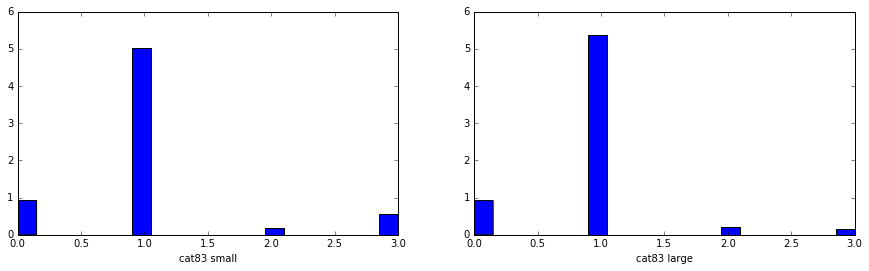

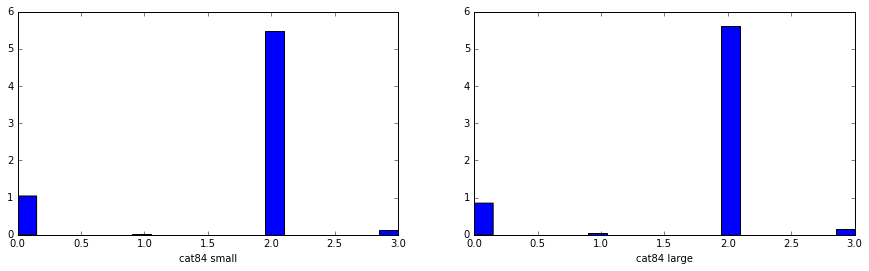

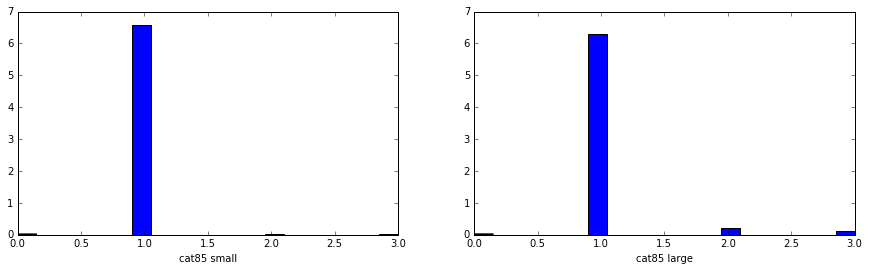

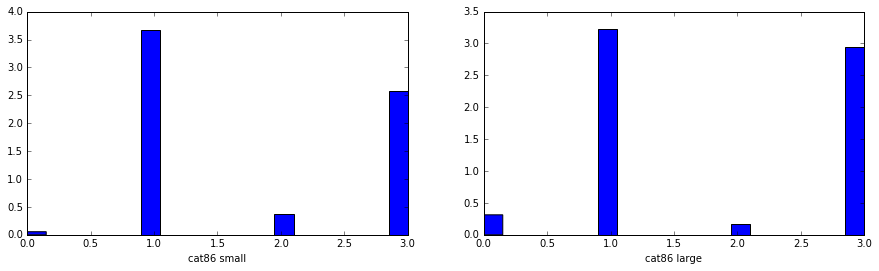

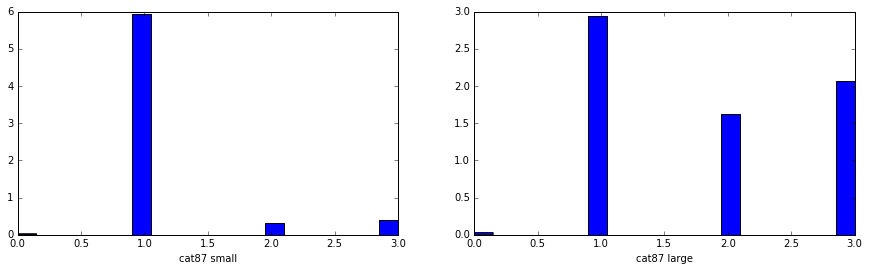

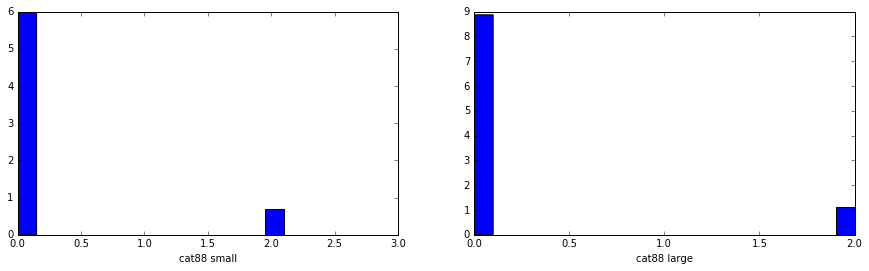

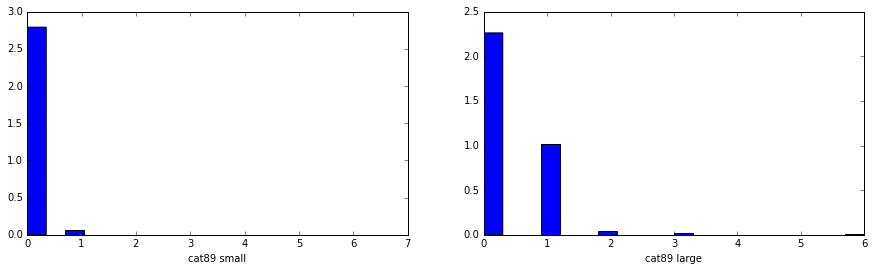

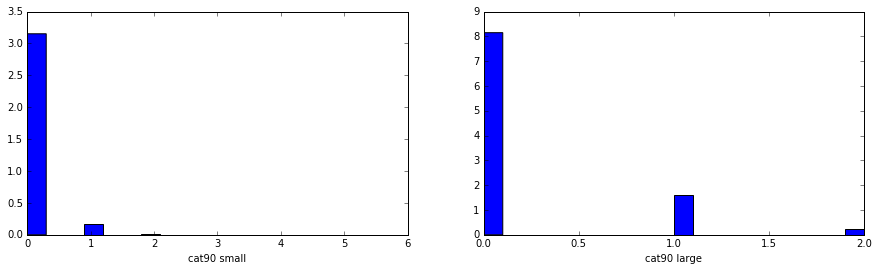

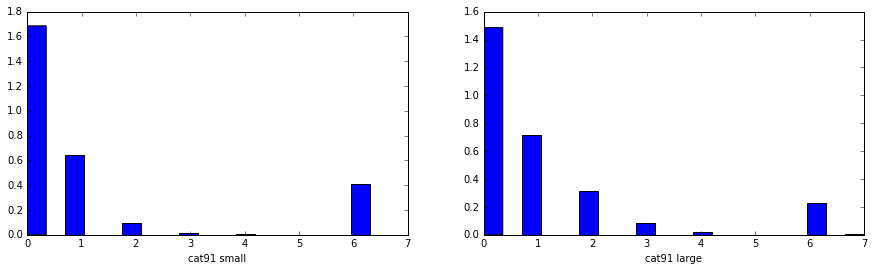

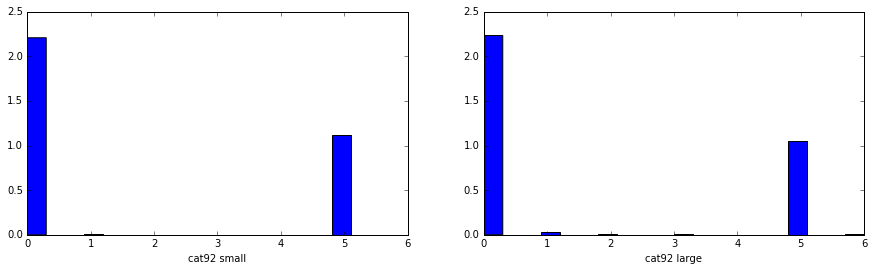

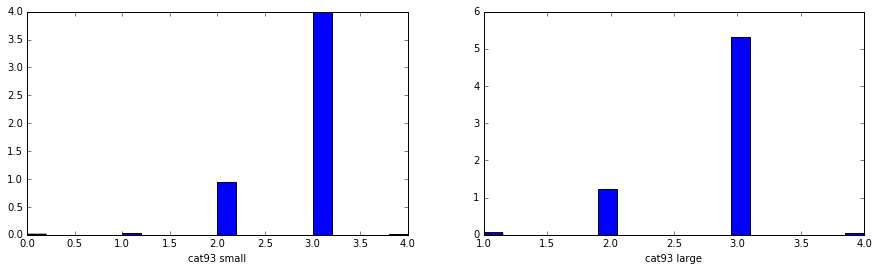

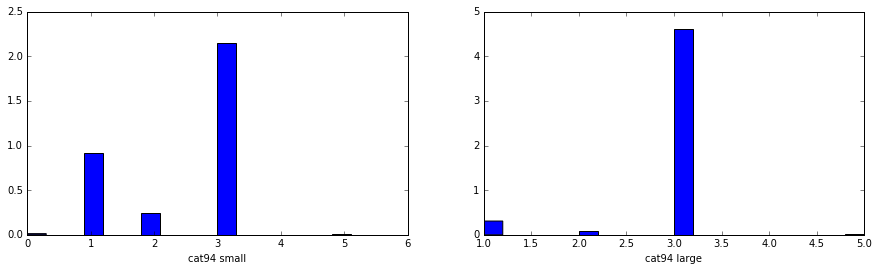

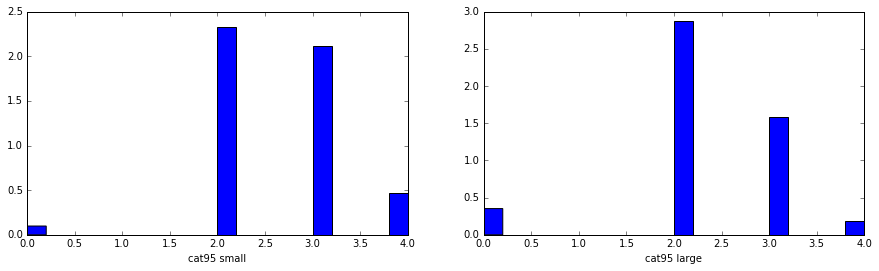

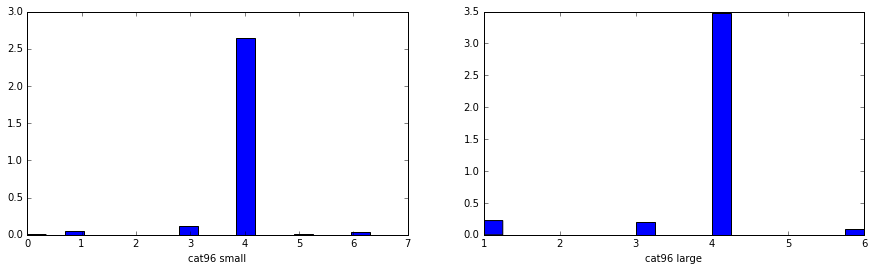

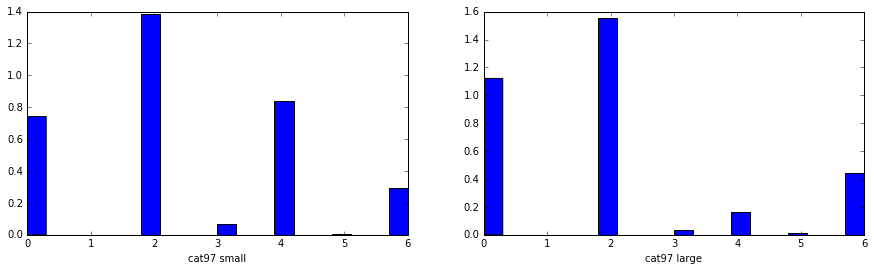

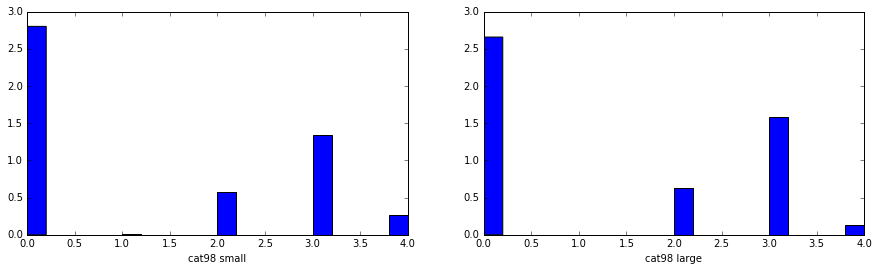

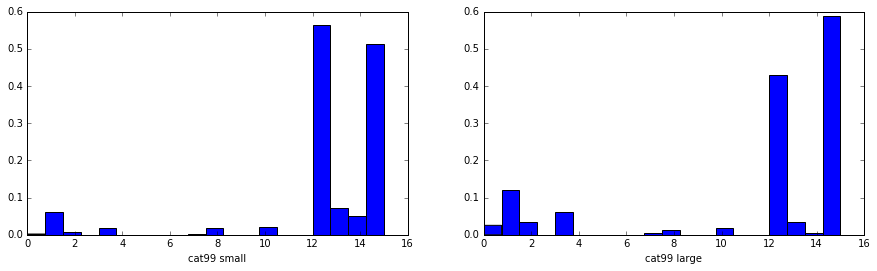

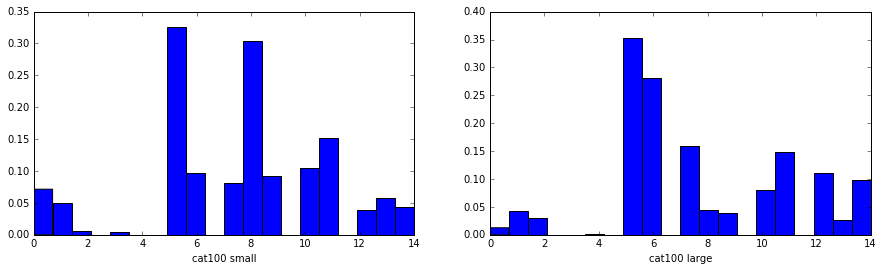

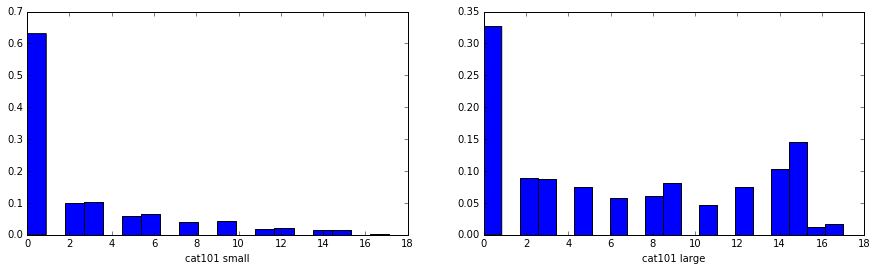

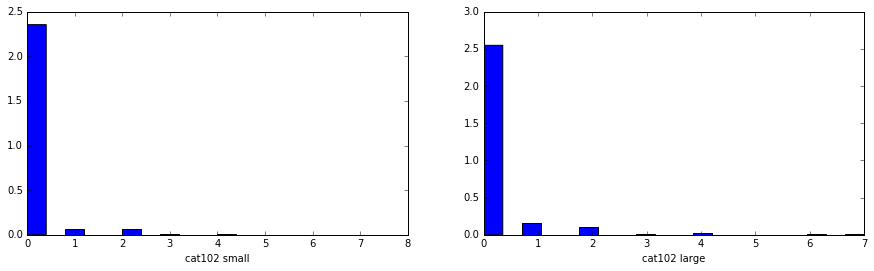

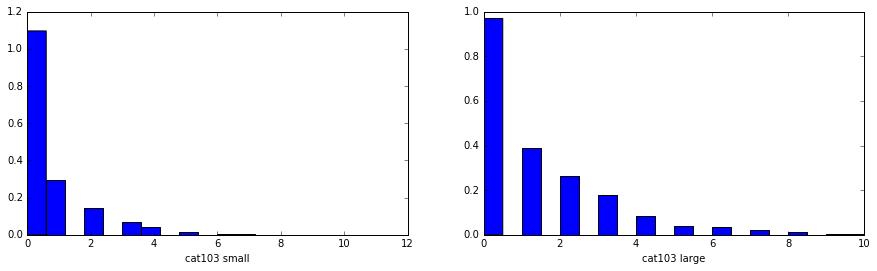

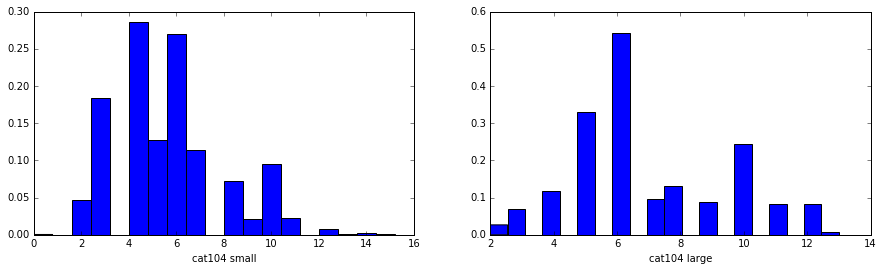

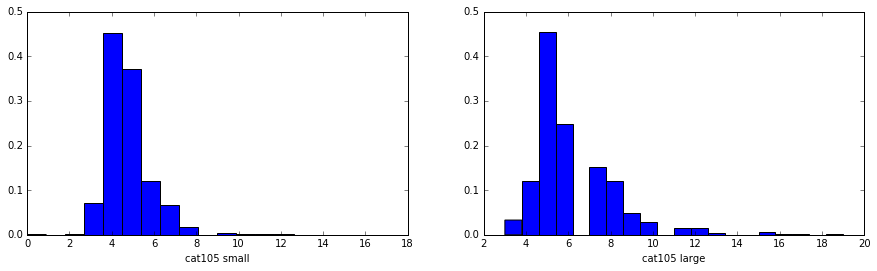

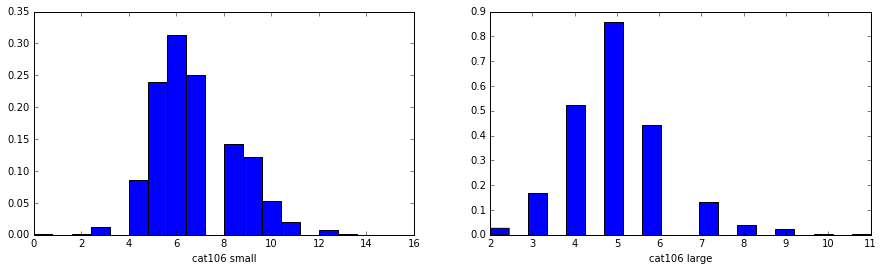

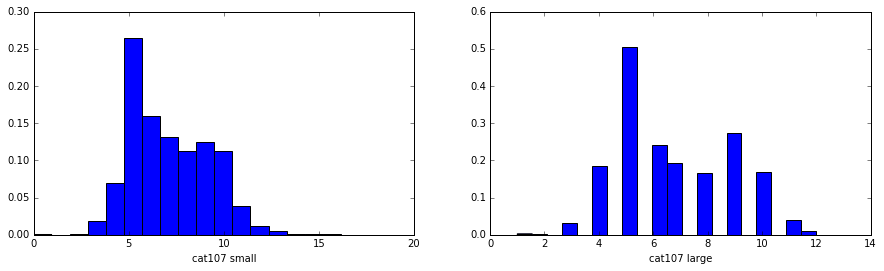

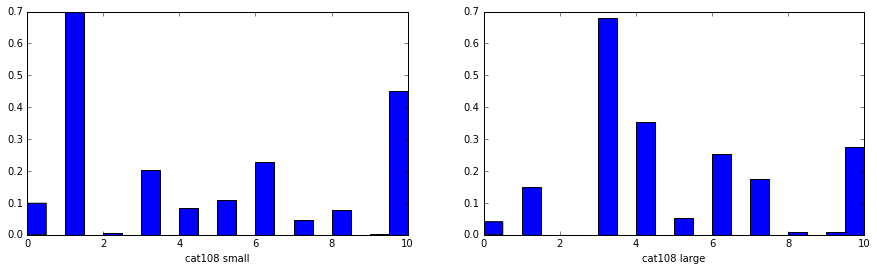

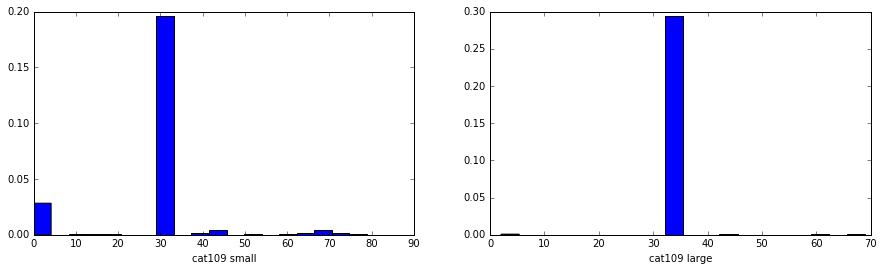

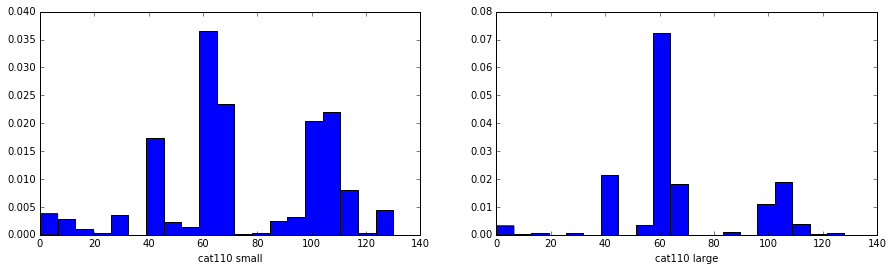

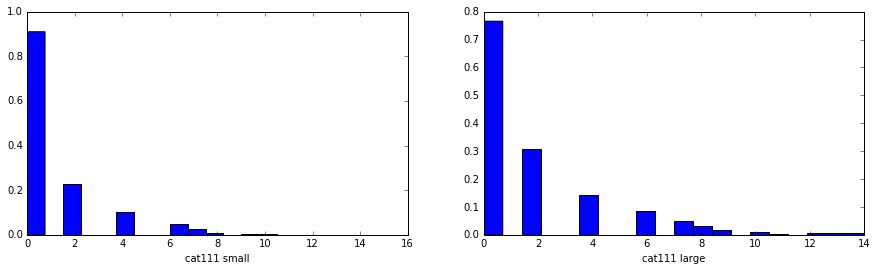

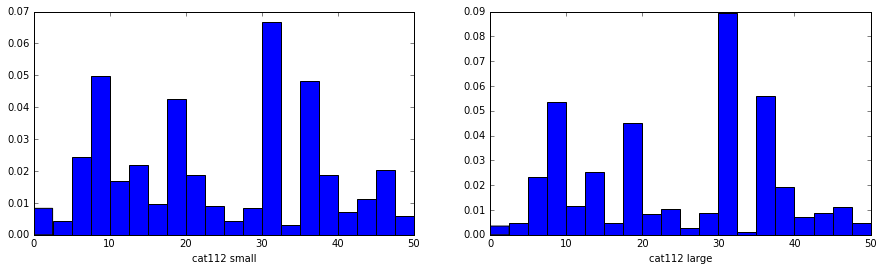

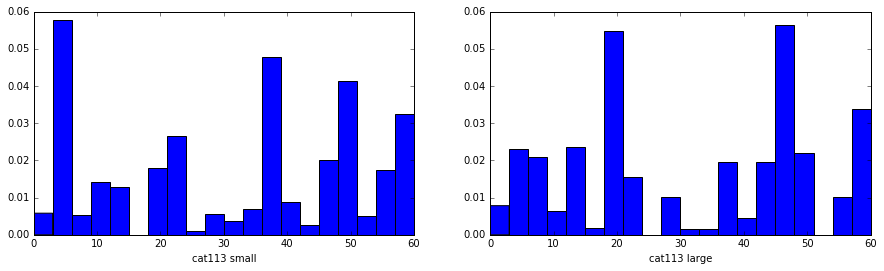

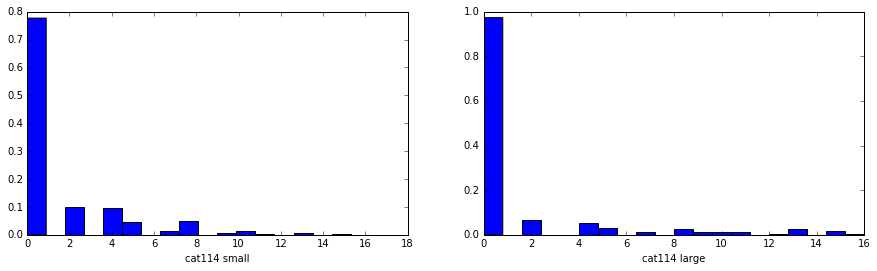

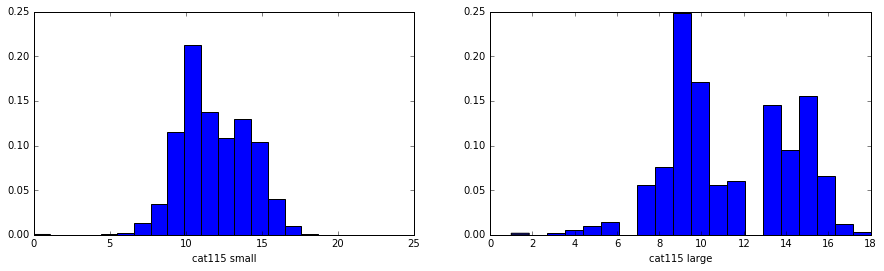

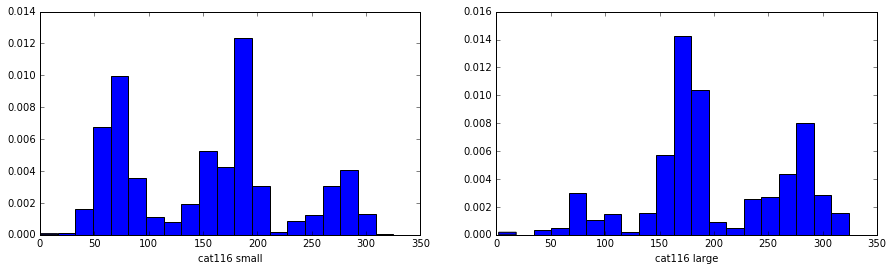

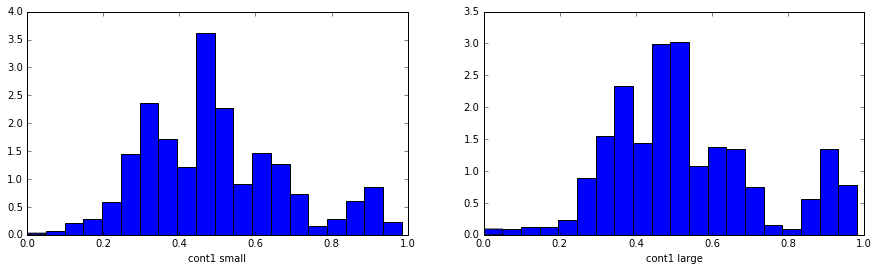

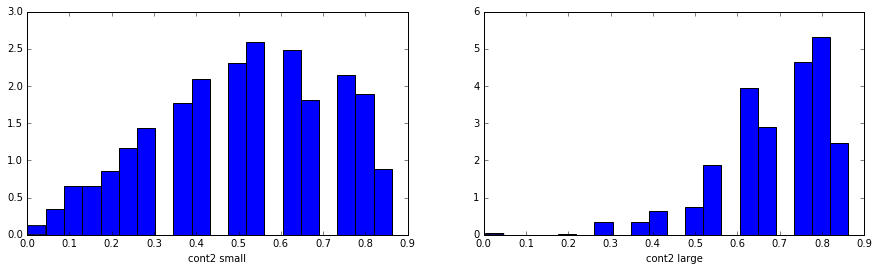

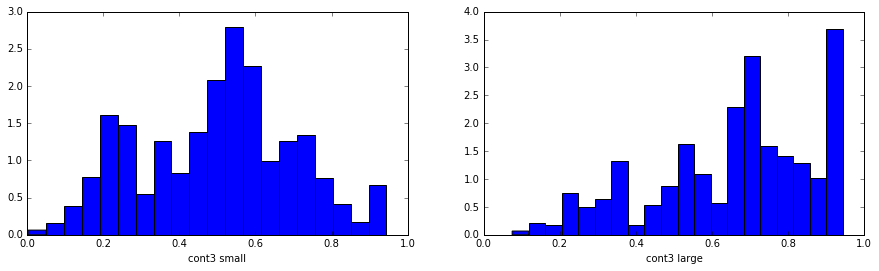

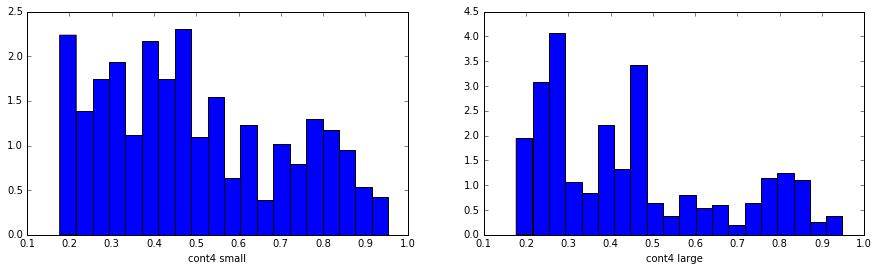

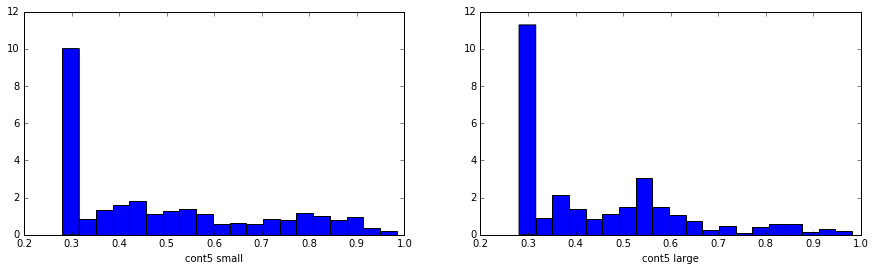

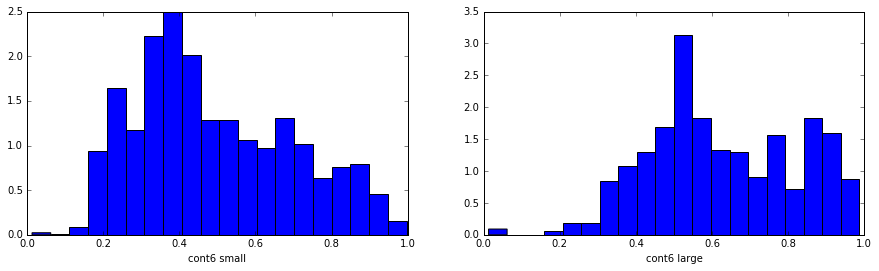

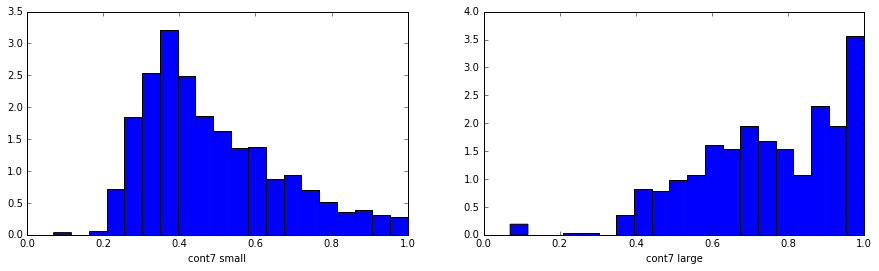

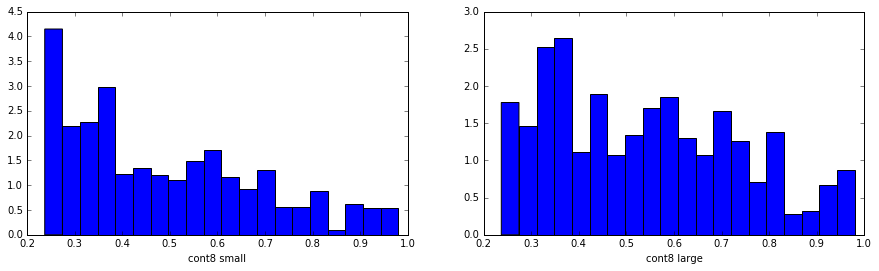

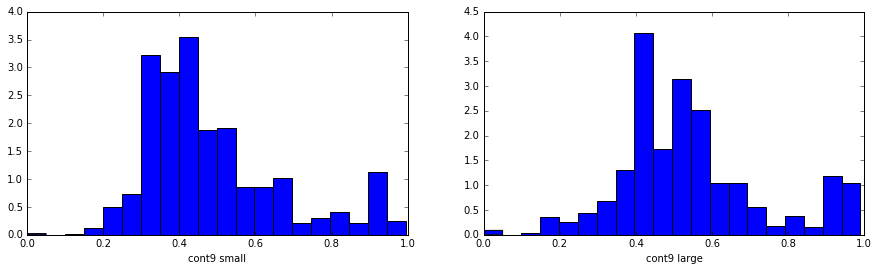

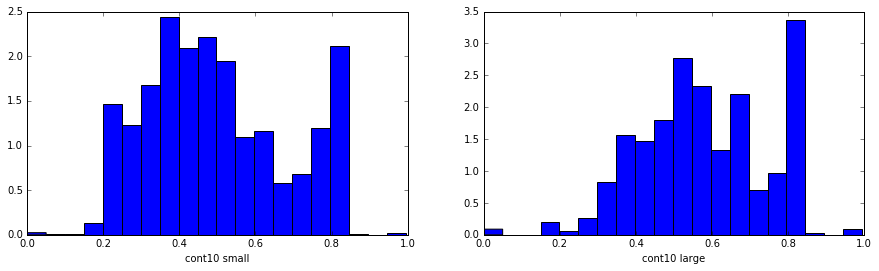

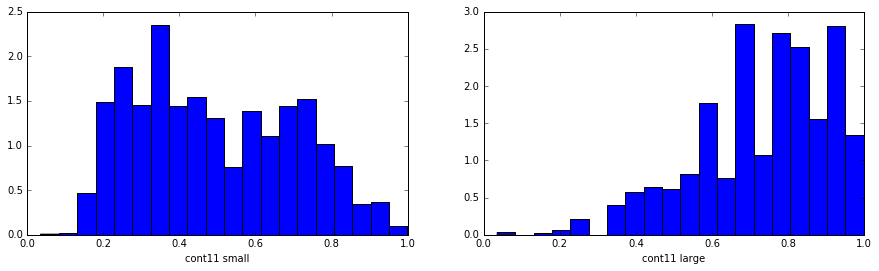

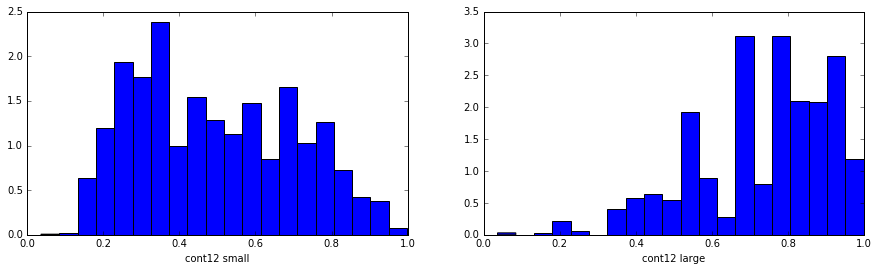

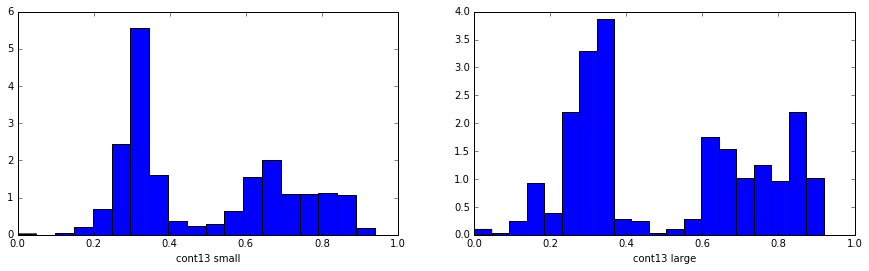

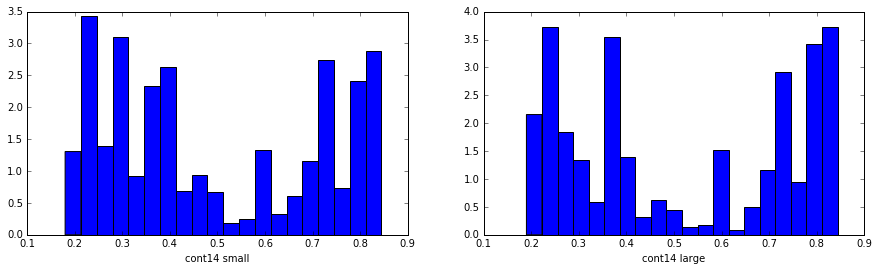

In [43]:
for col in features:
    plt.figure(figsize=(15,4));
    plt.subplot(1,2,1)
    plt.hist(train_s[col],bins=20,normed=True)
    plt.xlabel(col+' '+'small')
    plt.subplot(1,2,2)
    plt.hist(train_l[col],bins=20,normed=True)
    plt.xlabel(col+' '+'large')
# cont12, cont11, cont7

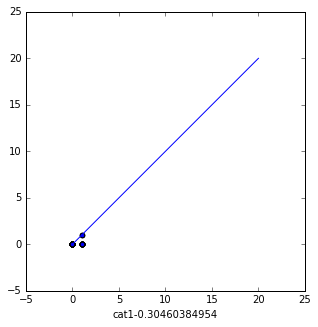

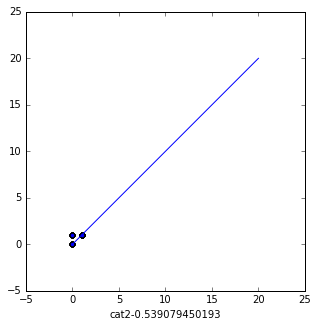

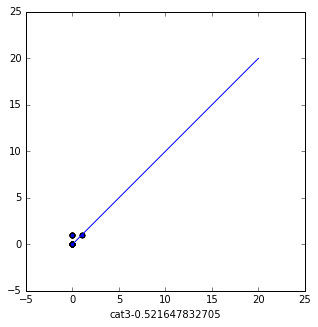

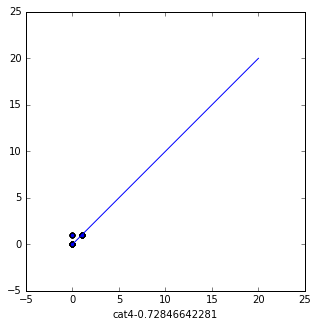

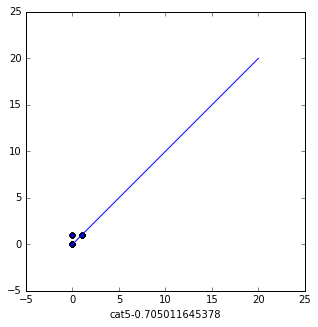

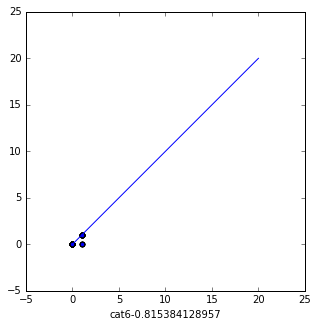

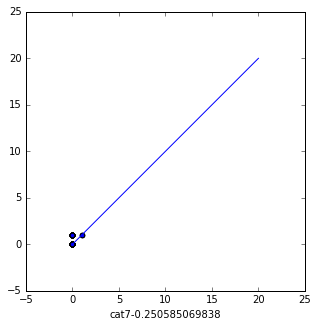

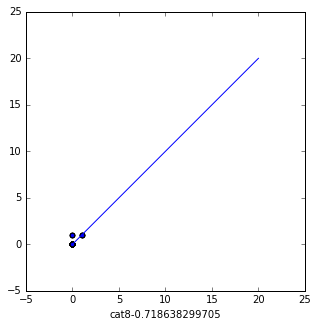

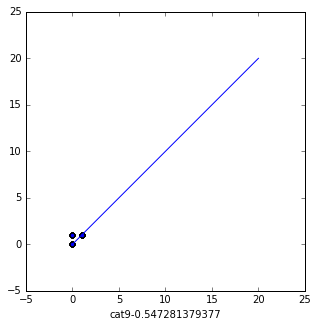

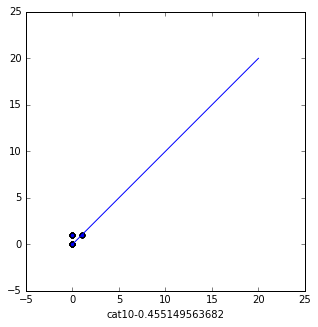

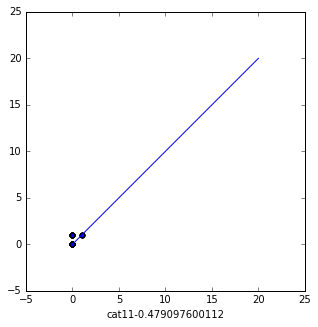

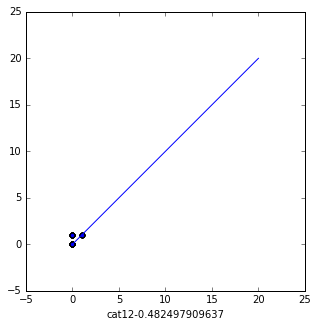

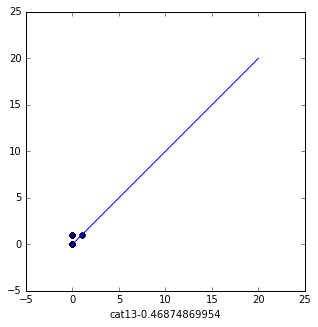

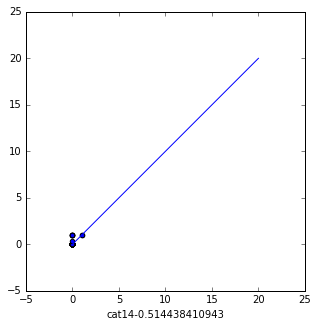

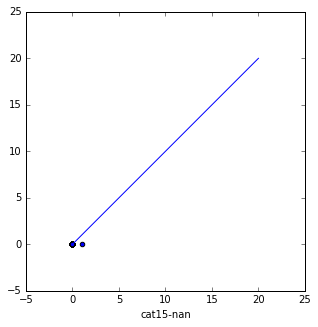

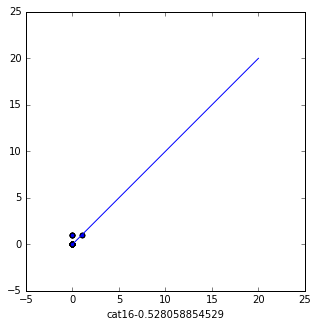

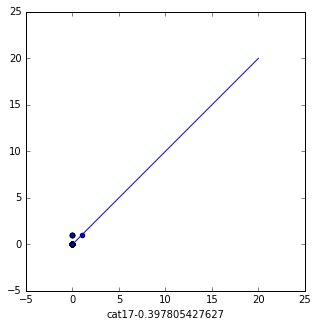

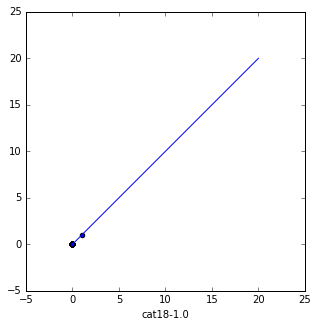

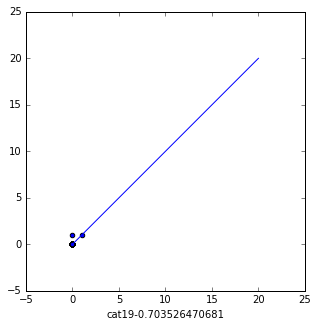

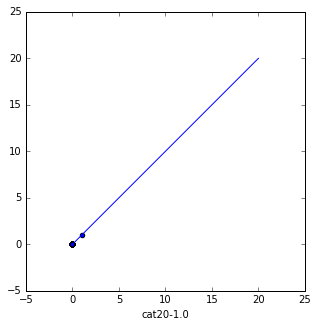

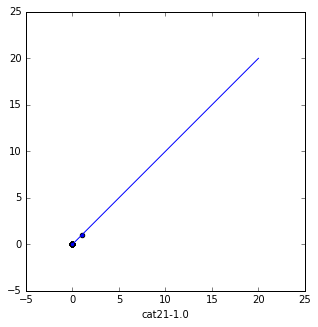

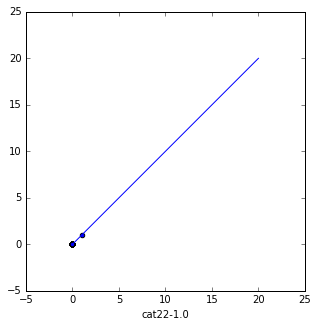

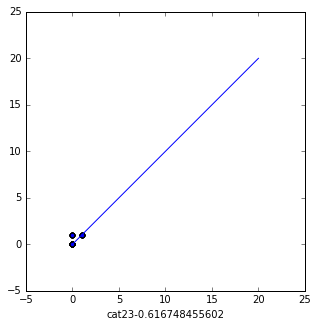

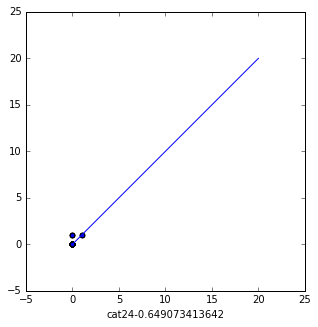

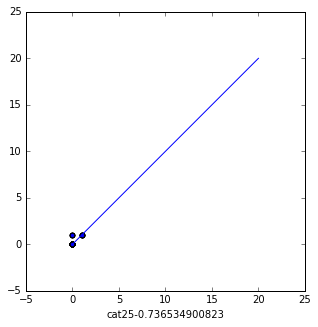

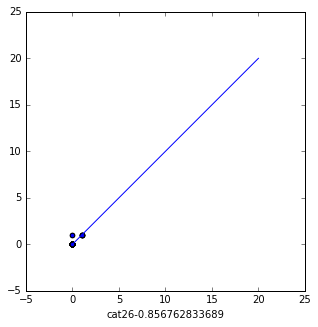

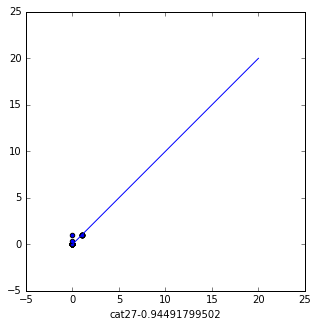

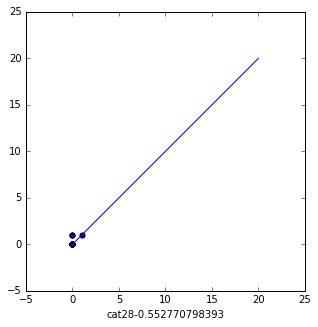

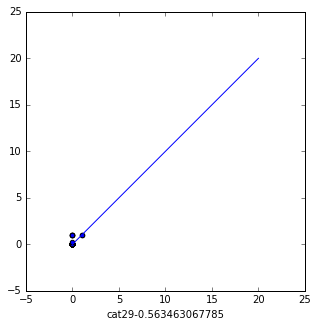

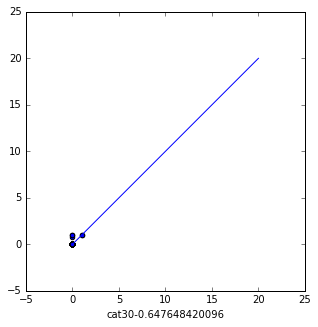

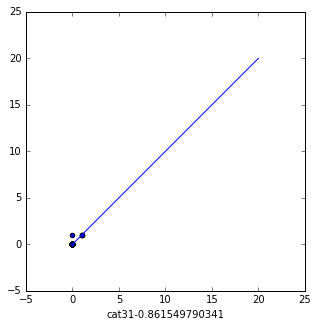

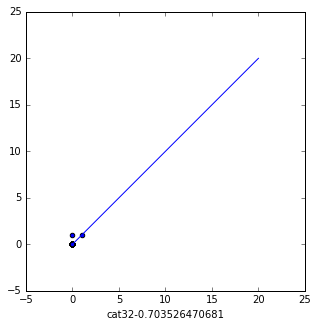

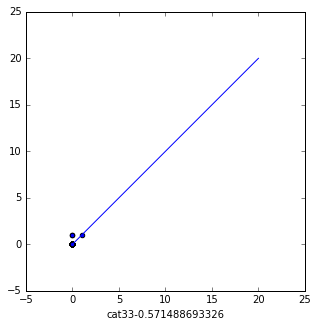

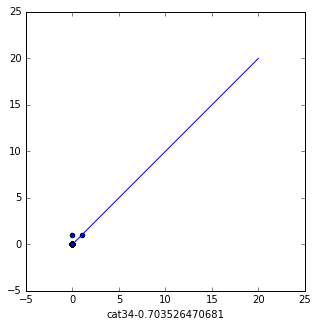

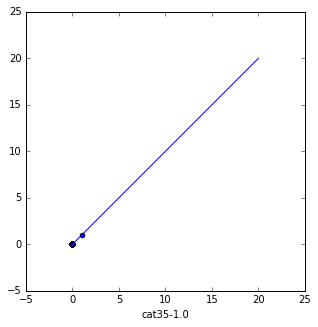

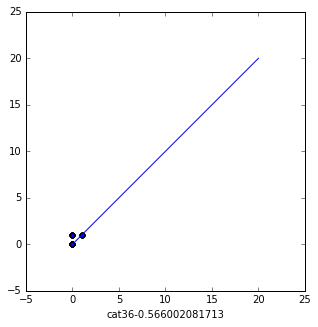

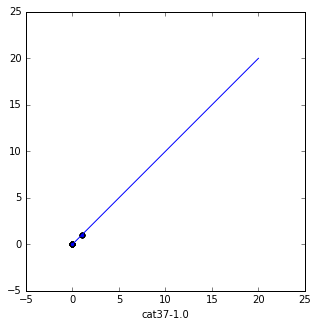

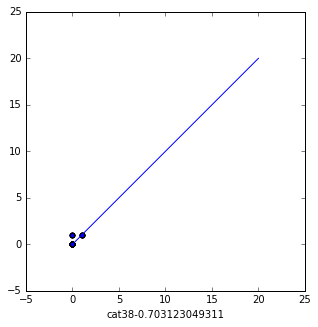

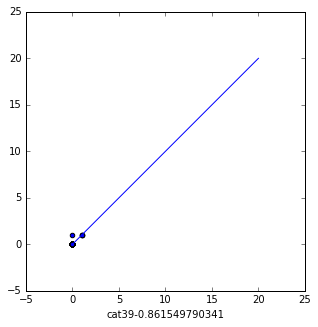

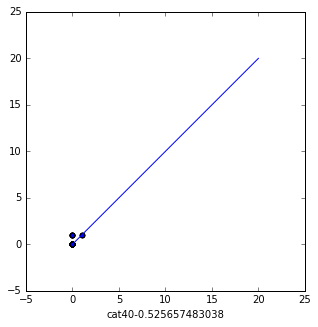

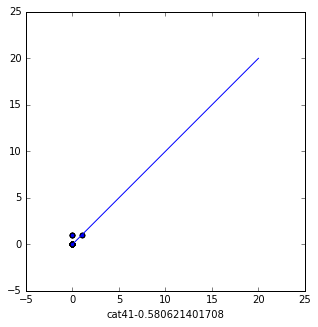

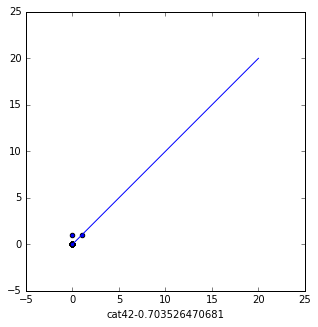

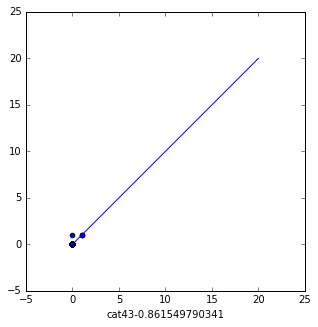

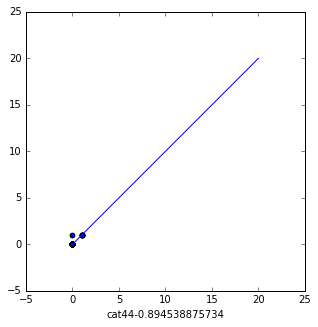

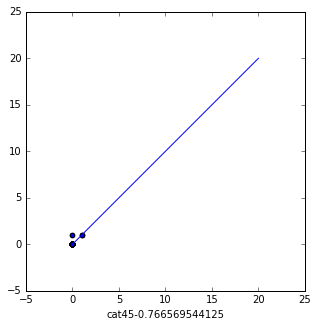

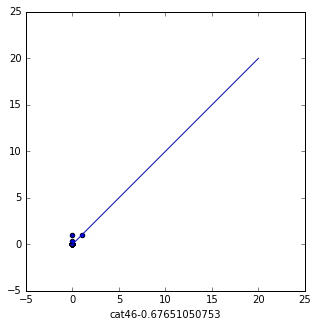

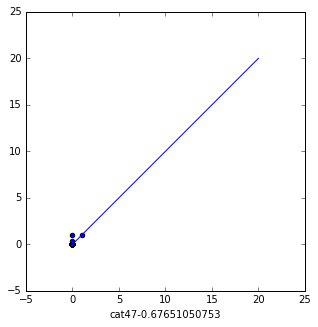

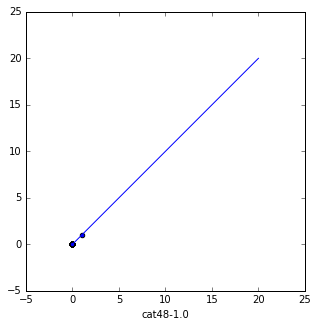

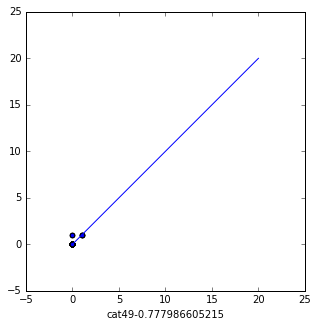

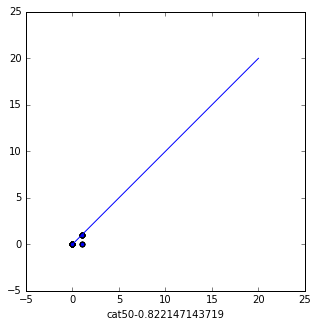

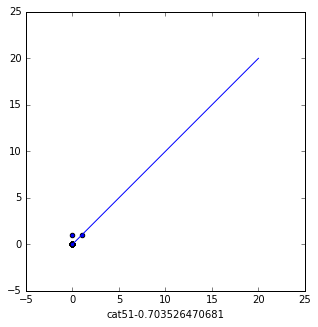

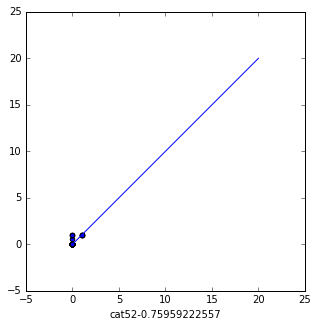

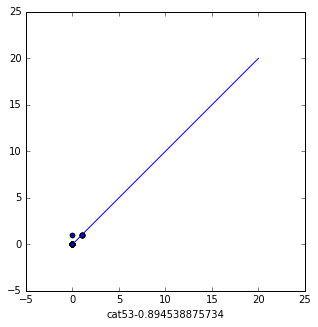

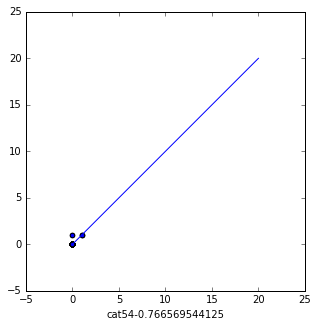

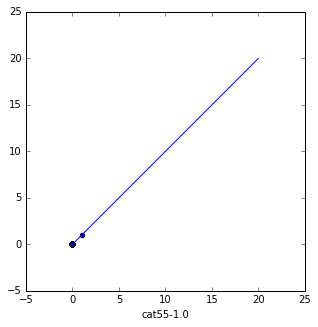

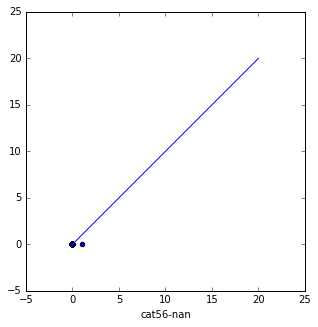

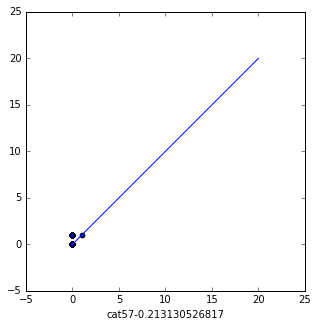

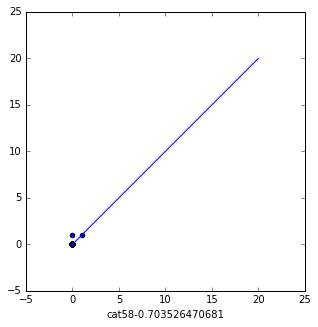

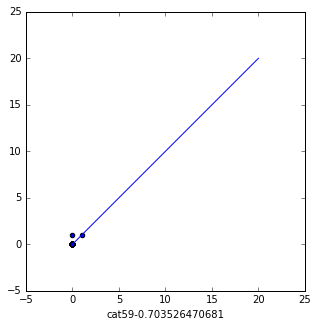

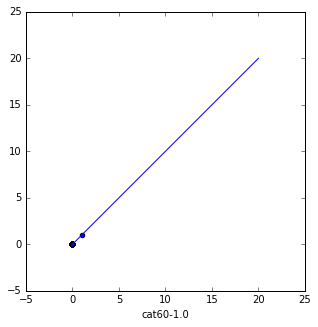

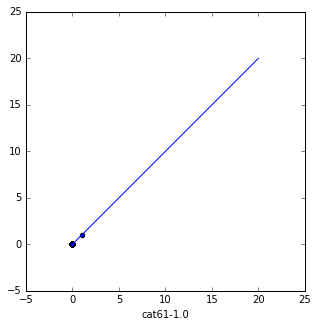

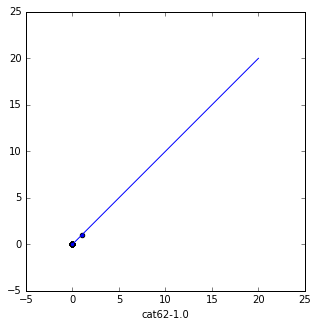

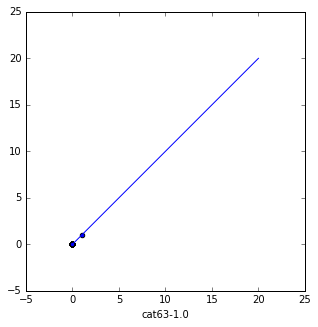

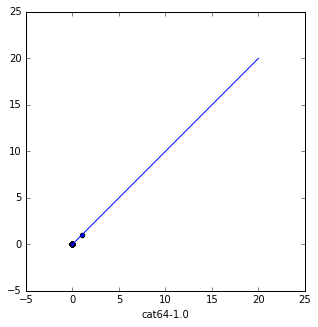

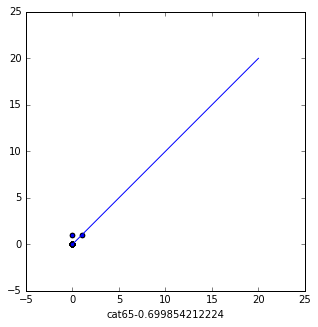

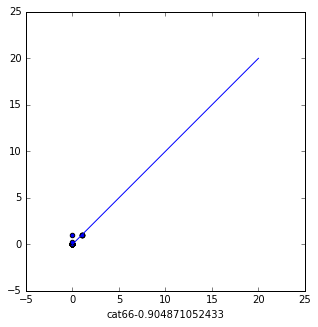

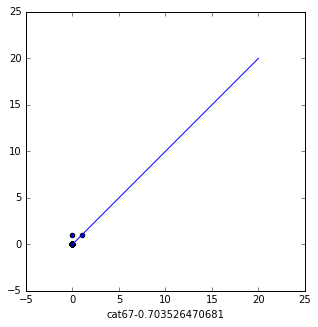

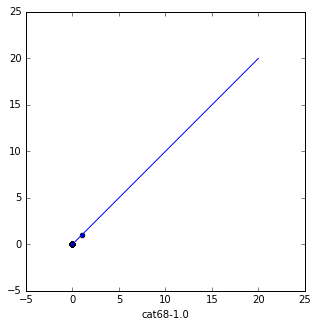

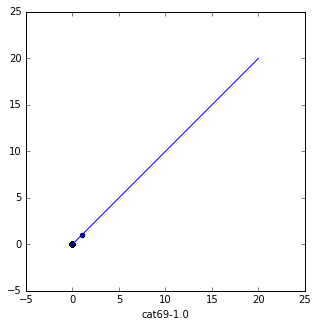

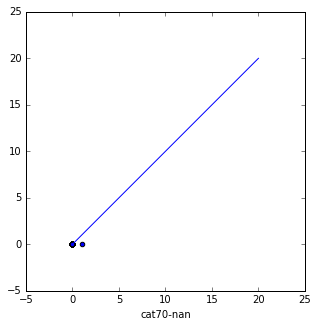

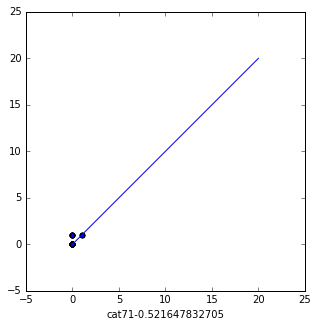

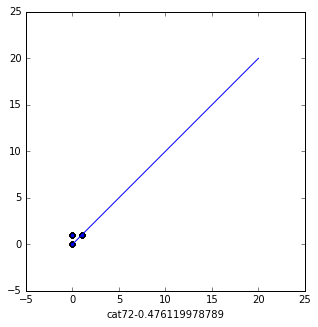

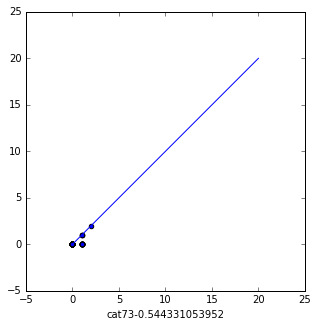

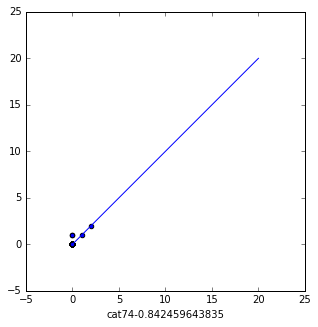

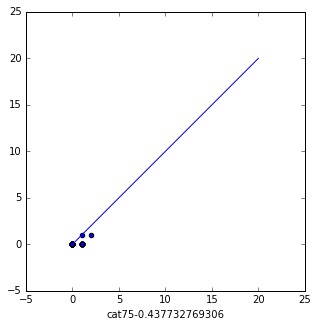

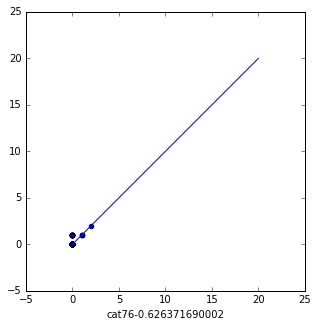

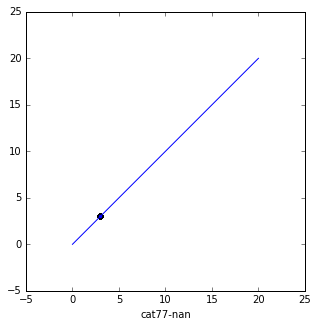

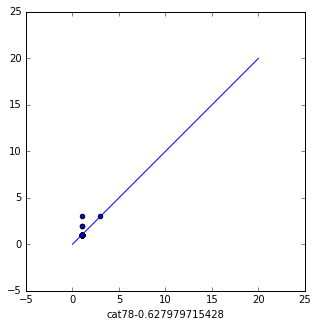

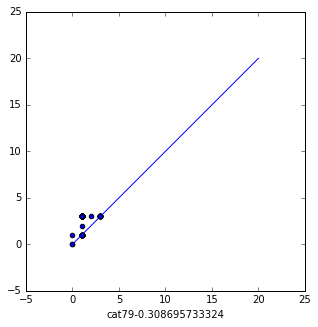

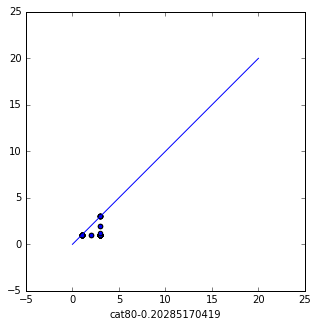

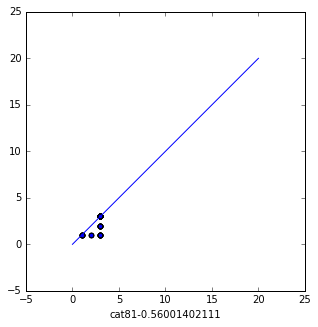

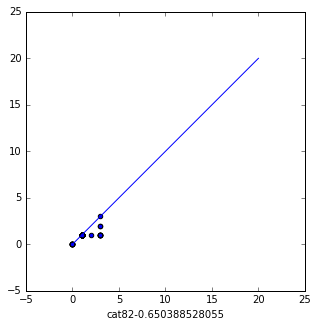

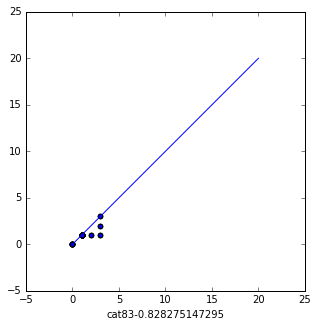

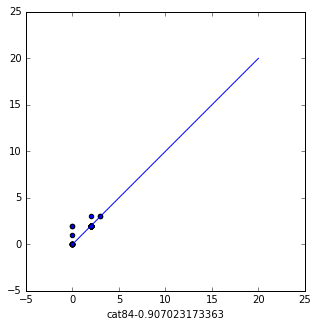

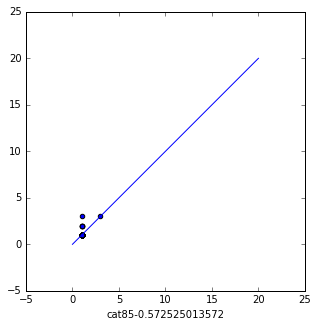

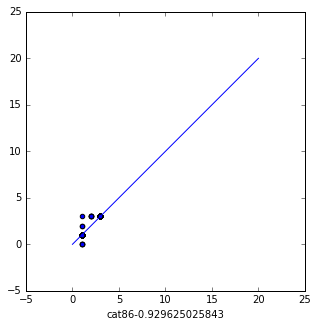

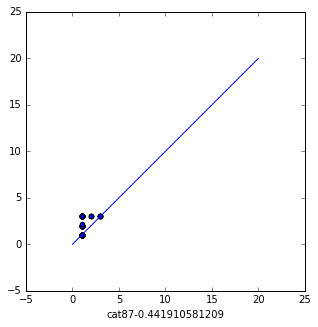

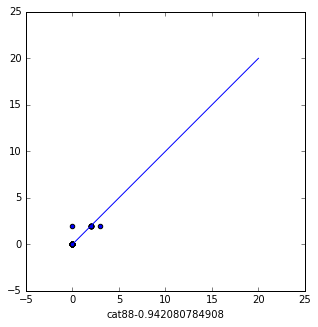

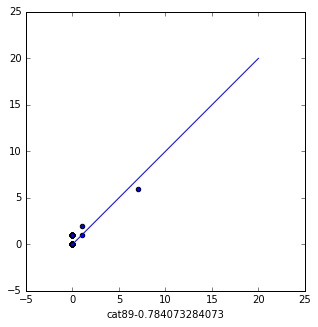

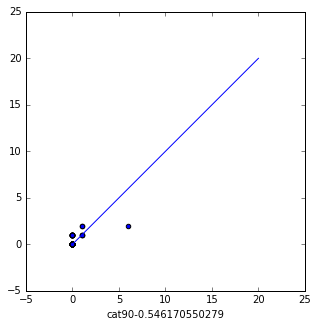

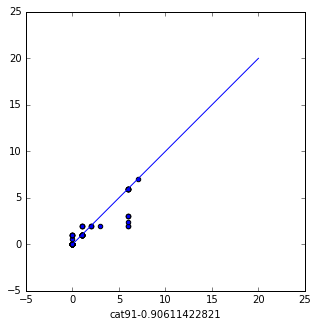

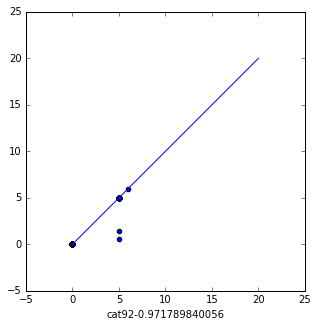

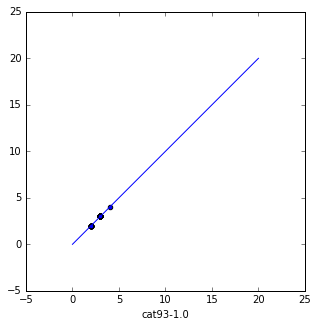

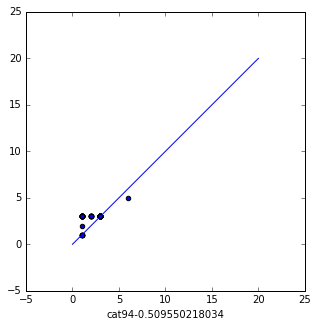

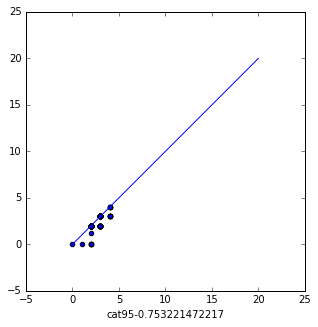

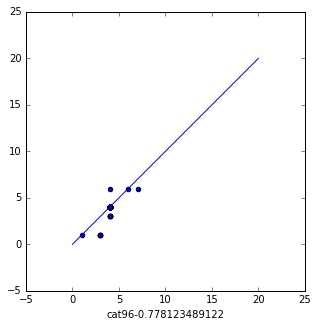

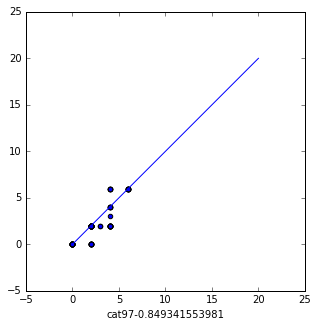

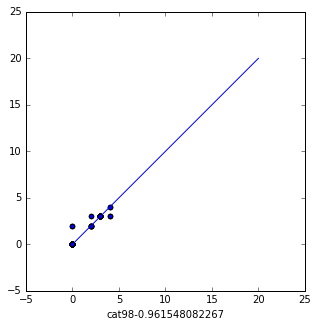

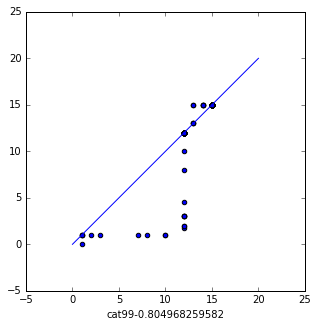

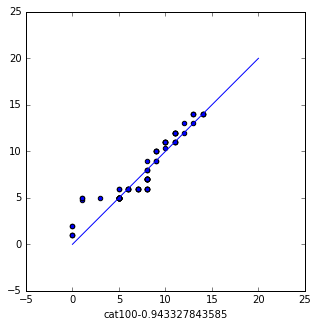

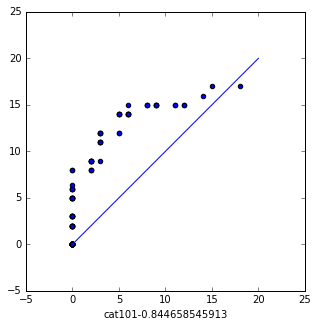

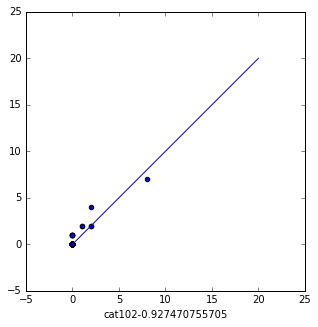

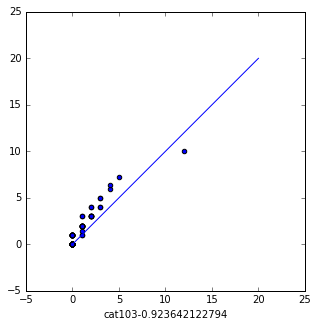

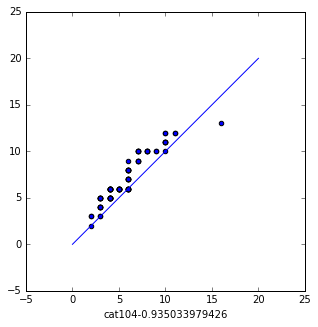

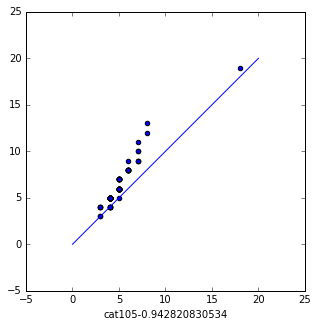

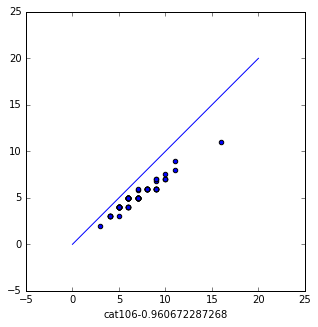

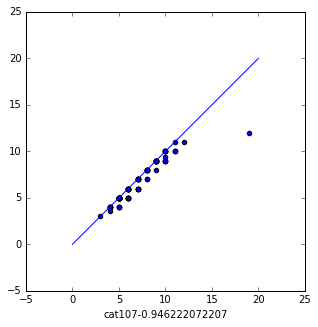

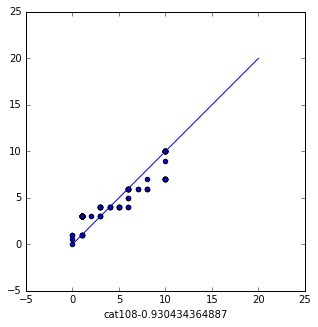

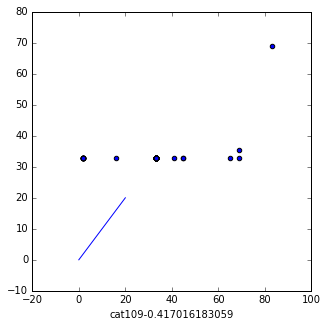

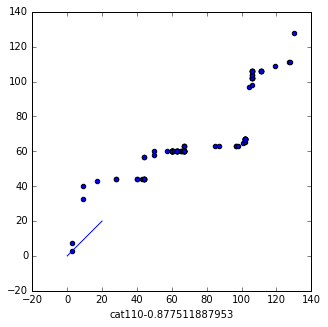

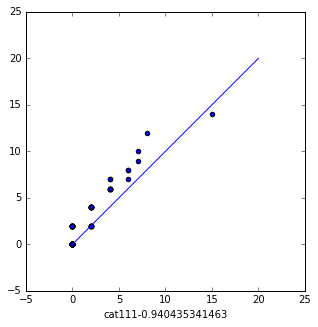

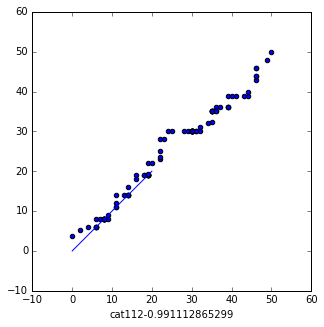

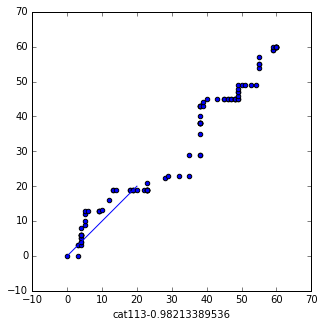

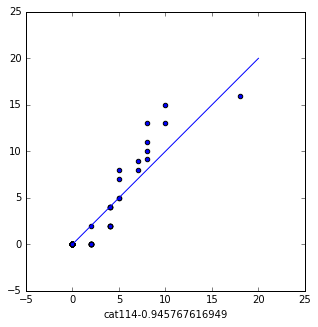

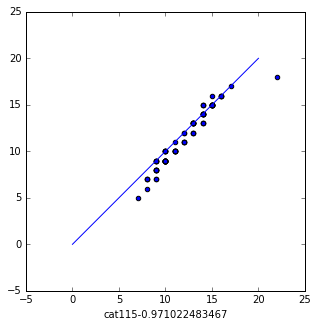

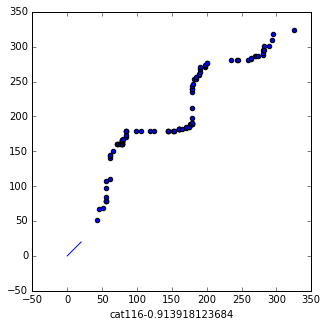

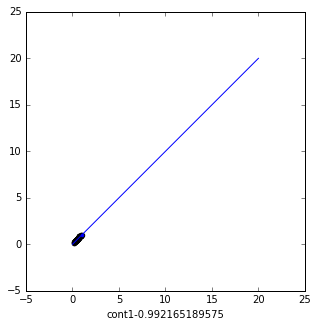

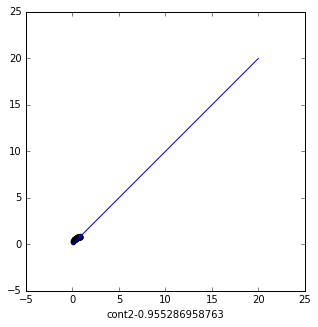

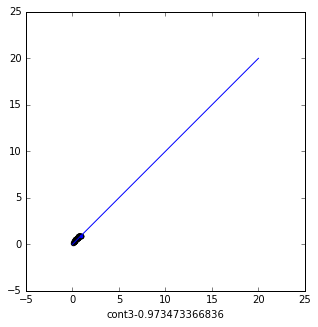

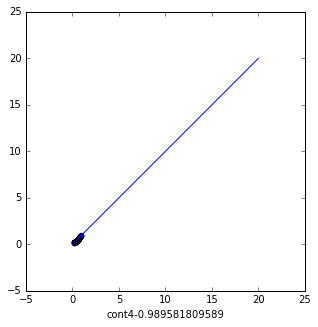

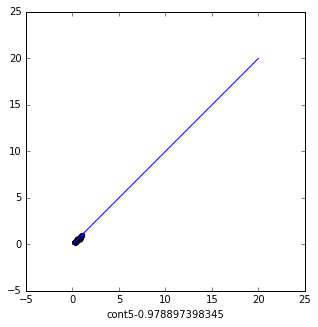

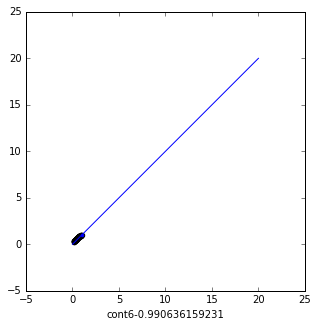

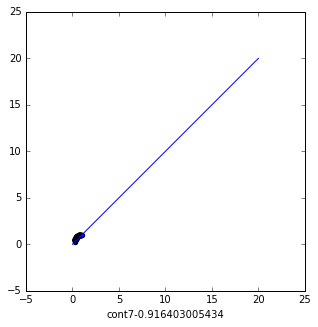

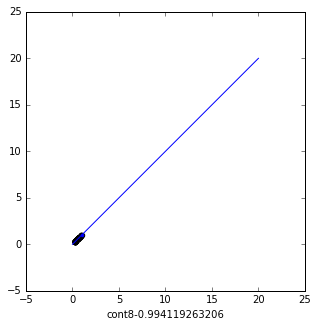

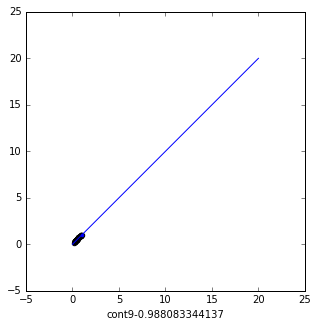

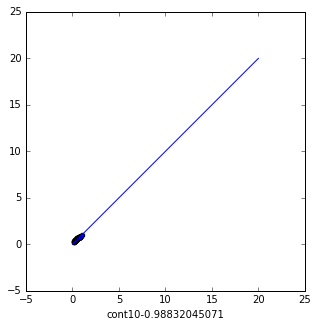

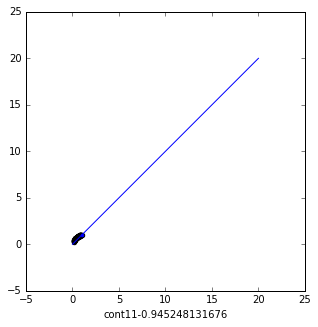

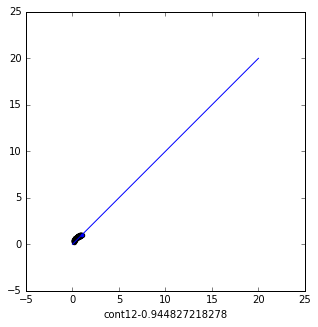

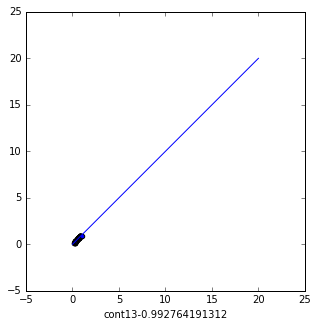

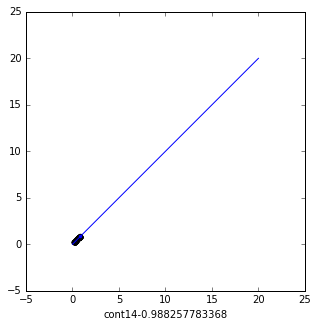

In [44]:
# Q-Q plots for each feature: small vs large
q_ticks = [k/100.0 for k in range(1,101)]
ind_features = []
rest_features = []
for col in features:
    plt.figure(figsize=(5,5))
    plt.subplot(1,1,1)
    plt.scatter(train_s[col].quantile(q=q_ticks),train_l[col].quantile(q=q_ticks))
    plt.plot([0,20],[0,20])
    r_corr = pearsonr(train_s[col].quantile(q=q_ticks),train_l[col].quantile(q=q_ticks))
    plt.xlabel(col+'-'+str(r_corr[0]))
    if r_corr[0]<0.8:
        ind_features.append(col)
    else:
        rest_features.append(col)

In [45]:
print(ind_features)
print(rest_features)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17', 'cat19', 'cat23', 'cat24', 'cat25', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33', 'cat34', 'cat36', 'cat38', 'cat40', 'cat41', 'cat42', 'cat45', 'cat46', 'cat47', 'cat49', 'cat51', 'cat52', 'cat54', 'cat57', 'cat58', 'cat59', 'cat65', 'cat67', 'cat71', 'cat72', 'cat73', 'cat75', 'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat85', 'cat87', 'cat89', 'cat90', 'cat94', 'cat95', 'cat96', 'cat109']
['cat6', 'cat15', 'cat18', 'cat20', 'cat21', 'cat22', 'cat26', 'cat27', 'cat31', 'cat35', 'cat37', 'cat39', 'cat43', 'cat44', 'cat48', 'cat50', 'cat53', 'cat55', 'cat56', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat66', 'cat68', 'cat69', 'cat70', 'cat74', 'cat77', 'cat83', 'cat84', 'cat86', 'cat88', 'cat91', 'cat92', 'cat93', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat110', 'cat11